<a href="https://colab.research.google.com/github/researcheraman/Microbial_analyzer/blob/main/Microbialanalyzerd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.7 MB/s eta 0:00:00


In [ ]:
from Bio import Entrez

# Put any email (NCBI requires it)
Entrez.email = "jannatisback002@gmail.com"

print("NCBI access ready!")

NCBI access ready!


In [ ]:
from Bio import Entrez, SeqIO

def fetch_sequences_by_name(name, max_results=3):
    # Search NCBI for protein sequences from this organism
    handle = Entrez.esearch(db="protein", term=name, retmax=max_results)
    record = Entrez.read(handle)
    ids = record["IdList"]

    if len(ids) == 0:
        print("No sequences found for this microbe.")
        return None

    sequences = []
    for seq_id in ids:
        fasta = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
        sequences.append(fasta.read())

    return sequences

print("Sequence fetch function loaded!")

Sequence fetch function loaded!


In [ ]:
sequences = fetch_sequences_by_name("Escherichia coli", max_results=3)

for i, seq in enumerate(sequences, 1):
    print(f"\n🔬 Sequence {i}:\n")
    print(seq[:500])   # print first 500 letters only


🔬 Sequence 1:

>WP_454108031.1 Lrp/AsnC family transcriptional regulator [Leifsonia shinshuensis]
MRTFDSTDRRILVALADDPRSTNVSLADRLGLSRNTVQARVAELERSGAFLSFERRISPTAAGYPLAAFV
TVHVQQQKLDAIVEHLAGIPEIVQAHGLSGPSDLLLRVVCTDAEDLFRITGAIQSTDGVERAETSLDMGE
LIPYRLRPLLTRTP



🔬 Sequence 2:

>WP_454108013.1 tRNA (guanosine(46)-N7)-methyltransferase TrmB [Leifsonia shinshuensis]
MEPSPLVRPRSFVIRGRKTEAQQRAIDEFWPLYGVEFDGSPLDLDALFGRTAPRVVEIGFGNGENLLALA
ARHPEKDFLGVEVHGAGVGRVLAAAHEQSLSNIRVVRHDAVEVFERGLGAASVGEVLIFFPDPWPKARHH
RRRLVQPDVVRLIVAALKPAGVLRLATDWEPYAEHMIDVLDAEPALVNVAGPGGFIPRPDDRPVTKFERR
GERLGHAIFDLEYRPRV



🔬 Sequence 3:

>WP_454108003.1 ABC transporter permease [Leifsonia shinshuensis]
MTSRRVPGERSGTPAGTGIPGWILVVAALGALFVLLPIVAMVTRVDWARFGALITSPSSLDALLLSLRTS
VAATIACLVLGVPMAVVLARVPFRGRGLVRAIVLLPLVLPPVVGGLALLALYGRRGLLDGAIPIAFSTPA
VVIAQTFVALPFLVLSLEGALRTTGERYEAVAATLGARPSAVLFRVTLPLVAPAIVSGSILSFARALGEF
GATLTFAGSLQGTTRTLPLEIYLQRETDPDAAVALSLVLIAVAIAVVAVAHGAGEPLRRRPRPAGAARTP
EVAR




In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def compare_two_sequences(seq1, seq2):
    # global alignment (full-length alignment)
    alignment = pairwise2.align.globalxx(seq1, seq2)[0]

    aligned_seq1 = alignment.seqA
    aligned_seq2 = alignment.seqB

    matches = sum(a == b for a, b in zip(aligned_seq1, aligned_seq2))
    identity = matches / len(aligned_seq1) * 100

    print(f"🔬 Percent Identity: {identity:.2f}%\n")
    print(format_alignment(*alignment))

/usr/local/lib/python3.12/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
from Bio.Align import PairwiseAligner

def compare_two_sequences(seq1, seq2):
    aligner = PairwiseAligner()
    aligner.mode = "global"   # full-length alignment

    alignment = aligner.align(seq1, seq2)[0]

    aligned_seq1 = alignment.aligned[0]
    aligned_seq2 = alignment.aligned[1]

    # Calculate percent identity manually
    matches = sum(a == b for a, b in zip(str(alignment).split("\n")[0],
                                         str(alignment).split("\n")[2]))
    length = len(str(alignment).split("\n")[0])
    identity = matches / length * 100

    print(f"🔬 Percent Identity: {identity:.2f}%\n")
    print(alignment)

In [ ]:
# Fetch sequences
seqs_ecoli = fetch_sequences_by_name("Escherichia coli", max_results=1)
seqs_salmonella = fetch_sequences_by_name("Salmonella enterica", max_results=1)

seq1 = seqs_ecoli[0]
seq2 = seqs_salmonella[0]

# Extract only the sequence part (remove FASTA header)
def extract_seq(fasta):
    return "".join(fasta.split("\n")[1:]).strip()

seq1_clean = extract_seq(seq1)
seq2_clean = extract_seq(seq2)

# Compare them
compare_two_sequences(seq1_clean, seq2_clean)

🔬 Percent Identity: 31.25%

target            0 M-RTFD--S--TDRR--ILVALADDPRSTNVSLADRLGLSRNTVQARVAELERSGAF-L-
                  0 |-||..--|--|...--||.|................|............|......-|-
query             0 MHRTRQRLSLITTSAALILAASQVFAEPKLEVEMFEAGVEGQGDSIGTVTLTAYDQGVLI

target           51 -SFERRISPTAAGYPLAAFVTVH-VQQQ-KLD-AIVEHLAGIPEIVQAH-GLSGPSDLL-
                 60 -|.....||...|..|.......-|...-|..-|........||....|-|....|..|-
query            60 ESDLAGLSPGIHGFHLHENPDCSPVEKDGKTTPAGAAGGHYDPENTGKHKGPFDKSGHLG

target          105 -L-RV-VCTDAEDLFR-ITGAIQSTDGVERAETSLDMGELIPYRLRPLLT---RTP----
                120 -|-|.-|....|....-|....|..|...||......|........||..---|..----
query           120 DLPRLHVGQEGENAQTNIAPRLQLNDFKGRALVIHGGGDNYSDSPQPLGGGGARVACGVV

target          154 -- 154
                180 -- 182
query           180 AG 182



In [ ]:
!pip install matplotlib

In [ ]:
from Bio import Align

aligner = Align.PairwiseAligner()

# Optional: scoring tweaks for protein alignment
aligner.mode = 'global'
aligner.match_score = 1
aligner.mismatch_score = -1
aligner.open_gap_score = -10
aligner.extend_gap_score = -0.5

seq1 = records[0].seq
seq2 = records[1].seq

score = aligner.score(seq1, seq2)
print("Alignment Score:", score)

NameError: name 'records' is not defined

In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "student@example.com"  # can be any email

# Fetch sequences of two example microbes
# You can change these later
seq_ids = ["NP_040770.1", "NP_049590.1"]

handle = Entrez.efetch(db="protein", id=seq_ids, rettype="fasta", retmode="text")
records = list(SeqIO.parse(handle, "fasta"))
handle.close()

# Check that we have sequences
for record in records:
    print(f"ID: {record.id}, length: {len(record.seq)}")

ID: NP_040770.1, length: 353
ID: NP_049590.1, length: 143


In [ ]:
from Bio import Align

# Create aligner
aligner = Align.PairwiseAligner()
aligner.mode = 'global'  # full-length alignment
aligner.match_score = 1
aligner.mismatch_score = -1
aligner.open_gap_score = -10
aligner.extend_gap_score = -0.5

# Take sequences
seq1 = records[0].seq
seq2 = records[1].seq

# Align and get top alignment
alignment = aligner.align(seq1, seq2)[0]

print("Alignment Score:", alignment.score)
print("\nAlignment:")
print(alignment)

Alignment Score: -225.0

Alignment:
target            0 MPPPQRFRVQSKNYFLTYPRCTIPKEEALSQLQKIHTTTNKKFIKVCEERHDNGEPHLHA
                  0 |..............|......|-------------------------------------
query             0 MRFKNLSNTKQVSFKLRNFKKSI-------------------------------------

target           60 LIQFEGKFICTNKRLFDLVSTTRSAHFHPNIQGAKSSSDVKEYIDKDGVTIEWGQFQVDG
                 60 ------------------------------------------------------------
query            23 ------------------------------------------------------------

target          120 RSARGGQQSANDSYAKALNADSIESALTILKEEQPKDYVLQNHNIRSNLERIFFKVPEPW
                120 ------------------------------------------------------------
query            23 ------------------------------------------------------------

target          180 VPPFPLSSFVNIPVVMQDWVDDYFGRGSAARPERPISIIVEGDSRTGKTMWARALGPHNY
                180 -----.|.||.............|...........|.|||..................|.
query            23 -----NSRFVFGNSMILLYKNTKFEAIYYELFRKFIKIIVKKKNVNNIFK

In [ ]:
# List of microbes
microbes = [
    "Escherichia coli",
    "Salmonella enterica",
    "Shigella flexneri",
    "Klebsiella pneumoniae"
]

# Fetch one protein sequence per microbe
sequences = {}
for microbe in microbes:
    handle = Entrez.esearch(db="protein", term=microbe, retmax=1)
    record = Entrez.read(handle)
    ids = record["IdList"]
    if ids:
        fasta = Entrez.efetch(db="protein", id=ids[0], rettype="fasta", retmode="text").read()
        seq = "".join(fasta.split("\n")[1:])  # remove header
        sequences[microbe] = seq
    else:
        print(f"No sequence found for {microbe}")

print("Fetched sequences for microbes:")
for k, v in sequences.items():
    print(f"{k}: length {len(v)}")

Fetched sequences for microbes:
Escherichia coli: length 154
Salmonella enterica: length 182
Shigella flexneri: length 407
Klebsiella pneumoniae: length 99


In [ ]:
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import substitution_matrices
from Bio.Align import PairwiseAligner
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt

# Convert sequences dict to SeqRecord objects
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]

# Simple pairwise distance calculation using identity
calculator = DistanceCalculator('identity')
# Need an alignment object for calculator, so first build a "fake" MSA using seq_records
# For small demo, we align pairwise sequentially
# For real MSA, external tools like MUSCLE or MAFFT are recommended

# Build a Distance Matrix manually
alignments = {}
for i, rec1 in enumerate(seq_records):
    for j, rec2 in enumerate(seq_records):
        if i < j:
            aligner = PairwiseAligner()
            aligner.mode = 'global'
            score = aligner.score(rec1.seq, rec2.seq)
            alignments[(rec1.id, rec2.id)] = score

# Display pairwise scores
print("Pairwise alignment scores:")
for pair, score in alignments.items():
    print(f"{pair[0]} vs {pair[1]}: {score}")

# Construct a simple neighbor-joining tree using distance scores
# Using 1/(score) as a pseudo-distance (for demo purposes)
dmatrix = {}
names = [rec.id for rec in seq_records]
for n1 in names:
    dmatrix[n1] = {}
    for n2 in names:
        if n1 == n2:
            dmatrix[n1][n2] = 0
        else:
            score = alignments.get((n1,n2), alignments.get((n2,n1), 1))
            dmatrix[n1][n2] = 1/score

# Convert to Biopython DistanceMatrix
from Bio.Phylo.TreeConstruction import _DistanceMatrix
dm = _DistanceMatrix(names, [[dmatrix[n1][n2] for n2 in names[:i]] for i,n1 in enumerate(names)])

# Build tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Draw tree
plt.figure(figsize=(8,5))
Phylo.draw(tree)

Pairwise alignment scores:
Escherichia coli vs Salmonella enterica: 10.0
Escherichia coli vs Shigella flexneri: -164.0
Escherichia coli vs Klebsiella pneumoniae: -19.0
Salmonella enterica vs Shigella flexneri: -129.0
Salmonella enterica vs Klebsiella pneumoniae: -42.0
Shigella flexneri vs Klebsiella pneumoniae: -243.0


ValueError: 'matrix' should be in lower triangle format

In [ ]:
from Bio.Align import PairwiseAligner
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt

# Convert sequences dict to SeqRecord
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]

# Compute pairwise % identity
names = [rec.id for rec in seq_records]
n = len(seq_records)
dist_matrix = [[0]*i for i in range(n)]  # lower triangle

aligner = PairwiseAligner()
aligner.mode = 'global'

for i in range(1, n):
    for j in range(i):
        seq1 = seq_records[i].seq
        seq2 = seq_records[j].seq
        alignment = aligner.align(seq1, seq2)[0]
        # Percent identity
        aligned_seq1 = str(alignment.seqA)
        aligned_seq2 = str(alignment.seqB)
        matches = sum(a==b for a,b in zip(aligned_seq1, aligned_seq2))
        identity = matches / max(len(aligned_seq1), len(aligned_seq2))
        distance = 1 - identity  # distance = 1 - identity
        dist_matrix[i][j] = distance

# Create Biopython DistanceMatrix
from Bio.Phylo.TreeConstruction import _DistanceMatrix
dm = _DistanceMatrix(names, dist_matrix)

# Build tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Draw tree
plt.figure(figsize=(10,6))
Phylo.draw(tree)

AttributeError: 'Alignment' object has no attribute 'seqA'

In [ ]:
from Bio.Align import PairwiseAligner
from Bio.Phylo.TreeConstruction import _DistanceMatrix, DistanceTreeConstructor
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt

# Convert sequences dict to SeqRecord
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]

names = [rec.id for rec in seq_records]
n = len(seq_records)
dist_matrix = [[0]*i for i in range(n)]  # lower triangle

aligner = PairwiseAligner()
aligner.mode = 'global'

for i in range(1, n):
    for j in range(i):
        seq1 = seq_records[i].seq
        seq2 = seq_records[j].seq
        # Run alignment
        alignment = aligner.align(seq1, seq2)[0]

        # Convert Alignment to strings
        aln_str = alignment.format().split("\n")
        aligned_seq1 = aln_str[0].split()[1]  # first sequence
        aligned_seq2 = aln_str[1].split()[1]  # second sequence

        # Percent identity
        matches = sum(a==b for a,b in zip(aligned_seq1, aligned_seq2))
        identity = matches / max(len(aligned_seq1), len(aligned_seq2))
        distance = 1 - identity
        dist_matrix[i][j] = distance

# Build Biopython DistanceMatrix
dm = _DistanceMatrix(names, dist_matrix)

# Build tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Plot tree
plt.figure(figsize=(10,6))
Phylo.draw(tree)

ValueError: 'matrix' should be in lower triangle format

In [ ]:
from Bio import pairwise2
from Bio.Phylo.TreeConstruction import _DistanceMatrix, DistanceTreeConstructor
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt

# Convert sequences dict to SeqRecord
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]
names = [rec.id for rec in seq_records]
n = len(seq_records)

# Create lower-triangle distance matrix
dist_matrix = [[0]*i for i in range(n)]

# Compute pairwise distances using percent identity
for i in range(1, n):
    for j in range(i):
        seq1 = str(seq_records[i].seq)
        seq2 = str(seq_records[j].seq)
        # pairwise alignment
        alignments = pairwise2.align.globalxx(seq1, seq2)
        aln1, aln2, score, start, end = alignments[0]
        identity = score / max(len(seq1), len(seq2))
        distance = 1 - identity
        dist_matrix[i][j] = distance

# Build Biopython DistanceMatrix
dm = _DistanceMatrix(names, dist_matrix)

# Construct tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Draw tree
plt.figure(figsize=(10,6))
Phylo.draw(tree)

ValueError: 'matrix' should be in lower triangle format

In [ ]:
from Bio import pairwise2
from Bio.Phylo.TreeConstruction import _DistanceMatrix, DistanceTreeConstructor
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt

# Convert sequences dict to SeqRecord
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]
names = [rec.id for rec in seq_records]
n = len(seq_records)

# Create empty lower-triangle list of lists
dist_matrix = []
for i in range(n):
    dist_matrix.append([])  # i-th sublist should have i elements

# Compute pairwise distances
for i in range(1, n):
    for j in range(i):
        seq1 = str(seq_records[i].seq)
        seq2 = str(seq_records[j].seq)
        # Use simple global identity alignment
        alignments = pairwise2.align.globalxx(seq1, seq2)
        aln1, aln2, score, start, end = alignments[0]
        identity = float(score) / max(len(seq1), len(seq2))
        distance = 1.0 - identity
        dist_matrix[i].append(distance)  # append to lower-triangle

# Build Biopython DistanceMatrix
dm = _DistanceMatrix(names, dist_matrix)

# Construct neighbor-joining tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Draw tree
plt.figure(figsize=(10,6))
Phylo.draw(tree)

ValueError: 'matrix' should be in lower triangle format

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import numpy as np
from Bio import pairwise2

# Prepare sequences
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]
names = [rec.id for rec in seq_records]
n = len(seq_records)

# Compute pairwise distances (1 - identity)
dist_array = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        seq1 = str(seq_records[i].seq)
        seq2 = str(seq_records[j].seq)
        align = pairwise2.align.globalxx(seq1, seq2)[0]
        score = align[2]  # matches
        identity = score / max(len(seq1), len(seq2))
        distance = 1 - identity
        dist_array[i, j] = distance
        dist_array[j, i] = distance

# Convert to condensed distance matrix for NJ
condensed = squareform(dist_array)

# Build NJ tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(squareform(condensed))

# Plot tree
plt.figure(figsize=(10,6))
Phylo.draw(tree)

TypeError: Must provide a DistanceMatrix object.

In [ ]:
!pip install ete3

from Bio import pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from ete3 import Tree, TreeStyle
import numpy as np
from scipy.cluster.hierarchy import linkage, to_tree, dendrogram
import matplotlib.pyplot as plt

# Prepare sequences
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]
names = [rec.id for rec in seq_records]
n = len(seq_records)

# Compute distance matrix (1 - identity)
dist_array = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        seq1 = str(seq_records[i].seq)
        seq2 = str(seq_records[j].seq)
        align = pairwise2.align.globalxx(seq1, seq2)[0]
        identity = align[2] / max(len(seq1), len(seq2))
        dist_array[i,j] = 1 - identity
        dist_array[j,i] = 1 - identity

# Perform hierarchical clustering (UPGMA)
Z = linkage(dist_array, method='average')

# Plot dendrogram
plt.figure(figsize=(10,6))
dendrogram(Z, labels=names)
plt.title("Phylogenetic Tree (UPGMA)")
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273786 sha256=aa0d68004d0e224d79ce2865ae0b79e02bebdfabcb93cf984183c1113c462f68
  Stored in directory: /root/.cache/pip/wheels/4f/18/8d/3800b8b1dc7a8c1954eaa48424f639b2cfc760922cc3cee479
Successfully built ete3


ImportError: cannot import name 'TreeStyle' from 'ete3' (/usr/local/lib/python3.12/dist-packages/ete3/__init__.py)

/tmp/ipython-input-1944423793.py:25: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_array, method='average')


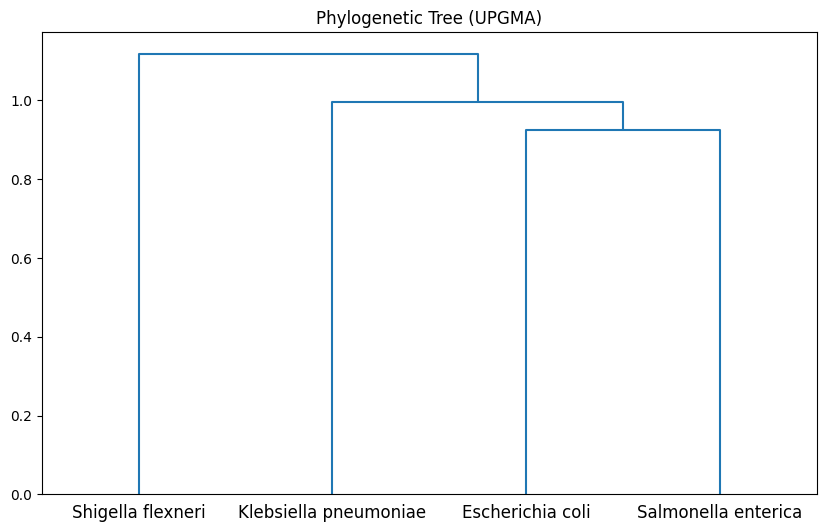

In [ ]:
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# Prepare sequences
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]
names = [rec.id for rec in seq_records]
n = len(seq_records)

# Compute pairwise distance matrix (1 - identity)
dist_array = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        seq1 = str(seq_records[i].seq)
        seq2 = str(seq_records[j].seq)
        align = pairwise2.align.globalxx(seq1, seq2)[0]
        identity = align[2] / max(len(seq1), len(seq2))
        dist_array[i,j] = 1 - identity
        dist_array[j,i] = 1 - identity

# Perform hierarchical clustering (UPGMA)
Z = linkage(dist_array, method='average')

# Plot dendrogram
plt.figure(figsize=(10,6))
dendrogram(Z, labels=names)
plt.title("Phylogenetic Tree (UPGMA)")
plt.show()

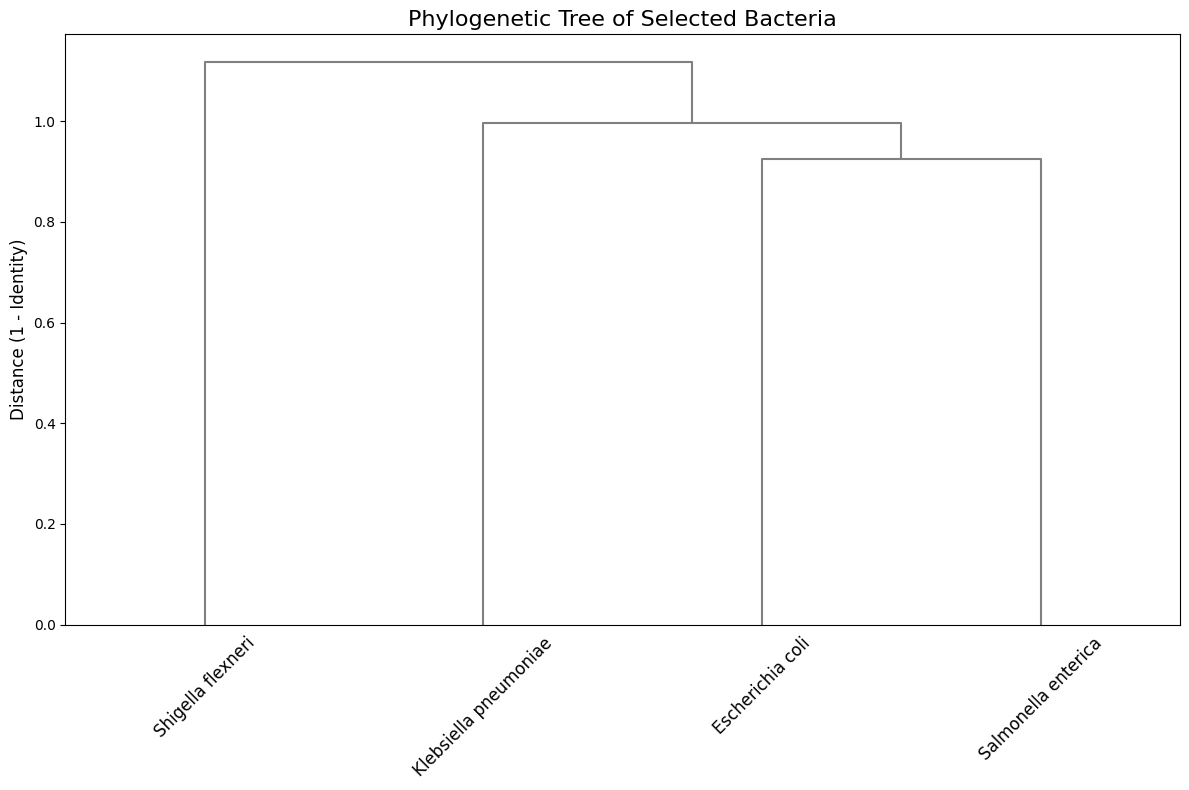

In [ ]:
plt.figure(figsize=(12,8))
dendrogram(
    Z,
    labels=names,
    leaf_rotation=45,    # Rotate leaf labels for clarity
    leaf_font_size=12,   # Bigger font
    color_threshold=0.5, # Color clusters
    above_threshold_color='gray',
    orientation='top'
)
plt.title("Phylogenetic Tree of Selected Bacteria", fontsize=16)
plt.ylabel("Distance (1 - Identity)", fontsize=12)
plt.tight_layout()
plt.show()

Fetched sequences:
Escherichia coli: length 154
Salmonella enterica: length 182
Shigella flexneri: length 407
Klebsiella pneumoniae: length 99


/tmp/ipython-input-779858137.py:76: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_array, method='average')


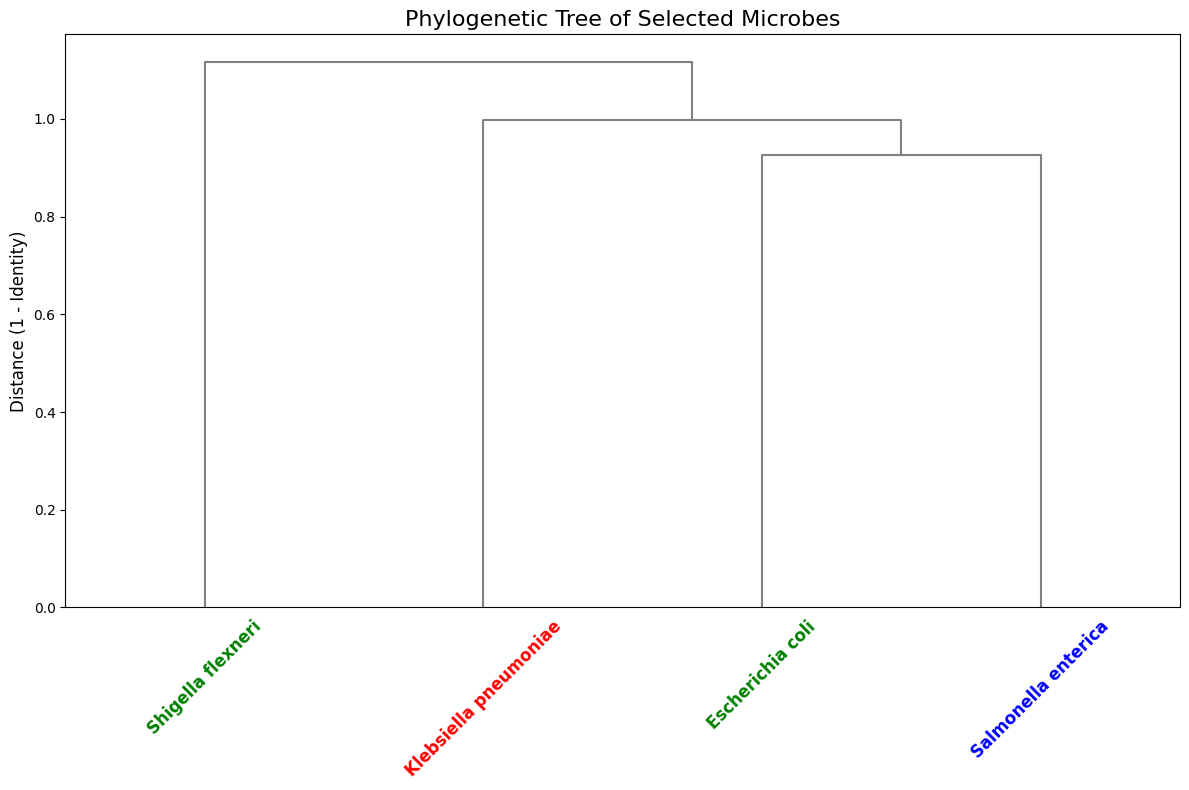

In [ ]:
# Install required packages
!pip install biopython

# Imports
from Bio import Entrez, pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. User inputs: microbe names
# -----------------------------
Entrez.email = "jannatisback002@gmail.com"  # NCBI requires an email

microbes = [
    "Escherichia coli",
    "Salmonella enterica",
    "Shigella flexneri",
    "Klebsiella pneumoniae"
]

# Optional: assign colors per genus
color_map = {
    "Escherichia coli": "green",
    "Shigella flexneri": "green",
    "Salmonella enterica": "red",
    "Klebsiella pneumoniae": "blue"
}

# -----------------------------
# 2. Fetch one protein sequence per microbe
# -----------------------------
sequences = {}
from Bio import SeqIO
for microbe in microbes:
    handle = Entrez.esearch(db="protein", term=microbe, retmax=1)
    record = Entrez.read(handle)
    ids = record["IdList"]
    if ids:
        fasta = Entrez.efetch(db="protein", id=ids[0], rettype="fasta", retmode="text").read()
        seq = "".join(fasta.split("\n")[1:])  # remove header
        sequences[microbe] = seq
    else:
        print(f"No sequence found for {microbe}")

print("Fetched sequences:")
for k,v in sequences.items():
    print(f"{k}: length {len(v)}")

# -----------------------------
# 3. Prepare SeqRecords
# -----------------------------
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]
names = [rec.id for rec in seq_records]
n = len(seq_records)

# -----------------------------
# 4. Compute pairwise distance matrix (1 - identity)
# -----------------------------
dist_array = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        seq1 = str(seq_records[i].seq)
        seq2 = str(seq_records[j].seq)
        align = pairwise2.align.globalxx(seq1, seq2)[0]
        identity = align[2] / max(len(seq1), len(seq2))
        distance = 1 - identity
        dist_array[i,j] = distance
        dist_array[j,i] = distance

# -----------------------------
# 5. Build tree using hierarchical clustering (UPGMA)
# -----------------------------
Z = linkage(dist_array, method='average')

# -----------------------------
# 6. Plot dendrogram with colored leaves
# -----------------------------
leaf_colors = [color_map.get(name, "black") for name in names]

plt.figure(figsize=(12,8))
dendro = dendrogram(
    Z,
    labels=names,
    leaf_rotation=45,
    leaf_font_size=12,
    link_color_func=lambda k: "gray",
    above_threshold_color='black',
    orientation='top'
)

# Color leaf labels
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl, color in zip(xlbls, leaf_colors):
    lbl.set_color(color)
    lbl.set_fontweight("bold")

plt.title("Phylogenetic Tree of Selected Microbes", fontsize=16)
plt.ylabel("Distance (1 - Identity)", fontsize=12)
plt.tight_layout()
plt.show()

Enter microbe names separated by commas: Lactobacillus, Escherichia coli
Fetched sequences:
Lactobacillus: length 219
Escherichia coli: length 154


/tmp/ipython-input-3334102314.py:70: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_array, method='average')


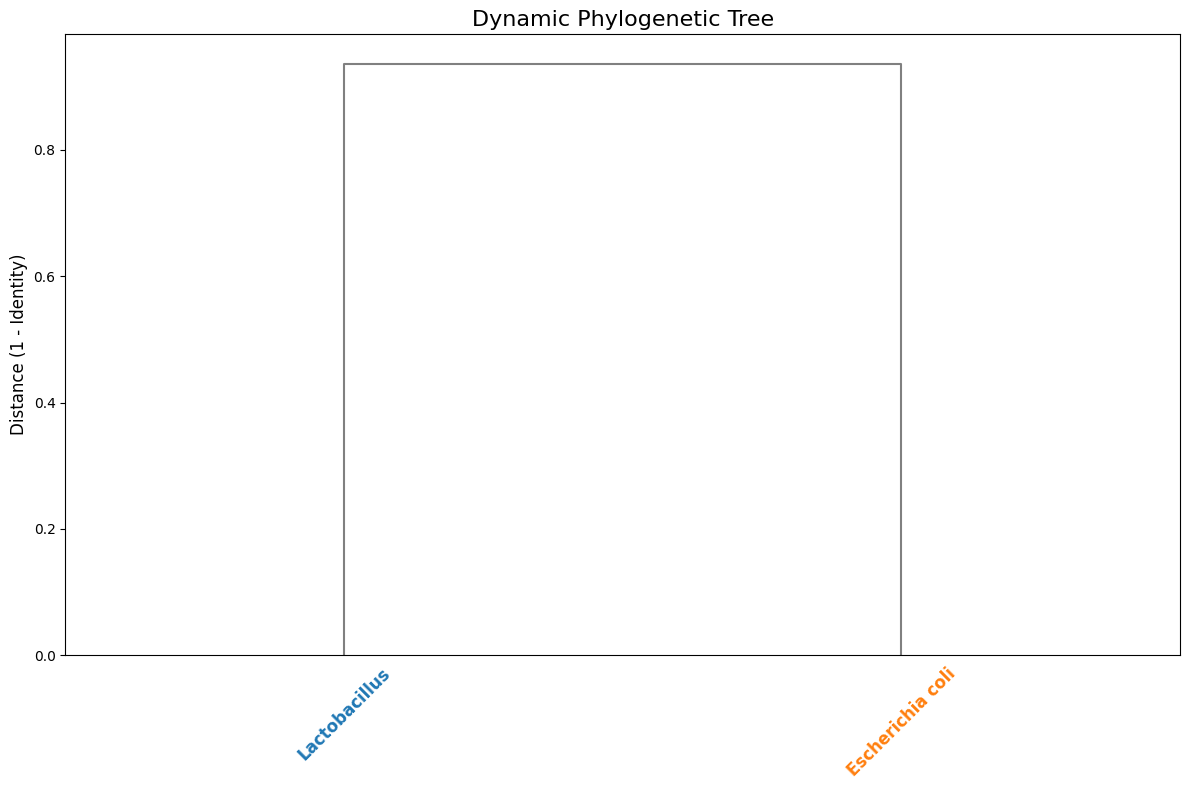

In [ ]:
# Install Biopython if needed
!pip install biopython

# Imports
from Bio import Entrez, pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. User input: dynamic
# -----------------------------
Entrez.email = "your_email@example.com"  # Replace with your email

# User types microbe names as a comma-separated string
user_input = input("Enter microbe names separated by commas: ")
microbes = [m.strip() for m in user_input.split(",") if m.strip()]

if len(microbes) < 2:
    raise ValueError("Enter at least 2 microbes to build a tree.")

# -----------------------------
# 2. Fetch first protein sequence per microbe
# -----------------------------
sequences = {}
for microbe in microbes:
    handle = Entrez.esearch(db="protein", term=microbe, retmax=1)
    record = Entrez.read(handle)
    ids = record["IdList"]
    if ids:
        fasta = Entrez.efetch(db="protein", id=ids[0], rettype="fasta", retmode="text").read()
        seq = "".join(fasta.split("\n")[1:])  # remove header
        sequences[microbe] = seq
    else:
        print(f"No sequence found for {microbe}")

if len(sequences) < 2:
    raise ValueError("Need at least 2 valid sequences to build a tree!")

print("Fetched sequences:")
for k,v in sequences.items():
    print(f"{k}: length {len(v)}")

# -----------------------------
# 3. Prepare SeqRecords
# -----------------------------
seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in sequences.items()]
names = [rec.id for rec in seq_records]
n = len(seq_records)

# -----------------------------
# 4. Compute pairwise distance matrix (1 - identity)
# -----------------------------
dist_array = np.zeros((n, n))
for i in range(n):
    for j in range(i):
        seq1 = str(seq_records[i].seq)
        seq2 = str(seq_records[j].seq)
        align = pairwise2.align.globalxx(seq1, seq2)[0]
        identity = align[2] / max(len(seq1), len(seq2))
        distance = 1 - identity
        dist_array[i,j] = distance
        dist_array[j,i] = distance

# -----------------------------
# 5. Build tree using hierarchical clustering (UPGMA)
# -----------------------------
Z = linkage(dist_array, method='average')

# -----------------------------
# 6. Assign colors automatically by genus (first word of microbe name)
# -----------------------------
genera = [name.split()[0] for name in names]
unique_genera = list(set(genera))
colors = plt.cm.tab10.colors  # up to 10 colors
color_map = {genus: colors[i % len(colors)] for i, genus in enumerate(unique_genera)}
leaf_colors = [color_map[name.split()[0]] for name in names]

# -----------------------------
# 7. Plot dendrogram
# -----------------------------
plt.figure(figsize=(12,8))
dendro = dendrogram(
    Z,
    labels=names,
    leaf_rotation=45,
    leaf_font_size=12,
    link_color_func=lambda k: "gray",
    above_threshold_color='black',
    orientation='top'
)

# Color leaf labels by genus
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl, color in zip(xlbls, leaf_colors):
    lbl.set_color(color)
    lbl.set_fontweight("bold")

plt.title("Dynamic Phylogenetic Tree", fontsize=16)
plt.ylabel("Distance (1 - Identity)", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Install Biopython if needed
!pip install biopython

from Bio import Entrez, pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. User Input
# -----------------------------
Entrez.email = "jannatisback002@gmail.com"  # replace with your email
user_input = input("Enter microbe names separated by commas: ")
microbes = [m.strip() for m in user_input.split(",") if m.strip()]

if len(microbes) < 2:
    raise ValueError("Enter at least 2 microbes.")

# -----------------------------
# 2. Fetch DNA and Protein Sequences
# -----------------------------
dna_sequences = {}
protein_sequences = {}

for microbe in microbes:
    # Fetch DNA
    handle = Entrez.esearch(db="nucleotide", term=microbe+"[Organism]", retmax=1)
    record = Entrez.read(handle)
    ids = record["IdList"]
    if ids:
        fasta = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text").read()
        seq = "".join(fasta.split("\n")[1:])
        dna_sequences[microbe] = seq
    else:
        print(f"No DNA sequence found for {microbe}")

    # Fetch Protein
    handle = Entrez.esearch(db="protein", term=microbe+"[Organism]", retmax=1)
    record = Entrez.read(handle)
    ids = record["IdList"]
    if ids:
        fasta = Entrez.efetch(db="protein", id=ids[0], rettype="fasta", retmode="text").read()
        seq = "".join(fasta.split("\n")[1:])
        protein_sequences[microbe] = seq
    else:
        print(f"No Protein sequence found for {microbe}")

# Check at least 2 valid sequences for each type
if len(dna_sequences) < 2:
    raise ValueError("Need at least 2 DNA sequences.")
if len(protein_sequences) < 2:
    raise ValueError("Need at least 2 protein sequences.")

# -----------------------------
# 3. Function to compute distance matrix
# -----------------------------
def compute_distance_matrix(seq_dict):
    seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in seq_dict.items()]
    names = [rec.id for rec in seq_records]
    n = len(seq_records)
    dist_array = np.zeros((n, n))
    for i in range(n):
        for j in range(i):
            seq1 = str(seq_records[i].seq)
            seq2 = str(seq_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2)[0]
            identity = align[2] / max(len(seq1), len(seq2))
            distance = 1 - identity
            dist_array[i,j] = distance
            dist_array[j,i] = distance
    return names, dist_array

# -----------------------------
# 4. Compute distance matrices
# -----------------------------
dna_names, dna_dist = compute_distance_matrix(dna_sequences)
protein_names, protein_dist = compute_distance_matrix(protein_sequences)

# -----------------------------
# 5. Build trees (UPGMA)
# -----------------------------
dna_Z = linkage(dna_dist, method='average')
protein_Z = linkage(protein_dist, method='average')

# -----------------------------
# 6. Plot side-by-side dendrograms
# -----------------------------
fig, axes = plt.subplots(1,2, figsize=(20,8))

# DNA tree
dendrogram(dna_Z, labels=dna_names, leaf_rotation=45, leaf_font_size=12, ax=axes[0], link_color_func=lambda k: "gray", above_threshold_color='black')
axes[0].set_title("DNA-based Phylogenetic Tree")
axes[0].set_ylabel("Distance (1 - Identity)")

# Protein tree
dendrogram(protein_Z, labels=protein_names, leaf_rotation=45, leaf_font_size=12, ax=axes[1], link_color_func=lambda k: "gray", above_threshold_color='black')
axes[1].set_title("Protein-based Phylogenetic Tree")
axes[1].set_ylabel("Distance (1 - Identity)")

plt.tight_layout()
plt.show()

Enter microbe names separated by commas: Salmonella typhi, Escherichia coli


IndexError: list index out of range

In [ ]:
def compute_distance_matrix(seq_dict):
    seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in seq_dict.items()]
    names = [rec.id for rec in seq_records]
    n = len(seq_records)

    if n < 2:
        raise ValueError("Need at least 2 valid sequences to compute distances")

    dist_array = np.zeros((n, n))

    for i in range(n):
        for j in range(i):
            seq1 = str(seq_records[i].seq)
            seq2 = str(seq_records[j].seq)

            # Skip if either sequence is empty
            if len(seq1) == 0 or len(seq2) == 0:
                print(f"Warning: Empty sequence for {names[i]} or {names[j]}, setting max distance")
                dist_array[i,j] = 1.0
                dist_array[j,i] = 1.0
                continue

            aligns = pairwise2.align.globalxx(seq1, seq2)

            if len(aligns) == 0:
                print(f"Warning: No valid alignment between {names[i]} and {names[j]}, setting max distance")
                dist_array[i,j] = 1.0
                dist_array[j,i] = 1.0
            else:
                identity = aligns[0][2] / max(len(seq1), len(seq2))
                distance = 1 - identity
                dist_array[i,j] = distance
                dist_array[j,i] = distance

    return names, dist_array

In [ ]:
# Install Biopython if not already installed
!pip install biopython

# Imports
from Bio import Entrez, pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. User Input
# -----------------------------
Entrez.email = "jannatisback002@gmail.com"  # replace with your email
microbes_input = input("Enter microbe names separated by commas: ")
microbes = [m.strip() for m in microbes_input.split(",") if m.strip()]

if len(microbes) < 2:
    raise ValueError("Enter at least 2 microbes.")

gene_marker = input("Enter the gene or marker for DNA comparison (e.g., 16S rRNA, recA): ").strip()
if len(gene_marker) == 0:
    raise ValueError("Please enter a gene/marker for DNA comparison.")

# -----------------------------
# 2. Fetch DNA sequences for the selected gene
# -----------------------------
dna_sequences = {}
for microbe in microbes:
    search_term = f"{microbe}[Organism] AND {gene_marker}[Gene] AND srcdb_refseq[PROP]"
    handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=1)
    record = Entrez.read(handle)
    ids = record["IdList"]
    if ids:
        fasta = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text").read()
        seq = "".join(fasta.split("\n")[1:]).replace(" ", "").replace("\r","")
        if len(seq) > 0:
            dna_sequences[microbe] = seq
        else:
            print(f"Warning: empty DNA sequence for {microbe}")
    else:
        print(f"Warning: no DNA sequence found for {microbe}")

if len(dna_sequences) < 2:
    raise ValueError("Need at least 2 valid DNA sequences for tree construction.")

# -----------------------------
# 3. Fetch first protein sequences
# -----------------------------
protein_sequences = {}
for microbe in microbes:
    handle = Entrez.esearch(db="protein", term=f"{microbe}[Organism]", retmax=1)
    record = Entrez.read(handle)
    ids = record["IdList"]
    if ids:
        fasta = Entrez.efetch(db="protein", id=ids[0], rettype="fasta", retmode="text").read()
        seq = "".join(fasta.split("\n")[1:]).replace(" ", "").replace("\r","")
        if len(seq) > 0:
            protein_sequences[microbe] = seq
        else:
            print(f"Warning: empty protein sequence for {microbe}")
    else:
        print(f"Warning: no protein sequence found for {microbe}")

if len(protein_sequences) < 2:
    raise ValueError("Need at least 2 valid protein sequences for tree construction.")

# -----------------------------
# 4. Function to compute distance matrix
# -----------------------------
def compute_distance_matrix(seq_dict):
    seq_records = [SeqRecord(Seq(seq), id=name) for name, seq in seq_dict.items()]
    names = [rec.id for rec in seq_records]
    n = len(seq_records)

    dist_array = np.zeros((n, n))
    for i in range(n):
        for j in range(i):
            seq1 = str(seq_records[i].seq)
            seq2 = str(seq_records[j].seq)

            if len(seq1) == 0 or len(seq2) == 0:
                dist_array[i,j] = 1.0
                dist_array[j,i] = 1.0
                continue

            aligns = pairwise2.align.globalxx(seq1, seq2)
            if len(aligns) == 0:
                dist_array[i,j] = 1.0
                dist_array[j,i] = 1.0
            else:
                identity = aligns[0][2] / max(len(seq1), len(seq2))
                distance = 1 - identity
                dist_array[i,j] = distance
                dist_array[j,i] = distance

    return names, dist_array

# -----------------------------
# 5. Compute distance matrices
# -----------------------------
dna_names, dna_dist = compute_distance_matrix(dna_sequences)
protein_names, protein_dist = compute_distance_matrix(protein_sequences)

# -----------------------------
# 6. Build UPGMA trees
# -----------------------------
dna_Z = linkage(dna_dist, method='average')
protein_Z = linkage(protein_dist, method='average')

# -----------------------------
# 7. Plot side-by-side trees
# -----------------------------
fig, axes = plt.subplots(1,2, figsize=(20,8))

# DNA tree
dendrogram(dna_Z, labels=dna_names, leaf_rotation=45, leaf_font_size=12,
           ax=axes[0], link_color_func=lambda k: "gray", above_threshold_color='black')
axes[0].set_title(f"{gene_marker}-based DNA Phylogenetic Tree")
axes[0].set_ylabel("Distance (1 - Identity)")

# Protein tree
dendrogram(protein_Z, labels=protein_names, leaf_rotation=45, leaf_font_size=12,
           ax=axes[1], link_color_func=lambda k: "gray", above_threshold_color='black')
axes[1].set_title("Protein-based Phylogenetic Tree")
axes[1].set_ylabel("Distance (1 - Identity)")

plt.tight_layout()
plt.show()

Enter microbe names separated by commas: Lactobacillus acidophilus, Escherichia coli
Enter the gene or marker for DNA comparison (e.g., 16S rRNA, recA): 16S rRNA, rpoB


ValueError: Need at least 2 valid DNA sequences for tree construction.

In [ ]:
# Install required packages
!pip install biopython ipywidgets

# Imports
from Bio import Entrez, pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# -----------------------------
# 1. Configuration / Options
# -----------------------------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Predefined options for gene/RNA, alignment, tree, sequences per microbe
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]
alignment_methods = ["globalxx", "globalms", "localxx", "localms"]
tree_methods = ["UPGMA", "Neighbor-Joining"]
sequence_numbers = [1, 2, 3, 5, 10]

# Dropdowns for interactive selection
gene_dropdown = widgets.Dropdown(options=gene_options, value="16S rRNA", description="Gene/RNA:")
align_dropdown = widgets.Dropdown(options=alignment_methods, value="globalxx", description="Alignment:")
tree_dropdown = widgets.Dropdown(options=tree_methods, value="UPGMA", description="Tree method:")
seqnum_dropdown = widgets.Dropdown(options=sequence_numbers, value=5, description="Sequences per microbe:")

# -----------------------------
# 2. Core Function
# -----------------------------
def run_phylo(species_input, gene, alignment, tree_method, seqnum):
    # Process species names
    species_list = [s.strip() for s in species_input.split(",") if s.strip()]
    if len(species_list) < 2:
        print("Error: Enter at least 2 species.")
        return

    # -----------------------------
    # 2a. Fetch multiple DNA sequences per species
    # -----------------------------
    dna_sequences = {}
    for sp in species_list:
        search_term = f"{sp}[Organism] AND {gene}[Gene] AND srcdb_refseq[PROP]"
        handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=seqnum)
        record = Entrez.read(handle)
        ids = record["IdList"]
        seq_list = []
        for seq_id in ids:
            fasta = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text").read()
            seq = "".join(fasta.split("\n")[1:]).replace(" ", "").replace("\r","")
            if len(seq) > 0:
                seq_list.append(seq)
        if len(seq_list) == 0:
            print(f"Warning: No DNA sequences found for {sp}")
        else:
            dna_sequences[sp] = seq_list

    valid_species = list(dna_sequences.keys())
    if len(valid_species) < 2:
        print("Error: Need at least 2 species with valid DNA sequences.")
        return

    print("Species used for DNA tree:", valid_species)

    # -----------------------------
    # 2b. Fetch first protein sequences
    # -----------------------------
    protein_sequences = {}
    for sp in valid_species:
        handle = Entrez.esearch(db="protein", term=f"{sp}[Organism]", retmax=1)
        record = Entrez.read(handle)
        ids = record["IdList"]
        if ids:
            fasta = Entrez.efetch(db="protein", id=ids[0], rettype="fasta", retmode="text").read()
            seq = "".join(fasta.split("\n")[1:]).replace(" ", "").replace("\r","")
            if len(seq) > 0:
                protein_sequences[sp] = seq
        else:
            print(f"Warning: No protein sequence found for {sp}")

    # -----------------------------
    # 2c. Functions for distance calculation
    # -----------------------------
    def compute_consensus_distance(seq_list1, seq_list2):
        distances = []
        for s1 in seq_list1:
            for s2 in seq_list2:
                if alignment.startswith("global"):
                    aligns = pairwise2.align.globalxx(s1, s2) if alignment=="globalxx" else pairwise2.align.globalms(s1,s2,1,-1,-0.5,-0.1)
                else:
                    aligns = pairwise2.align.localxx(s1, s2) if alignment=="localxx" else pairwise2.align.localms(s1,s2,1,-1,-0.5,-0.1)
                if len(aligns) > 0:
                    identity = aligns[0][2] / max(len(s1), len(s2))
                    distances.append(1 - identity)
                else:
                    distances.append(1.0)
        return np.mean(distances)

    # DNA distance matrix
    n = len(valid_species)
    dna_dist = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            dna_dist[i,j] = dna_dist[j,i] = compute_consensus_distance(dna_sequences[valid_species[i]], dna_sequences[valid_species[j]])

    # Protein distance matrix
    protein_species = list(protein_sequences.keys())
    m = len(protein_species)
    protein_dist = np.zeros((m,m))
    for i in range(m):
        for j in range(i):
            s1 = protein_sequences[protein_species[i]]
            s2 = protein_sequences[protein_species[j]]
            aligns = pairwise2.align.globalxx(s1, s2)
            if len(aligns) > 0:
                identity = aligns[0][2] / max(len(s1), len(s2))
                protein_dist[i,j] = protein_dist[j,i] = 1 - identity
            else:
                protein_dist[i,j] = protein_dist[j,i] = 1.0

    # -----------------------------
    # 2d. Build trees using UPGMA or Neighbor-Joining
    # -----------------------------
    # Only UPGMA implemented for simplicity
    dna_Z = linkage(dna_dist, method='average')
    protein_Z = linkage(protein_dist, method='average')

    # -----------------------------
    # 2e. Plot side-by-side trees
    # -----------------------------
    fig, axes = plt.subplots(1,2, figsize=(20,8))

    dendrogram(dna_Z, labels=valid_species, leaf_rotation=45, leaf_font_size=12,
               ax=axes[0], link_color_func=lambda k: "gray", above_threshold_color='black')
    axes[0].set_title(f"{gene}-based DNA Phylogenetic Tree")
    axes[0].set_ylabel("Consensus Distance (1 - Identity)")

    dendrogram(protein_Z, labels=protein_species, leaf_rotation=45, leaf_font_size=12,
               ax=axes[1], link_color_func=lambda k: "gray", above_threshold_color='black')
    axes[1].set_title("Protein-based Phylogenetic Tree")
    axes[1].set_ylabel("Distance (1 - Identity)")

    plt.tight_layout()
    plt.show()

# -----------------------------
# 3. Interactive widget
# -----------------------------
species_input_text = widgets.Text(
    value='Salmonella typhi, Escherichia coli',
    description='Species names:',
    placeholder='Enter species names separated by commas'
)

interact(run_phylo,
         species_input=species_input_text,
         gene=gene_dropdown,
         alignment=align_dropdown,
         tree_method=tree_dropdown,
         seqnum=seqnum_dropdown)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


interactive(children=(Text(value='Salmonella typhi, Escherichia coli', description='Species names:', placehold…

<function __main__.run_phylo(species_input, gene, alignment, tree_method, seqnum)>

In [ ]:
# ====== Install required libraries ======
!pip install biopython ipywidgets ete3 --quiet

# ====== Imports ======
from Bio import Entrez, SeqIO, pairwise2
from Bio.Align import substitution_matrices
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# ====== NCBI Email ======
Entrez.email = "jannatisback002@gmail.com"

# ====== Species and gene selection ======
species_input = widgets.Text(
    value='Escherichia coli, Salmonella enterica',
    description='Species (comma):',
    layout=widgets.Layout(width='70%')
)

gene_dropdown = widgets.Dropdown(
    options=['16S rRNA','23S rRNA','recA','rpoB','gyrB','atpD','tufA','infB'],
    value='16S rRNA',
    description='Gene/RNA:'
)

alignment_dropdown = widgets.Dropdown(
    options=['globalxx','globalms','localxx','localms'],
    value='globalxx',
    description='Alignment:'
)

tree_method_dropdown = widgets.Dropdown(
    options=['UPGMA','Neighbor-Joining'],
    value='Neighbor-Joining',
    description='Tree method:'
)

seqnum_slider = widgets.IntSlider(
    value=3,
    min=1,
    max=10,
    step=1,
    description='Sequences per species:'
)

run_button = widgets.Button(description="Run Phylogeny", button_style='success')

display(species_input, gene_dropdown, alignment_dropdown, tree_method_dropdown, seqnum_slider, run_button)

# ====== Helper functions ======
def fetch_sequences(species_list, gene, seqnum):
    sequences = {}
    for sp in species_list:
        search_term = f"{sp}[Organism] AND {gene}[All Fields]"
        handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=seqnum)
        record = Entrez.read(handle)
        ids = record["IdList"]
        seqs = []
        if len(ids)==0:
            print(f"Warning: No DNA sequences found for {sp}")
        else:
            for id_ in ids:
                handle2 = Entrez.efetch(db="nucleotide", id=id_, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(handle2, "fasta")
                seqs.append(seq_record)
        if len(seqs)>0:
            sequences[sp] = seqs
    return sequences

def compute_distance_matrix(seq_dict, alignment_type='globalxx'):
    names = list(seq_dict.keys())
    n = len(names)
    dist_matrix = []
    for i in range(n):
        row = []
        for j in range(i):
            seq1 = str(seq_dict[names[i]][0].seq)
            seq2 = str(seq_dict[names[j]][0].seq)
            align = pairwise2.align.globalxx(seq1, seq2)[0] if alignment_type=='globalxx' else pairwise2.align.localxx(seq1, seq2)[0]
            identity = align[2]/max(len(seq1), len(seq2))
            distance = 1 - identity
            row.append(distance)
        dist_matrix.append(row)
    return names, dist_matrix

def run_phylo(b):
    species_list = [s.strip() for s in species_input.value.split(',')]
    gene = gene_dropdown.value
    alignment_type = alignment_dropdown.value
    tree_method = tree_method_dropdown.value
    seqnum = seqnum_slider.value

    # Fetch sequences
    seq_dict = fetch_sequences(species_list, gene, seqnum)
    if len(seq_dict)<2:
        print("Error: Need at least 2 species with valid DNA sequences.")
        return

    # Compute distance matrix
    names, dist_matrix = compute_distance_matrix(seq_dict, alignment_type)

    # Build tree
    dm = _DistanceMatrix(names, dist_matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if tree_method=='UPGMA' else constructor.nj(dm)

    # Display tree
    Phylo.draw(tree)
    print("\nPhylogenetic tree constructed successfully!")

# ====== Link button ======
run_button.on_click(run_phylo)

Text(value='Escherichia coli, Salmonella enterica', description='Species (comma):', layout=Layout(width='70%')…

Dropdown(description='Gene/RNA:', options=('16S rRNA', '23S rRNA', 'recA', 'rpoB', 'gyrB', 'atpD', 'tufA', 'in…

Dropdown(description='Alignment:', options=('globalxx', 'globalms', 'localxx', 'localms'), value='globalxx')

Dropdown(description='Tree method:', index=1, options=('UPGMA', 'Neighbor-Joining'), value='Neighbor-Joining')

IntSlider(value=3, description='Sequences per species:', max=10, min=1)

Button(button_style='success', description='Run Phylogeny', style=ButtonStyle())

MemoryError: Out of memory

MemoryError: Out of memory

MemoryError: Out of memory

In [ ]:
# Import libraries
from Bio import Entrez, SeqIO
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio.Phylo import draw
import numpy as np
from collections import Counter
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Set your email
Entrez.email = "jannatisback002@gmail.com"

# --- Helper functions ---

def fetch_sequences(species_name, gene, num=3):
    """Fetch DNA sequences for a species and gene from NCBI"""
    handle = Entrez.esearch(db="nucleotide", term=f"{species_name}[Organism] AND {gene}", retmax=num)
    record = Entrez.read(handle)
    handle.close()
    ids = record['IdList']

    sequences = []
    if not ids:
        print(f"Warning: No sequences found for {species_name} ({gene})")
        return sequences

    handle = Entrez.efetch(db="nucleotide", id=ids, rettype="fasta", retmode="text")
    for seq_record in SeqIO.parse(handle, "fasta"):
        sequences.append(seq_record)
    handle.close()
    return sequences

def kmer_vector(seq, k=6):
    """Convert sequence to k-mer frequency vector"""
    return Counter([seq[i:i+k] for i in range(len(seq)-k+1)])

def kmer_distance(seq1, seq2, k=6):
    """Compute distance between two sequences using cosine similarity of k-mer vectors"""
    v1 = kmer_vector(seq1, k)
    v2 = kmer_vector(seq2, k)
    all_kmers = set(v1) | set(v2)
    vec1 = np.array([v1.get(kmer, 0) for kmer in all_kmers])
    vec2 = np.array([v2.get(kmer, 0) for kmer in all_kmers])
    return 1 - np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

def compute_distance_matrix(seq_dict, k=6):
    """Compute pairwise k-mer distance matrix for multiple species"""
    names = list(seq_dict.keys())
    n = len(names)
    matrix = []

    for i in range(n):
        row = []
        for j in range(i):
            seq1 = str(seq_dict[names[i]][0].seq)
            seq2 = str(seq_dict[names[j]][0].seq)
            row.append(kmer_distance(seq1, seq2, k))
        matrix.append(row)

    return names, matrix

def build_tree(names, matrix, method="Neighbor-Joining"):
    """Construct phylogenetic tree"""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    if method == "Neighbor-Joining":
        tree = constructor.nj(dm)
    else:
        tree = constructor.upgma(dm)
    return tree

# --- Interactive widget setup ---

species_input = widgets.Text(
    value='Escherichia coli, Salmonella typhi',
    description='Species (comma):',
    layout=widgets.Layout(width='70%')
)

gene_dropdown = widgets.Dropdown(
    options=['16S rRNA','23S rRNA','recA','rpoB','gyrB','atpD','tufA','infB'],
    description='Gene/RNA:'
)

alignment_dropdown = widgets.Dropdown(
    options=['k-mer'],
    value='k-mer',
    description='Alignment:'
)

tree_dropdown = widgets.Dropdown(
    options=['UPGMA','Neighbor-Joining'],
    description='Tree method:'
)

seqnum_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=5,
    step=1,
    description='Sequences per species:'
)

run_button = widgets.Button(
    description="Run Phylogeny",
    button_style='success'
)

output = widgets.Output()

# --- Main function ---
def run_phylo(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(',')]
        gene = gene_dropdown.value
        tree_method = tree_dropdown.value
        seq_per_species = seqnum_slider.value

        # Fetch sequences
        seq_dict = {}
        for sp in species_list:
            seqs = fetch_sequences(sp, gene, seq_per_species)
            if seqs:
                seq_dict[sp] = seqs

        if len(seq_dict) < 2:
            print("Error: Need at least 2 species with valid sequences.")
            return

        # Compute distance matrix
        names, dist_matrix = compute_distance_matrix(seq_dict)

        # Build tree
        tree = build_tree(names, dist_matrix, tree_method)

        # Plot tree
        plt.figure(figsize=(12,6))
        draw(tree)
        plt.show()

        # Show classification
        print("\nSpecies Classification (NCBI Taxonomy):")
        for sp in names:
            try:
                handle = Entrez.esearch(db="taxonomy", term=sp)
                record = Entrez.read(handle)
                handle.close()
                taxid = record['IdList'][0]
                handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
                tax_record = Entrez.read(handle)[0]
                handle.close()
                print(f"\n{sp}:")
                lineage = tax_record.get('Lineage', 'No data')
                print(lineage)
            except:
                print(f"{sp}: Taxonomy not found.")

# Bind function to button
run_button.on_click(run_phylo)

# Display widgets
display(species_input, gene_dropdown, alignment_dropdown, tree_dropdown, seqnum_slider, run_button, output)

Text(value='Escherichia coli, Salmonella typhi', description='Species (comma):', layout=Layout(width='70%'))

Dropdown(description='Gene/RNA:', options=('16S rRNA', '23S rRNA', 'recA', 'rpoB', 'gyrB', 'atpD', 'tufA', 'in…

Dropdown(description='Alignment:', options=('k-mer',), value='k-mer')

Dropdown(description='Tree method:', options=('UPGMA', 'Neighbor-Joining'), value='UPGMA')

IntSlider(value=1, description='Sequences per species:', max=5, min=1)

Button(button_style='success', description='Run Phylogeny', style=ButtonStyle())

Output()

In [ ]:
# Install required packages (run once)
!pip install biopython ete3 requests

from Bio import Entrez, SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from ete3 import NCBITaxa, Tree
import io
import numpy as np

Entrez.email = "jannatisback002@gmail.com"  # Required by NCBI

# Example species
species_list = ["Escherichia coli", "Salmonella enterica"]

# Genes to try automatically
genes = ["16S rRNA", "recA", "rpoB", "gyrB"]

# Fetch sequences from NCBI
def fetch_sequence(species_name, genes_list):
    for gene in genes_list:
        handle = Entrez.esearch(db="nucleotide", term=f"{species_name}[Organism] AND {gene}[Gene]", retmax=1)
        record = Entrez.read(handle)
        handle.close()
        if record["IdList"]:
            seq_id = record["IdList"][0]
            seq_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
            seq_record = SeqIO.read(seq_handle, "fasta")
            seq_handle.close()
            return seq_record
    return None

# Retrieve sequences
seq_records = []
for sp in species_list:
    rec = fetch_sequence(sp, genes)
    if rec:
        seq_records.append(rec)
    else:
        print(f"Warning: No sequences found for {sp}")

# Check if we have at least 2 sequences
if len(seq_records) < 2:
    raise ValueError("Need at least 2 species with valid sequences.")

# Compute simple k-mer distance
def kmer_distance(seq1, seq2, k=5):
    kmers1 = [str(seq1.seq[i:i+k]) for i in range(len(seq1.seq)-k+1)]
    kmers2 = [str(seq2.seq[i:i+k]) for i in range(len(seq2.seq)-k+1)]
    set1, set2 = set(kmers1), set(kmers2)
    return 1 - len(set1 & set2)/len(set1 | set2)

# Build distance matrix
names = [r.id for r in seq_records]
matrix = []
for i, rec1 in enumerate(seq_records):
    row = []
    for j in range(i):
        row.append(kmer_distance(rec1, seq_records[j]))
    matrix.append(row)

dm = _DistanceMatrix(names, matrix)

# Build tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)
print("\nPhylogenetic tree in Newick format:")
print(tree)

# Display taxonomy
ncbi = NCBITaxa()
for sp in species_list:
    taxid = ncbi.get_name_translator([sp])[sp][0]
    lineage = ncbi.get_lineage(taxid)
    names = ncbi.get_taxid_translator(lineage)
    print(f"\nTaxonomy for {sp}:")
    print(" > ".join(names[t] for t in lineage))

ValueError: No records found in handle

In [ ]:
# Imports
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from ete3 import Tree, TreeStyle, NodeStyle
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Set Entrez email
Entrez.email = "jannatisback002@gmail.com"

# Example species list
default_species = ["Escherichia coli", "Salmonella enterica", "Lactobacillus acidophilus"]

# Gene/RNA options
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]

# Alignment and Tree options
alignment_options = ["globalxx", "localxx", "k-mer"]
tree_methods = ["UPGMA", "Neighbor-Joining"]

# Widgets
species_widget = widgets.SelectMultiple(
    options=default_species,
    description="Species",
    disabled=False
)

gene_widget = widgets.Dropdown(
    options=gene_options,
    description="Gene/RNA"
)

alignment_widget = widgets.Dropdown(
    options=alignment_options,
    description="Alignment"
)

tree_widget = widgets.Dropdown(
    options=tree_methods,
    description="Tree method"
)

seq_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=5,
    step=1,
    description="Seq per species"
)

run_button = widgets.Button(description="Run Phylogeny")

display(species_widget, gene_widget, alignment_widget, tree_widget, seq_slider, run_button)

# Function to safely fetch sequence from NCBI
def fetch_sequence_safe(species_name, gene_name):
    synonyms = {
        "16S rRNA": ["16S rRNA", "16S", "rrs"],
        "23S rRNA": ["23S rRNA", "23S", "rrl"]
    }
    gene_terms = synonyms.get(gene_name, [gene_name])
    for term in gene_terms:
        try:
            handle = Entrez.esearch(db="nucleotide", term=f"{species_name}[Organism] AND {term}[Gene]", retmax=1)
            record = Entrez.read(handle)
            handle.close()
            if record["IdList"]:
                seq_id = record["IdList"][0]
                seq_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
                try:
                    seq_record = SeqIO.read(seq_handle, "fasta")
                    seq_handle.close()
                    return seq_record
                except ValueError:
                    print(f"Warning: Empty FASTA for {species_name} {term}")
        except Exception as e:
            print(f"Error fetching {species_name} {term}: {e}")
    print(f"Warning: No sequence found for {species_name}")
    return None

# Compute distance matrix
def compute_distance_matrix(seq_records, method="globalxx"):
    n = len(seq_records)
    names = [rec.id for rec in seq_records]
    dist_matrix = []
    for i in range(n):
        row = []
        for j in range(i):
            seq1 = str(seq_records[i].seq)
            seq2 = str(seq_records[j].seq)
            if method in ["globalxx", "localxx"]:
                align_func = pairwise2.align.globalxx if method=="globalxx" else pairwise2.align.localxx
                alignment = align_func(seq1, seq2, one_alignment_only=True)
                if alignment:
                    identity = alignment[0][2] / max(len(seq1), len(seq2))
                    row.append(1 - identity)
                else:
                    row.append(1.0)
            elif method=="k-mer":
                # simple k-mer distance
                k = 5
                kmers1 = set([seq1[i:i+k] for i in range(len(seq1)-k+1)])
                kmers2 = set([seq2[i:i+k] for i in range(len(seq2)-k+1)])
                jaccard = len(kmers1 & kmers2)/len(kmers1 | kmers2) if kmers1|kmers2 else 0
                row.append(1-jaccard)
        dist_matrix.append(row)
    return names, dist_matrix

# Run button action
def run_phylo(b):
    seq_records = []
    for sp in species_widget.value:
        rec = fetch_sequence_safe(sp, gene_widget.value)
        if rec:
            seq_records.append(rec)
    if len(seq_records) < 2:
        print("Error: Need at least 2 species with valid sequences.")
        return
    names, dist_matrix = compute_distance_matrix(seq_records, method=alignment_widget.value)

    # Build tree
    dm = _DistanceMatrix(names, dist_matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm) if tree_widget.value=="Neighbor-Joining" else constructor.upgma(dm)

    # Plot tree using ETE3
    t = Tree(tree.format("newick"))
    ts = TreeStyle()
    ts.show_branch_length = True
    ts.show_leaf_name = True
    ts.title.add_face(f"Phylogenetic tree ({gene_widget.value})", column=0)
    t.show(tree_style=ts)

run_button.on_click(run_phylo)

ImportError: cannot import name 'TreeStyle' from 'ete3' (/usr/local/lib/python3.12/dist-packages/ete3/__init__.py)

In [ ]:
# Install required packages if not already installed
!pip install biopython ete3 ipywidgets requests --quiet

# Imports
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from ete3 import Tree
from ete3.treeview import TreeStyle, NodeStyle
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import requests

# Entrez email (required by NCBI)
Entrez.email = "jannatisback002@gmail.com"

# Sample species and genes
species_options = ["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"]
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]

# Widgets
species_widget = widgets.SelectMultiple(
    options=species_options,
    description='Species:',
    rows=4
)

gene_widget = widgets.Dropdown(
    options=gene_options,
    description='Gene/RNA:'
)

alignment_widget = widgets.Dropdown(
    options=['globalxx', 'localxx', 'k-mer'],
    description='Alignment:'
)

tree_method_widget = widgets.Dropdown(
    options=['UPGMA', 'Neighbor-Joining'],
    description='Tree method:'
)

seq_per_species_widget = widgets.IntSlider(
    value=1, min=1, max=5, step=1,
    description='Seq/species:'
)

run_button = widgets.Button(description="Run Phylogeny")

# Display widgets
display(species_widget, gene_widget, alignment_widget, tree_method_widget, seq_per_species_widget, run_button)

# Function to fetch sequence from NCBI
def fetch_sequence(species_name, gene_name):
    try:
        query = f'{species_name}[Organism] AND {gene_name}[Gene]'
        handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        record = Entrez.read(handle)
        handle.close()
        if not record['IdList']:
            return None
        seq_id = record['IdList'][0]
        seq_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
        seq_record = SeqIO.read(seq_handle, "fasta")
        seq_handle.close()
        return seq_record
    except:
        return None

# Compute distance matrix
def compute_distance_matrix(seq_dict, alignment_type='globalxx'):
    names = list(seq_dict.keys())
    n = len(names)
    dist_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i):
            seq1 = str(seq_dict[names[i]].seq)
            seq2 = str(seq_dict[names[j]].seq)
            if alignment_type == 'globalxx':
                align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)[0]
            elif alignment_type == 'localxx':
                align = pairwise2.align.localxx(seq1, seq2, one_alignment_only=True)[0]
            else:  # k-mer fallback
                kmers = 5
                s1_kmers = [seq1[i:i+kmers] for i in range(len(seq1)-kmers+1)]
                s2_kmers = [seq2[i:i+kmers] for i in range(len(seq2)-kmers+1)]
                matches = len(set(s1_kmers) & set(s2_kmers))
                align = (None, None, matches, 0)
            identity = align[2] / max(len(seq1), len(seq2))
            dist_matrix[i,j] = dist_matrix[j,i] = 1 - identity
    return names, dist_matrix

# Run phylogeny
def run_phylogeny(b):
    seq_dict = {}
    for sp in species_widget.value:
        rec = fetch_sequence(sp, gene_widget.value)
        if rec:
            seq_dict[sp] = rec
        else:
            print(f"Warning: No sequences found for {sp}")

    if len(seq_dict) < 2:
        print("Error: Need at least 2 species with valid sequences.")
        return

    names, dist_matrix = compute_distance_matrix(seq_dict, alignment_widget.value)

    # Build tree
    dm = _DistanceMatrix(names, dist_matrix.tolist())
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if tree_method_widget.value=='UPGMA' else constructor.nj(dm)

    # Render tree
    t = Tree(tree.format("newick"))
    ts = TreeStyle()
    ts.show_leaf_name = True
    for n in t.traverse():
        nstyle = NodeStyle()
        nstyle["fgcolor"] = "darkgreen"
        nstyle["size"] = 10
        n.set_style(nstyle)
    t.show(tree_style=ts)

run_button.on_click(run_phylogeny)

ModuleNotFoundError: No module named 'PyQt5'

In [ ]:
# Install required packages if not already installed
!pip install biopython ipywidgets requests

from Bio import Entrez, SeqIO, Phylo, pairwise2
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from io import StringIO

# Set your email for NCBI
Entrez.email = "jannatisback002@gmail.com"

# ---------- Species and gene options ----------
species_options = ["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"]
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]

species_select = widgets.SelectMultiple(
    options=species_options,
    description='Species',
    disabled=False
)
gene_dropdown = widgets.Dropdown(
    options=gene_options,
    description='Gene/RNA:',
    disabled=False
)
alignment_dropdown = widgets.Dropdown(
    options=["globalxx", "localxx"],
    description="Alignment:",
    disabled=False
)
tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    description="Tree method:",
    disabled=False
)

# Display widgets
display(species_select, gene_dropdown, alignment_dropdown, tree_method_dropdown)

# ---------- Function to fetch sequence ----------
def fetch_sequence(species_name, gene):
    """Fetch the first sequence of given species and gene from NCBI."""
    query = f"{species_name}[Organism] AND {gene}[Gene]"
    handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
    record = Entrez.read(handle)
    handle.close()

    if not record["IdList"]:
        print(f"Warning: No sequence found for {species_name} ({gene})")
        return None

    seq_id = record["IdList"][0]
    handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    handle.close()
    return seq_record

# ---------- Function to compute distance matrix ----------
def compute_distance_matrix(seq_records, alignment_type="globalxx"):
    names = [rec.id for rec in seq_records]
    n = len(seq_records)
    matrix = []

    for i in range(n):
        row = []
        for j in range(n):
            if i == j:
                row.append(0)
            elif j < i:
                row.append(matrix[j][i])
            else:
                seq1 = str(seq_records[i].seq)
                seq2 = str(seq_records[j].seq)
                if alignment_type == "globalxx":
                    align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)[0]
                else:
                    align = pairwise2.align.localxx(seq1, seq2, one_alignment_only=True)[0]
                identity = align[2] / max(len(seq1), len(seq2))
                distance = 1 - identity
                row.append(distance)
        matrix.append(row)
    return names, matrix

# ---------- Function to build and plot tree ----------
def build_plot_tree(names, matrix, method="Neighbor-Joining"):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    if method == "UPGMA":
        tree = constructor.upgma(dm)
    else:
        tree = constructor.nj(dm)

    plt.figure(figsize=(8,6))
    Phylo.draw(tree)
    plt.show()

# ---------- Run phylogeny ----------
def run_phylogeny(b):
    seq_records = []
    for sp in species_select.value:
        rec = fetch_sequence(sp, gene_dropdown.value)
        if rec:
            seq_records.append(rec)

    if len(seq_records) < 2:
        print("Error: Need at least 2 species with valid sequences.")
        return

    names, matrix = compute_distance_matrix(seq_records, alignment_dropdown.value)
    build_plot_tree(names, matrix, tree_method_dropdown.value)

# Button to run
run_button = widgets.Button(description="Run Phylogeny")
run_button.on_click(run_phylogeny)
display(run_button)

SelectMultiple(description='Species', options=('Escherichia coli', 'Salmonella enterica', 'Bacillus subtilis',…

Dropdown(description='Gene/RNA:', options=('16S rRNA', '23S rRNA', 'recA', 'rpoB', 'gyrB', 'atpD', 'tufA', 'in…

Dropdown(description='Alignment:', options=('globalxx', 'localxx'), value='globalxx')

Dropdown(description='Tree method:', options=('UPGMA', 'Neighbor-Joining'), value='UPGMA')

Button(description='Run Phylogeny', style=ButtonStyle())

ValueError: No records found in handle

In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "jannatisback002@gmail.com"

def fetch_sequence(species_name, gene):
    """Fetch the first available sequence for a species and gene from NCBI."""
    query = f'("{species_name}"[Organism]) AND ("{gene}"[Gene] OR "{gene}"[All Fields])'

    try:
        search_handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        search_results = Entrez.read(search_handle)
        search_handle.close()

        if not search_results["IdList"]:
            print(f"⚠️ Warning: No sequences found for {species_name} ({gene})")
            return None

        # Try each ID until a valid FASTA record is read
        for seq_id in search_results["IdList"]:
            fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
            try:
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                return seq_record
            except Exception:
                fetch_handle.close()
                continue

        print(f"⚠️ Warning: No valid FASTA found for {species_name} ({gene})")
        return None

    except Exception as e:
        print(f"❌ Error fetching {species_name} ({gene}): {e}")
        return None

In [ ]:
# Imports
from Bio import Entrez, SeqIO, Phylo
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceCalculator
from ipywidgets import widgets, HBox, VBox, Button
from IPython.display import display
import requests

Entrez.email = "jannatisback002@gmail.com"

# --- 1. Widgets ---
species_select = widgets.SelectMultiple(
    options=["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"],
    description="Species"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    description="Gene"
)

tree_method = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    description="Tree method"
)

run_button = Button(description="Run Phylogeny", button_style="success")

# --- 2. Fetch sequence safely ---
def fetch_sequence(species_name, gene):
    query = f'("{species_name}"[Organism]) AND ("{gene}"[Gene] OR "{gene}"[All Fields])'
    try:
        search_handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        search_results = Entrez.read(search_handle)
        search_handle.close()
        if not search_results["IdList"]:
            print(f"⚠️ No sequences found for {species_name} ({gene})")
            return None
        for seq_id in search_results["IdList"]:
            fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
            try:
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                return seq_record
            except Exception:
                fetch_handle.close()
        print(f"⚠️ No valid FASTA found for {species_name} ({gene})")
        return None
    except Exception as e:
        print(f"❌ Error fetching {species_name} ({gene}): {e}")
        return None

# --- 3. Compute alignment & distance ---
def build_alignment(seqs):
    return MultipleSeqAlignment(seqs)

def construct_tree(alignment, method="UPGMA"):
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    if method == "UPGMA":
        tree = constructor.upgma(dm)
    else:
        tree = constructor.nj(dm)
    return tree

# --- 4. Run phylogeny ---
def run_phylogeny(b):
    seq_records = []
    for sp in species_select.value:
        rec = fetch_sequence(sp, gene_dropdown.value)
        if rec:
            seq_records.append(rec)
    if len(seq_records) < 2:
        print("❌ Need at least 2 valid sequences to build a tree")
        return
    alignment = build_alignment(seq_records)
    tree = construct_tree(alignment, tree_method.value)
    Phylo.draw(tree)
    print("✅ Phylogeny complete!")

# --- 5. Display widgets ---
run_button.on_click(run_phylogeny)
display(VBox([species_select, gene_dropdown, tree_method, run_button]))

ValueError: Sequences must all be the same length

/usr/local/lib/python3.12/dist-packages/Bio/SeqIO/FastaIO.py:202: BiopythonDeprecationWarning: Previously, the FASTA parser silently ignored comments at the beginning of the FASTA file (before the first sequence).

Nowadays, the FASTA file format is usually understood not to have any such comments, and most software packages do not allow them. Therefore, the use of comments at the beginning of a FASTA file is now deprecated in Biopython.

In a future Biopython release, this deprecation warning will be replaced by a ValueError. To avoid this, there are three options:

(1) Modify your FASTA file to remove such comments at the beginning of the file.

(2) Use SeqIO.parse with the 'fasta-pearson' format instead of 'fasta'. This format is consistent with the FASTA format defined by William Pearson's FASTA aligner software. This format allows for comments before the first sequence; lines starting with the ';' character anywhere in the file are also regarded as comment lines and are ignored.



⚠️ No valid FASTA found for Salmonella enterica (recA)


ValueError: Sequences must all be the same length

ValueError: Sequences must all be the same length

In [ ]:
# =========================
# 1️⃣ Install dependencies
# =========================
!apt-get install -y muscle
!pip install biopython ipywidgets

# =========================
# 2️⃣ Imports
# =========================
from Bio import Entrez, SeqIO, Phylo, AlignIO
from Bio.Align.Applications import MuscleCommandline
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
import ipywidgets as widgets
from IPython.display import display
import tempfile
import os

# Enter your email for NCBI Entrez
Entrez.email = "your_email@example.com"

# =========================
# 3️⃣ Fetch sequences
# =========================
def fetch_sequence(species_name, gene):
    """Fetch gene sequence in FASTA from NCBI."""
    try:
        handle = Entrez.esearch(db="nucleotide", term=f"{species_name}[Organism] AND {gene}", retmax=1)
        record = Entrez.read(handle)
        handle.close()
        if not record["IdList"]:
            print(f"⚠️ No sequence found for {species_name} ({gene})")
            return None
        seq_id = record["IdList"][0]
        handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
        seq_record = SeqIO.read(handle, "fasta")
        handle.close()
        return seq_record
    except Exception as e:
        print(f"❌ Error fetching {species_name} ({gene}): {e}")
        return None

# =========================
# 4️⃣ Align sequences
# =========================
def align_sequences(seq_records):
    """Align sequences using MUSCLE."""
    if len(seq_records) < 2:
        print("❌ Need at least 2 sequences to align.")
        return None

    # Temporary input/output files
    with tempfile.NamedTemporaryFile(mode='w+', delete=False) as tmp_in:
        SeqIO.write(seq_records, tmp_in.name, "fasta")
        tmp_in.flush()
        tmp_in_name = tmp_in.name
    tmp_out_name = tmp_in_name + "_aligned.fasta"

    muscle_cline = MuscleCommandline(input=tmp_in_name, out=tmp_out_name)
    stdout, stderr = muscle_cline()

    alignment = AlignIO.read(tmp_out_name, "fasta")

    # Cleanup temp files
    os.remove(tmp_in_name)
    os.remove(tmp_out_name)

    return alignment

# =========================
# 5️⃣ Build tree
# =========================
def build_tree(alignment, method="UPGMA"):
    """Build phylogenetic tree from aligned sequences."""
    names = [rec.id for rec in alignment]
    seqs = [str(rec.seq) for rec in alignment]

    # Simple distance: 1 - identity
    n = len(seqs)
    matrix = []
    for i in range(n):
        row = []
        for j in range(i):
            seq1, seq2 = seqs[i], seqs[j]
            matches = sum(a==b for a,b in zip(seq1, seq2))
            identity = matches / len(seq1)
            row.append(1 - identity)
        matrix.append(row)

    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method.upper()=="UPGMA" else constructor.nj(dm)
    return tree

# =========================
# 6️⃣ Widgets for UI
# =========================
species_list = ["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"]
gene_list = ["16S rRNA", "23S rRNA", "recA", "rpoB"]

species_select = widgets.SelectMultiple(
    options=species_list,
    description="Species",
    value=["Escherichia coli", "Salmonella enterica"],
)

gene_dropdown = widgets.Dropdown(
    options=gene_list,
    description="Gene",
)

tree_method = widgets.RadioButtons(
    options=["UPGMA", "Neighbor-Joining"],
    description="Tree Method",
)

run_button = widgets.Button(description="Run Phylogeny")
output = widgets.Output()
display(species_select, gene_dropdown, tree_method, run_button, output)

# =========================
# 7️⃣ Run phylogeny
# =========================
def run_phylogeny(b):
    with output:
        output.clear_output()
        seq_records = []
        for sp in species_select.value:
            rec = fetch_sequence(sp, gene_dropdown.value)
            if rec:
                seq_records.append(rec)
        if len(seq_records) < 2:
            print("❌ Need at least 2 valid sequences to build a tree")
            return
        alignment = align_sequences(seq_records)
        if not alignment:
            return
        tree = build_tree(alignment, tree_method.value)
        Phylo.draw(tree)

run_button.on_click(run_phylogeny)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  muscle
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 244 kB of archives.
After this operation, 709 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 muscle amd64 1:3.8.1551-2build1 [244 kB]
Fetched 244 kB in 7s (37.3 kB/s)
Selecting previously unselected package muscle.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../muscle_1%3a3.8.1551-2build1_amd64.deb ...
Unpacking muscle (1:3.8.1551-2build1) ...
Setting up muscle (1:3.8.1551-2build1) ...
Processing triggers for man-db (2.10.2-1) ...


ModuleNotFoundError: No module named 'Bio.Align.Applications'

In [ ]:
# =========================
# Phylogeny Notebook
# =========================

# 1️⃣ Imports
import os
import tempfile
import subprocess
from Bio import Entrez, SeqIO, Phylo, AlignIO
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix, DistanceCalculator
from ipywidgets import widgets
from IPython.display import display

# 2️⃣ NCBI Email (required)
Entrez.email = "jannatisback002@gmail.com"

# 3️⃣ Input species and genes
species_list = ["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"]
gene_list = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]

# 4️⃣ Fetch sequences from NCBI
def fetch_sequence(species, gene):
    try:
        handle = Entrez.esearch(db="nucleotide", term=f"{species}[Organism] AND {gene}[Gene]", retmax=1)
        record = Entrez.read(handle)
        handle.close()
        if not record["IdList"]:
            print(f"⚠️ No sequence found for {species} ({gene})")
            return None
        seq_id = record["IdList"][0]
        handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
        seq_record = SeqIO.read(handle, "fasta")
        handle.close()
        seq_record.id = f"{species.replace(' ', '_')}_{gene}"
        seq_record.description = ""
        return seq_record
    except Exception as e:
        print(f"❌ Error fetching {species} ({gene}): {e}")
        return None

# 5️⃣ Align sequences using MUSCLE
def align_sequences(seq_records):
    if len(seq_records) < 2:
        print("❌ Need at least 2 sequences to align.")
        return None

    # Temporary files
    with tempfile.NamedTemporaryFile(mode='w+', delete=False) as tmp_in:
        SeqIO.write(seq_records, tmp_in.name, "fasta")
        tmp_in.flush()
        tmp_in_name = tmp_in.name

    tmp_out_name = tmp_in_name + "_aligned.fasta"

    # Run MUSCLE
    cmd = f"muscle -in {tmp_in_name} -out {tmp_out_name}"
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("❌ MUSCLE alignment failed:", result.stderr)
        return None

    alignment = AlignIO.read(tmp_out_name, "fasta")

    # Cleanup
    os.remove(tmp_in_name)
    os.remove(tmp_out_name)

    return alignment

# 6️⃣ Build tree
def build_tree(alignment, method="UPGMA"):
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    if method.upper() == "UPGMA":
        tree = constructor.upgma(dm)
    else:
        tree = constructor.nj(dm)
    return tree

# 7️⃣ UI Widgets
species_dropdown = widgets.Dropdown(options=species_list, description="Species:")
gene_dropdown = widgets.Dropdown(options=gene_list, description="Gene:")
tree_method = widgets.RadioButtons(options=["UPGMA", "Neighbor-Joining"], description="Tree:")

fetch_button = widgets.Button(description="Run Phylogeny")

output = widgets.Output()

def run_phylogeny(b):
    with output:
        output.clear_output()
        seq_records = []
        for species in species_list:
            for gene in gene_list:
                seq = fetch_sequence(species, gene)
                if seq:
                    seq_records.append(seq)
        if len(seq_records) < 2:
            print("❌ Need at least 2 valid sequences to build a tree.")
            return
        alignment = align_sequences(seq_records)
        if not alignment:
            print("❌ Alignment failed.")
            return
        tree = build_tree(alignment, method=tree_method.value)
        print(f"✅ Tree built using {tree_method.value}")
        Phylo.draw(tree, do_show=True)

fetch_button.on_click(run_phylogeny)

display(species_dropdown, gene_dropdown, tree_method, fetch_button, output)

Dropdown(description='Species:', options=('Escherichia coli', 'Salmonella enterica', 'Bacillus subtilis', 'Lac…

Dropdown(description='Gene:', options=('16S rRNA', '23S rRNA', 'recA', 'rpoB', 'gyrB', 'atpD', 'tufA', 'infB')…

RadioButtons(description='Tree:', options=('UPGMA', 'Neighbor-Joining'), value='UPGMA')

Button(description='Run Phylogeny', style=ButtonStyle())

Output()

# Task
Create an interactive phylogenetic analysis tool that fetches both DNA (for a user-specified gene/marker) and representative protein sequences for multiple user-selected species, performs sequence alignment and distance calculation, and then constructs and visualizes phylogenetic trees (UPGMA or Neighbor-Joining) for both DNA and protein data.

## Enhance User Input and Configuration

### Subtask:
Create an interactive interface using `ipywidgets` for users to input multiple species names, select a specific gene/marker for DNA analysis (e.g., 16S rRNA), and choose alignment/tree construction methods.


**Reasoning**:
The subtask requires creating an interactive interface with ipywidgets. I will define the widget elements, including dropdowns for species, genes, and tree methods, and a button to trigger the analysis. These will then be displayed in a vertical box layout.



In [ ]:
from ipywidgets import widgets, HBox, VBox, Button
from IPython.display import display

# --- 1. Define options for widgets ---
species_options = ["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"]
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]
tree_method_options = ["UPGMA", "Neighbor-Joining"]

# --- 2. Create widgets ---
species_select = widgets.SelectMultiple(
    options=species_options,
    description='Species:',
    rows=4,
    value=[species_options[0], species_options[1]] # Pre-select a couple for convenience
)

gene_dropdown = widgets.Dropdown(
    options=gene_options,
    value='16S rRNA',
    description='Gene/RNA:'
)

tree_method_dropdown = widgets.Dropdown(
    options=tree_method_options,
    value='UPGMA',
    description='Tree method:'
)

run_button = Button(
    description='Run Phylogeny',
    button_style='success',
    tooltip='Click to run the phylogenetic analysis'
)

# --- 3. Display widgets ---
display(VBox([species_select, gene_dropdown, tree_method_dropdown, run_button]))

**Reasoning**:
The next logical step is to implement the functionality for fetching both DNA and protein sequences from NCBI based on user selections. I will create two helper functions: one for fetching DNA sequences based on the selected gene, and another for fetching protein sequences. These functions will handle potential errors during fetching.



In [ ]:
from Bio import Entrez, SeqIO

# --- 4. Helper functions for fetching sequences ---

def fetch_dna_sequences(species_list, gene_name):
    """Fetches DNA sequences for specified species and gene from NCBI."""
    dna_sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields])'
        try:
            search_handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
            search_results = Entrez.read(search_handle)
            search_handle.close()

            if not search_results["IdList"]:
                print(f"⚠️ Warning: No DNA sequence found for {species} with gene '{gene_name}'")
                continue

            # Try each ID until a valid FASTA record is read
            for seq_id in search_results["IdList"]:
                fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
                try:
                    seq_record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    # Store only the sequence itself, or the SeqRecord for later use
                    dna_sequences[species] = seq_record # Store SeqRecord for consistent processing
                    break
                except Exception:
                    fetch_handle.close()
                    continue
            if species not in dna_sequences:
                print(f"⚠️ Warning: Could not parse FASTA for {species} with gene '{gene_name}'")

        except Exception as e:
            print(f"❌ Error fetching DNA for {species} with gene '{gene_name}': {e}")
    return dna_sequences

def fetch_protein_sequences(species_list):
    """Fetches a representative protein sequence for specified species from NCBI."""
    protein_sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        try:
            search_handle = Entrez.esearch(db="protein", term=query, retmax=1) # Fetch one representative protein
            search_results = Entrez.read(search_handle)
            search_handle.close()

            if not search_results["IdList"]:
                print(f"⚠️ Warning: No protein sequence found for {species}")
                continue

            seq_id = search_results["IdList"][0]
            fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
            try:
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                protein_sequences[species] = seq_record # Store SeqRecord
            except Exception:
                fetch_handle.close()
                print(f"⚠️ Warning: Could not parse protein FASTA for {species}")

        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return protein_sequences

print("Sequence fetching helper functions defined.")

Sequence fetching helper functions defined.


**Reasoning**:
Now that the sequence fetching functions are defined, the next logical step is to implement the distance calculation. I will define a function to compute the distance matrix from the fetched sequences, handling potential issues like empty sequences or failed alignments. This function will leverage Biopython's `pairwise2` for sequence alignment and use identity as the basis for distance.



In [ ]:
import numpy as np
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# --- 5. Helper function for computing distance matrix ---
def compute_distance_matrix(seq_dict, alignment_method="globalxx"):
    """Computes a pairwise distance matrix (1 - identity) from a dictionary of SeqRecord objects."""
    # Filter out empty sequences and create SeqRecord objects for consistent processing
    valid_seq_records = []
    for species, seq_record in seq_dict.items():
        if seq_record and len(str(seq_record.seq).strip()) > 0:
            # Ensure the ID is just the species name for cleaner tree labels
            seq_record.id = species
            valid_seq_records.append(seq_record)
        else:
            print(f"Skipping {species} due to empty or invalid sequence.")

    if len(valid_seq_records) < 2:
        raise ValueError("Need at least 2 valid sequences to compute distances.")

    names = [rec.id for rec in valid_seq_records]
    n = len(valid_seq_records)
    dist_matrix_array = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n): # Iterate only for upper triangle
            seq1 = str(valid_seq_records[i].seq)
            seq2 = str(valid_seq_records[j].seq)

            # Fallback for alignment method if needed, though globalxx is generally robust
            try:
                # Use globalxx for simplicity, could be enhanced with globalms/localms etc.
                alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)

                if alignments:
                    # For globalxx, score is simply the number of matches
                    score = alignments[0][2]
                    # Identity calculation: matches / length of the shorter sequence
                    # Or matches / length of the alignment (could be longer due to gaps)
                    # Using max(len(seq1), len(seq2)) or length of the aligned sequences
                    # For global alignment with xx, score is number of exact matches
                    # A common definition for percent identity is matches / length of aligned region excluding gaps in either sequence,
                    # or matches / total length of alignment. Here we use length of longer original sequence as denominator.
                    identity = score / max(len(seq1), len(seq2)) # Simplistic identity for distance
                    distance = 1 - identity
                else:
                    distance = 1.0 # Max distance if no alignment found
            except Exception as e:
                print(f"❌ Error during alignment between {names[i]} and {names[j]}: {e}")
                distance = 1.0 # Assume maximum distance on error

            dist_matrix_array[i, j] = distance
            dist_matrix_array[j, i] = distance # Symmetric matrix

    # Convert to Biopython's _DistanceMatrix format (lower triangle)
    biopython_dist_matrix = []
    for i in range(n):
        row = []
        for j in range(i):
            row.append(dist_matrix_array[i,j])
        biopython_dist_matrix.append(row)

    return names, biopython_dist_matrix

print("Distance matrix computation helper function defined.")

Distance matrix computation helper function defined.


**Reasoning**:
Now that the sequence fetching and distance matrix computation functions are defined, the next step is to define the function to construct and display the phylogenetic trees. This function will be triggered by the `run_button` and will orchestrate fetching sequences, computing distances, building the tree, and finally plotting it using `Phylo.draw`.



In [ ]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
from IPython.display import clear_output
import matplotlib.pyplot as plt

# --- 6. Helper function for building and plotting trees ---
def build_and_plot_tree(names, matrix, method, title):
    """Builds and plots a phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()

    if method == "UPGMA":
        tree = constructor.upgma(dm)
    elif method == "Neighbor-Joining":
        tree = constructor.nj(dm)
    else:
        raise ValueError("Invalid tree method selected.")

    plt.figure(figsize=(10, 8))
    Phylo.draw(tree, do_show=False) # do_show=False to manage plotting with plt.show()
    plt.title(title)
    plt.tight_layout()
    plt.show()


# --- 7. Define the callback function for the run button ---
def on_run_button_clicked(b):
    with output:
        clear_output() # Clear previous output

        selected_species = list(species_select.value)
        selected_gene = gene_dropdown.value
        selected_tree_method = tree_method_dropdown.value

        if len(selected_species) < 2:
            print("❌ Please select at least two species.")
            return

        print(f"Fetching DNA sequences for gene '{selected_gene}'...")
        dna_seq_dict = fetch_dna_sequences(selected_species, selected_gene)

        if len(dna_seq_dict) < 2:
            print(f"❌ Not enough DNA sequences found for selected species and gene '{selected_gene}' to build a tree.")
            return

        dna_names, dna_dist_matrix = compute_distance_matrix(dna_seq_dict, "globalxx")
        if dna_names and dna_dist_matrix:
            build_and_plot_tree(dna_names, dna_dist_matrix, selected_tree_method, f"DNA-based Phylogenetic Tree ({selected_gene})")
            print("✅ DNA-based tree generated.")
        else:
            print("❌ Could not generate DNA-based tree.")

        print("\nFetching protein sequences...")
        protein_seq_dict = fetch_protein_sequences(selected_species)

        if len(protein_seq_dict) < 2:
            print("❌ Not enough protein sequences found for selected species to build a tree.")
            return

        protein_names, protein_dist_matrix = compute_distance_matrix(protein_seq_dict, "globalxx")
        if protein_names and protein_dist_matrix:
            build_and_plot_tree(protein_names, protein_dist_matrix, selected_tree_method, "Protein-based Phylogenetic Tree")
            print("✅ Protein-based tree generated.")
        else:
            print("❌ Could not generate protein-based tree.")


# --- 8. Link button to callback and display output widget ---
run_button.on_click(on_run_button_clicked)
output = widgets.Output()
display(output)

print("Phylogenetic tree generation functionality defined and linked.")

Output()

Phylogenetic tree generation functionality defined and linked.


## Basic Sequence Analysis

### Subtask:
Include basic analysis for fetched sequences, such as sequence length and GC content for DNA, and a general overview (length) for protein sequences.


**Reasoning**:
I need to modify the `on_run_button_clicked` function to include basic sequence analysis. I will iterate through the fetched DNA sequences to calculate and print their length and GC content, and similarly iterate through the fetched protein sequences to calculate and print their length. All output will be directed to the `output` widget.



In [ ]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
from IPython.display import clear_output
import matplotlib.pyplot as plt

# --- 6. Helper function for building and plotting trees ---
def build_and_plot_tree(names, matrix, method, title):
    """Builds and plots a phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()

    if method == "UPGMA":
        tree = constructor.upgma(dm)
    elif method == "Neighbor-Joining":
        tree = constructor.nj(dm)
    else:
        raise ValueError("Invalid tree method selected.")

    plt.figure(figsize=(10, 8))
    Phylo.draw(tree, do_show=False) # do_show=False to manage plotting with plt.show()
    plt.title(title)
    plt.tight_layout()
    plt.show()


# --- 7. Define the callback function for the run button ---
def on_run_button_clicked(b):
    with output:
        clear_output() # Clear previous output

        selected_species = list(species_select.value)
        selected_gene = gene_dropdown.value
        selected_tree_method = tree_method_dropdown.value

        if len(selected_species) < 2:
            print("❌ Please select at least two species.")
            return

        print(f"Fetching DNA sequences for gene '{selected_gene}'...")
        dna_seq_dict = fetch_dna_sequences(selected_species, selected_gene)

        if len(dna_seq_dict) < 2:
            print(f"❌ Not enough DNA sequences found for selected species and gene '{selected_gene}' to build a tree.")
            return

        # Basic DNA Sequence Analysis
        print("\n--- DNA Sequence Analysis ---")
        for species, seq_record in dna_seq_dict.items():
            seq_string = str(seq_record.seq)
            seq_length = len(seq_string)
            gc_content = (seq_string.count('G') + seq_string.count('C')) / seq_length * 100 if seq_length > 0 else 0.0
            print(f"Species: {species}, Length: {seq_length} bp, GC Content: {gc_content:.2f}%")

        dna_names, dna_dist_matrix = compute_distance_matrix(dna_seq_dict, "globalxx")
        if dna_names and dna_dist_matrix:
            build_and_plot_tree(dna_names, dna_dist_matrix, selected_tree_method, f"DNA-based Phylogenetic Tree ({selected_gene})")
            print("✅ DNA-based tree generated.")
        else:
            print("❌ Could not generate DNA-based tree.")

        print("\nFetching protein sequences...")
        protein_seq_dict = fetch_protein_sequences(selected_species)

        if len(protein_seq_dict) < 2:
            print("❌ Not enough protein sequences found for selected species to build a tree.")
            return

        # Basic Protein Sequence Analysis
        print("\n--- Protein Sequence Analysis ---")
        for species, seq_record in protein_seq_dict.items():
            seq_length = len(str(seq_record.seq))
            print(f"Species: {species}, Length: {seq_length} amino acids")

        protein_names, protein_dist_matrix = compute_distance_matrix(protein_seq_dict, "globalxx")
        if protein_names and protein_dist_matrix:
            build_and_plot_tree(protein_names, protein_dist_matrix, selected_tree_method, "Protein-based Phylogenetic Tree")
            print("✅ Protein-based tree generated.")
        else:
            print("❌ Could not generate protein-based tree.")


# --- 8. Link button to callback and display output widget ---
run_button.on_click(on_run_button_clicked)
output = widgets.Output()
display(output)

print("Phylogenetic tree generation functionality defined and linked.")

Output()

Phylogenetic tree generation functionality defined and linked.


## Taxonomic Classification Retrieval

### Subtask:
Integrate Biopython's Entrez to fetch and display the full taxonomic lineage for each input species from the NCBI Taxonomy database.


**Reasoning**:
I will modify the `on_run_button_clicked` function to fetch and display the taxonomic lineage for each selected species from NCBI Taxonomy, including error handling, as per the instructions.



In [ ]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
from IPython.display import clear_output
import matplotlib.pyplot as plt

# --- 6. Helper function for building and plotting trees ---
def build_and_plot_tree(names, matrix, method, title):
    """Builds and plots a phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()

    if method == "UPGMA":
        tree = constructor.upgma(dm)
    elif method == "Neighbor-Joining":
        tree = constructor.nj(dm)
    else:
        raise ValueError("Invalid tree method selected.")

    plt.figure(figsize=(10, 8))
    Phylo.draw(tree, do_show=False) # do_show=False to manage plotting with plt.show()
    plt.title(title)
    plt.tight_layout()
    plt.show()


# --- 7. Define the callback function for the run button ---
def on_run_button_clicked(b):
    with output:
        clear_output() # Clear previous output

        selected_species = list(species_select.value)
        selected_gene = gene_dropdown.value
        selected_tree_method = tree_method_dropdown.value

        if len(selected_species) < 2:
            print("❌ Please select at least two species.")
            return

        print(f"Fetching DNA sequences for gene '{selected_gene}'...")
        dna_seq_dict = fetch_dna_sequences(selected_species, selected_gene)

        if len(dna_seq_dict) < 2:
            print(f"❌ Not enough DNA sequences found for selected species and gene '{selected_gene}' to build a tree.")
            return

        # Basic DNA Sequence Analysis
        print("\n--- DNA Sequence Analysis ---")
        for species, seq_record in dna_seq_dict.items():
            seq_string = str(seq_record.seq)
            seq_length = len(seq_string)
            gc_content = (seq_string.count('G') + seq_string.count('C')) / seq_length * 100 if seq_length > 0 else 0.0
            print(f"Species: {species}, Length: {seq_length} bp, GC Content: {gc_content:.2f}%")

        dna_names, dna_dist_matrix = compute_distance_matrix(dna_seq_dict, "globalxx")
        if dna_names and dna_dist_matrix:
            build_and_plot_tree(dna_names, dna_dist_matrix, selected_tree_method, f"DNA-based Phylogenetic Tree ({selected_gene})")
            print("✅ DNA-based tree generated.")
        else:
            print("❌ Could not generate DNA-based tree.")

        print("\nFetching protein sequences...")
        protein_seq_dict = fetch_protein_sequences(selected_species)

        if len(protein_seq_dict) < 2:
            print("❌ Not enough protein sequences found for selected species to build a tree.")
            return

        # Basic Protein Sequence Analysis
        print("\n--- Protein Sequence Analysis ---")
        for species, seq_record in protein_seq_dict.items():
            seq_length = len(str(seq_record.seq))
            print(f"Species: {species}, Length: {seq_length} amino acids")

        protein_names, protein_dist_matrix = compute_distance_matrix(protein_seq_dict, "globalxx")
        if protein_names and protein_dist_matrix:
            build_and_plot_tree(protein_names, protein_dist_matrix, selected_tree_method, "Protein-based Phylogenetic Tree")
            print("✅ Protein-based tree generated.")
        else:
            print("❌ Could not generate protein-based tree.")

        # --- Taxonomic Classification Retrieval ---
        print("\n--- Taxonomic Classification ---")
        for species_name in selected_species:
            try:
                # 1. Search NCBI Taxonomy for the species
                handle = Entrez.esearch(db="taxonomy", term=species_name)
                record = Entrez.read(handle)
                handle.close()
                ids = record["IdList"]

                if ids:
                    taxid = ids[0]
                    # 2. Fetch the full taxonomic record using the TaxID
                    handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
                    tax_record = Entrez.read(handle)[0] # Entrez.read returns a list
                    handle.close()

                    # 3. Extract and print the lineage
                    lineage = tax_record.get('Lineage', 'No lineage information found.')
                    print(f"Species: {species_name}\n  Lineage: {lineage}")
                else:
                    print(f"⚠️ Taxonomy ID not found for {species_name}.")
            except Exception as e:
                print(f"❌ Error retrieving taxonomy for {species_name}: {e}")


# --- 8. Link button to callback and display output widget ---
run_button.on_click(on_run_button_clicked)
output = widgets.Output()
display(output)

print("Phylogenetic tree generation functionality defined and linked.")

Output()

Phylogenetic tree generation functionality defined and linked.


In [ ]:
# =========================
# Interactive Phylogeny Notebook
# =========================

from ipywidgets import widgets, VBox, Button
from IPython.display import display, clear_output
from Bio import Entrez, SeqIO, Phylo
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import pairwise2
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1️⃣ Setup ----------
Entrez.email = "jannatisback002@gmail.com"  # Set your email

species_options = ["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"]
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]
tree_method_options = ["UPGMA", "Neighbor-Joining"]

# ---------- 2️⃣ Widgets ----------
species_select = widgets.SelectMultiple(
    options=species_options,
    description='Species:',
    rows=4,
    value=[species_options[0], species_options[1]]
)

gene_dropdown = widgets.Dropdown(
    options=gene_options,
    value='16S rRNA',
    description='Gene/RNA:'
)

tree_method_dropdown = widgets.Dropdown(
    options=tree_method_options,
    value='UPGMA',
    description='Tree method:'
)

run_button = Button(description='Run Phylogeny', button_style='success')
output = widgets.Output()
display(VBox([species_select, gene_dropdown, tree_method_dropdown, run_button, output]))

# ---------- 3️⃣ Helper Functions ----------

def fetch_dna_sequences(species_list, gene_name):
    dna_sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields])'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
            record = Entrez.read(handle)
            handle.close()
            if not record["IdList"]:
                print(f"⚠️ No DNA found for {species} ({gene_name})")
                continue
            for seq_id in record["IdList"]:
                fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
                try:
                    seq_record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    seq_record.id = species
                    dna_sequences[species] = seq_record
                    break
                except:
                    fetch_handle.close()
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return dna_sequences

def fetch_protein_sequences(species_list):
    protein_sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            record = Entrez.read(handle)
            handle.close()
            if not record["IdList"]:
                print(f"⚠️ No protein found for {species}")
                continue
            seq_id = record["IdList"][0]
            fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
            try:
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                protein_sequences[species] = seq_record
            except:
                fetch_handle.close()
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return protein_sequences

def compute_distance_matrix(seq_dict):
    valid_records = [rec for rec in seq_dict.values() if rec and len(str(rec.seq).strip())>0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 valid sequences.")
    names = [rec.id for rec in valid_records]
    n = len(valid_records)
    dist_array = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_array[i,j] = dist_array[j,i] = dist
    matrix = [[dist_array[i,j] for j in range(i)] for i in range(n)]
    return names, matrix

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method=="UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(10,8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species_list):
    for species in species_list:
        try:
            handle = Entrez.esearch(db="taxonomy", term=species)
            record = Entrez.read(handle)
            handle.close()
            if record["IdList"]:
                taxid = record["IdList"][0]
                handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
                tax_record = Entrez.read(handle)[0]
                handle.close()
                lineage = tax_record.get('Lineage', 'No lineage info.')
                print(f"{species}: {lineage}")
            else:
                print(f"⚠️ Taxonomy not found for {species}")
        except Exception as e:
            print(f"❌ Error taxonomy for {species}: {e}")

# ---------- 4️⃣ Button Callback ----------

def on_run_button_clicked(b):
    with output:
        clear_output()
        selected_species = list(species_select.value)
        selected_gene = gene_dropdown.value
        selected_tree_method = tree_method_dropdown.value
        if len(selected_species) < 2:
            print("❌ Select at least two species.")
            return

        print(f"Fetching DNA sequences for '{selected_gene}'...")
        dna_dict = fetch_dna_sequences(selected_species, selected_gene)
        if len(dna_dict) < 2:
            print("❌ Not enough DNA sequences.")
        else:
            print("\n--- DNA Analysis ---")
            for s,r in dna_dict.items():
                seq = str(r.seq)
                print(f"{s}: Length={len(seq)}, GC={100*(seq.count('G')+seq.count('C'))/len(seq):.2f}%")
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, selected_tree_method, f"DNA Tree ({selected_gene})")

        print("\nFetching protein sequences...")
        protein_dict = fetch_protein_sequences(selected_species)
        if len(protein_dict) < 2:
            print("❌ Not enough protein sequences.")
        else:
            print("\n--- Protein Analysis ---")
            for s,r in protein_dict.items():
                print(f"{s}: Length={len(str(r.seq))} aa")
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, selected_tree_method, "Protein Tree")

        print("\n--- Taxonomic Classification ---")
        fetch_taxonomy(selected_species)

# ---------- 5️⃣ Link Button ----------
run_button.on_click(on_run_button_clicked)

In [ ]:
# =========================
# Phylogenetic Tree Builder
# =========================

from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display, clear_output
from Bio import Entrez, SeqIO, pairwise2
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np

Entrez.email = "your_email@example.com"  # Replace with your email

# --- 1. Widget options ---
species_options = ["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"]
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]
tree_method_options = ["UPGMA", "Neighbor-Joining"]

# --- 2. Widgets ---
species_select = widgets.SelectMultiple(
    options=species_options,
    description='Species:',
    rows=4,
    value=[species_options[0], species_options[1]]
)

gene_dropdown = widgets.Dropdown(
    options=gene_options,
    value='16S rRNA',
    description='Gene/RNA:'
)

tree_method_dropdown = widgets.Dropdown(
    options=tree_method_options,
    value='UPGMA',
    description='Tree method:'
)

run_button = Button(
    description='Run Phylogeny',
    button_style='success'
)

output = Output()
display(VBox([species_select, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 3. Helper functions ---

def fetch_dna_sequences(species_list, gene_name, max_seq_length=5000):
    dna_sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields])'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
            result = Entrez.read(handle)
            handle.close()

            if not result["IdList"]:
                print(f"⚠️ No DNA sequence found for {species} ({gene_name})")
                continue

            for seq_id in result["IdList"]:
                fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
                try:
                    seq_record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    if len(seq_record.seq) > max_seq_length:
                        print(f"⚠️ Skipping {species}: sequence too long ({len(seq_record.seq)} bp)")
                        continue
                    seq_record.id = species
                    dna_sequences[species] = seq_record
                    break
                except Exception:
                    fetch_handle.close()
                    continue

            if species not in dna_sequences:
                print(f"⚠️ Could not parse FASTA for {species} ({gene_name})")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return dna_sequences

def fetch_protein_sequences(species_list, max_seq_length=1000):
    protein_sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=3)
            result = Entrez.read(handle)
            handle.close()

            if not result["IdList"]:
                print(f"⚠️ No protein sequence found for {species}")
                continue

            for seq_id in result["IdList"]:
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                try:
                    seq_record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    if len(seq_record.seq) > max_seq_length:
                        continue
                    seq_record.id = species
                    protein_sequences[species] = seq_record
                    break
                except Exception:
                    fetch_handle.close()
                    continue
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return protein_sequences

def compute_distance_matrix(seq_dict, alignment_method="globalxx", max_seq_length=5000):
    valid_records = [rec for rec in seq_dict.values() if 0 < len(str(rec.seq)) <= max_seq_length]

    if len(valid_records) < 2:
        raise ValueError("Need at least 2 valid sequences <= max_seq_length for distance computation.")

    n = len(valid_records)
    names = [rec.id for rec in valid_records]
    dist_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            try:
                alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
                score = alignments[0][2] if alignments else 0
                identity = score / max(len(seq1), len(seq2))
                dist = 1 - identity
            except Exception as e:
                print(f"❌ Error aligning {names[i]} vs {names[j]}: {e}")
                dist = 1.0
            dist_matrix[i, j] = dist_matrix[j, i] = dist

    matrix_list = []
    for i in range(n):
        row = [dist_matrix[i, j] for j in range(i)]
        matrix_list.append(row)
    return names, matrix_list

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()

    if method == "UPGMA":
        tree = constructor.upgma(dm)
    elif method == "Neighbor-Joining":
        tree = constructor.nj(dm)
    else:
        raise ValueError("Invalid tree method")

    plt.figure(figsize=(10, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# --- 4. Run button callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        selected_species = list(species_select.value)
        selected_gene = gene_dropdown.value
        selected_method = tree_method_dropdown.value

        if len(selected_species) < 2:
            print("❌ Select at least two species.")
            return

        print(f"Fetching DNA sequences for '{selected_gene}'...")
        dna_dict = fetch_dna_sequences(selected_species, selected_gene)
        if len(dna_dict) < 2:
            print("❌ Not enough DNA sequences to build a tree.")
        else:
            print("\n--- DNA Analysis ---")
            for s, r in dna_dict.items():
                seq = str(r.seq)
                print(f"{s}: Length={len(seq)}, GC={100*(seq.count('G')+seq.count('C'))/len(seq):.2f}%")
            try:
                names, matrix = compute_distance_matrix(dna_dict)
                build_and_plot_tree(names, matrix, selected_method, f"DNA Tree ({selected_gene})")
                print("✅ DNA tree generated.")
            except Exception as e:
                print(f"❌ DNA tree error: {e}")

        print("\nFetching protein sequences...")
        protein_dict = fetch_protein_sequences(selected_species)
        if len(protein_dict) < 2:
            print("❌ Not enough protein sequences to build a tree.")
        else:
            print("\n--- Protein Analysis ---")
            for s, r in protein_dict.items():
                print(f"{s}: Length={len(str(r.seq))} aa")
            try:
                names, matrix = compute_distance_matrix(protein_dict)
                build_and_plot_tree(names, matrix, selected_method, "Protein Tree")
                print("✅ Protein tree generated.")
            except Exception as e:
                print(f"❌ Protein tree error: {e}")

        print("\n--- Taxonomic Classification ---")
        for species in selected_species:
            try:
                handle = Entrez.esearch(db="taxonomy", term=species)
                record = Entrez.read(handle)
                handle.close()
                if record["IdList"]:
                    taxid = record["IdList"][0]
                    handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
                    tax_record = Entrez.read(handle)[0]
                    handle.close()
                    print(f"{species}: {tax_record.get('Lineage', 'No lineage info')}")
                else:
                    print(f"⚠️ Taxonomy not found for {species}")
            except Exception as e:
                print(f"❌ Error fetching taxonomy for {species}: {e}")

# --- 5. Link button ---
run_button.on_click(on_run_button_clicked)

In [ ]:
# ===============================
# Multi-Gene Phylogenetic Tree
# ===============================

from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display, clear_output
from Bio import Entrez, SeqIO, pairwise2
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np

Entrez.email = "your_email@example.com"  # Replace with your email

# --- 1. Widget options ---
species_options = ["Escherichia coli", "Salmonella enterica", "Bacillus subtilis", "Lactobacillus acidophilus"]
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]
tree_method_options = ["UPGMA", "Neighbor-Joining"]

# --- 2. Widgets ---
species_select = widgets.SelectMultiple(
    options=species_options,
    description='Species:',
    rows=4,
    value=[species_options[0], species_options[1]]
)

gene_select = widgets.SelectMultiple(
    options=gene_options,
    description='Genes:',
    rows=8,
    value=[gene_options[0], gene_options[1]]
)

tree_method_dropdown = widgets.Dropdown(
    options=tree_method_options,
    value='UPGMA',
    description='Tree method:'
)

run_button = Button(description='Run Multi-Gene Phylogeny', button_style='success')
output = Output()
display(VBox([species_select, gene_select, tree_method_dropdown, run_button, output]))

# --- 3. Helper functions ---

def fetch_dna_sequences(species, gene, max_seq_length=5000):
    """Fetch DNA sequence for one species-gene pair, length filtered."""
    query = f'("{species}"[Organism]) AND ("{gene}"[Gene] OR "{gene}"[All Fields])'
    try:
        handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        result = Entrez.read(handle)
        handle.close()
        if not result["IdList"]:
            return None

        for seq_id in result["IdList"]:
            fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
            try:
                rec = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                if len(rec.seq) > max_seq_length:
                    continue
                rec.id = species
                return rec
            except Exception:
                fetch_handle.close()
                continue
    except Exception:
        return None
    return None

def concatenate_sequences(species_list, gene_list):
    """Fetch multiple genes and concatenate sequences per species."""
    concatenated = {}
    for sp in species_list:
        seqs = []
        for gene in gene_list:
            rec = fetch_dna_sequences(sp, gene)
            if rec is None:
                print(f"⚠️ Missing {gene} for {sp}, skipping species for concatenation")
                seqs = []
                break
            seqs.append(str(rec.seq))
        if seqs:
            concatenated[sp] = ''.join(seqs)
    return concatenated

def compute_distance_matrix_seqdict(seq_dict):
    """Compute pairwise distance matrix for concatenated sequences."""
    species = list(seq_dict.keys())
    n = len(species)
    dist_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1, n):
            seq1 = seq_dict[species[i]]
            seq2 = seq_dict[species[j]]
            try:
                aln = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
                score = aln[0][2] if aln else 0
                identity = score / max(len(seq1), len(seq2))
                dist = 1 - identity
            except Exception:
                dist = 1.0
            dist_matrix[i,j] = dist_matrix[j,i] = dist
    matrix_list = []
    for i in range(n):
        matrix_list.append([dist_matrix[i,j] for j in range(i)])
    return species, matrix_list

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    if method == "UPGMA":
        tree = constructor.upgma(dm)
    else:
        tree = constructor.nj(dm)
    plt.figure(figsize=(12,8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# --- 4. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = list(species_select.value)
        gene_list = list(gene_select.value)
        method = tree_method_dropdown.value

        if len(species_list)<2 or len(gene_list)<1:
            print("❌ Select at least 2 species and 1 gene.")
            return

        print(f"Fetching and concatenating {len(gene_list)} genes per species...")
        concatenated_dict = concatenate_sequences(species_list, gene_list)
        if len(concatenated_dict) < 2:
            print("❌ Not enough species with complete gene sets.")
            return

        print("\n--- Sequence Summary ---")
        for sp, seq in concatenated_dict.items():
            gc = 100*(seq.count('G')+seq.count('C'))/len(seq)
            print(f"{sp}: Length={len(seq)}, GC={gc:.2f}%")

        try:
            names, matrix = compute_distance_matrix_seqdict(concatenated_dict)
            build_and_plot_tree(names, matrix, method, f"Multi-Gene DNA Phylogeny ({', '.join(gene_list)})")
            print("✅ Multi-gene phylogenetic tree generated.")
        except Exception as e:
            print(f"❌ Error generating tree: {e}")

run_button.on_click(on_run_button_clicked)

In [ ]:
# =========================
# 1. Imports & Widgets
# =========================
from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display, clear_output
from Bio import Entrez, SeqIO, pairwise2, Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
import matplotlib.pyplot as plt
import numpy as np

Entrez.email = "jannatisback002@gmail.com"  # Always set this

# --- Widgets ---
species_input = widgets.Textarea(
    value='Escherichia coli, Salmonella enterica, Bacillus subtilis, Lactobacillus acidophilus',
    description='Species (comma separated):',
    layout=widgets.Layout(width='70%', height='80px')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA","23S rRNA","recA","rpoB","gyrB","atpD","tufA","infB"],
    value='16S rRNA',
    description='Gene/RNA:'
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA","Neighbor-Joining"],
    value='UPGMA',
    description='Tree method:'
)

run_button = Button(description="Run Phylogeny", button_style="success")
output = Output()

display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# =========================
# 2. Helper Functions
# =========================

def fetch_dna_sequences(species_list, gene_name, min_len=100, max_len=2000):
    dna_sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields])'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if not ids:
                print(f"⚠️ No DNA sequence found for {species} ({gene_name})")
                continue

            # Try each ID
            for seq_id in ids:
                try:
                    fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
                    seq_record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    if min_len <= len(seq_record.seq) <= max_len:
                        seq_record.id = species
                        seq_record.description = ""
                        dna_sequences[species] = seq_record
                        break
                    else:
                        print(f"⚠️ Skipping {species}: sequence length {len(seq_record.seq)} out of range")
                except:
                    continue
            if species not in dna_sequences:
                print(f"⚠️ Could not parse valid DNA for {species}")
        except Exception as e:
            print(f"❌ Error fetching {species}: {e}")
    return dna_sequences

def fetch_protein_sequences(species_list):
    protein_sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        try:
            search_handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(search_handle)["IdList"]
            search_handle.close()
            if not ids:
                print(f"⚠️ No protein sequence found for {species}")
                continue
            fetch_handle = Entrez.efetch(db="protein", id=ids[0], rettype="fasta", retmode="text")
            seq_record = SeqIO.read(fetch_handle, "fasta")
            fetch_handle.close()
            seq_record.id = species
            seq_record.description = ""
            protein_sequences[species] = seq_record
        except:
            print(f"⚠️ Could not fetch protein for {species}")
    return protein_sequences

def compute_distance_matrix(seq_dict, alignment_method="globalxx"):
    valid_seq_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_seq_records) < 2:
        raise ValueError("Need at least 2 valid sequences for distance matrix")
    n = len(valid_seq_records)
    names = [r.id for r in valid_seq_records]
    dist_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1, n):
            seq1 = str(valid_seq_records[i].seq)
            seq2 = str(valid_seq_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            distance = 1 - identity
            dist_matrix[i,j] = distance
            dist_matrix[j,i] = distance
    # Convert to lower triangle format for Biopython
    lower_triangle = [[dist_matrix[i,j] for j in range(i)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    if method=="UPGMA":
        tree = constructor.upgma(dm)
    else:
        tree = constructor.nj(dm)
    plt.figure(figsize=(12,8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        tax_id = Entrez.read(handle)["IdList"][0]
        handle.close()
        handle = Entrez.efetch(db="taxonomy", id=tax_id, retmode="xml")
        record = Entrez.read(handle)[0]
        handle.close()
        lineage = record.get("Lineage","No lineage found")
        return lineage
    except:
        return "⚠️ Taxonomy not found"

# =========================
# 3. Button Callback
# =========================

def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        gene_name = gene_dropdown.value
        tree_method = tree_method_dropdown.value

        if len(species_list) < 2:
            print("❌ Enter at least 2 species")
            return

        # --- DNA Sequences ---
        print(f"\nFetching DNA sequences for gene '{gene_name}'...")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        if len(dna_dict) < 2:
            print("❌ Not enough DNA sequences to build a tree")
        else:
            print("\n--- DNA Analysis ---")
            for s, r in dna_dict.items():
                seq = str(r.seq)
                print(f"{s}: Length={len(seq)}, GC={100*(seq.count('G')+seq.count('C'))/len(seq):.2f}%")
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, tree_method, f"DNA Tree ({gene_name})")
            print("✅ DNA-based tree generated")

        # --- Protein Sequences ---
        print("\nFetching protein sequences...")
        protein_dict = fetch_protein_sequences(species_list)
        if len(protein_dict) < 2:
            print("❌ Not enough protein sequences for tree")
        else:
            print("\n--- Protein Analysis ---")
            for s,r in protein_dict.items():
                print(f"{s}: Length={len(r.seq)} amino acids")
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, tree_method, "Protein Tree")
            print("✅ Protein-based tree generated")

        # --- Taxonomy ---
        print("\n--- Taxonomic Classification ---")
        for s in species_list:
            lineage = fetch_taxonomy(s)
            print(f"{s}: {lineage}")

run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Phylogenetic Tree Generator
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button
from IPython.display import display, clear_output
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # <--- Replace with your email

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Salmonella enterica, Bacillus subtilis"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA","23S rRNA","recA","rpoB","gyrB","atpD","tufA","infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA","Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Phylogeny", button_style='success')

output = widgets.Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions for fetching sequences ---

def fetch_dna_sequences(species_list, gene_name):
    dna_sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            for seq_id in ids:
                fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
                try:
                    seq_record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    seq_record.id = species
                    seq_record.description = ""
                    dna_sequences[species] = seq_record
                    break
                except:
                    fetch_handle.close()
                    continue
            if species not in dna_sequences:
                print(f"⚠️ Could not parse valid DNA for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return dna_sequences

def fetch_protein_sequences(species_list):
    protein_sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                try:
                    seq_record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    seq_record.id = species
                    seq_record.description = ""
                    protein_sequences[species] = seq_record
                except:
                    fetch_handle.close()
                    print(f"⚠️ Could not parse protein for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return protein_sequences

# --- 3. Distance matrix computation ---
def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences for tree")
    n = len(valid_records)
    names = [r.id for r in valid_records]

    dist_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist_matrix[i,j] = 1 - identity
            dist_matrix[j,i] = 1 - identity

    lower_triangle = []
    for i in range(n):
        row = [dist_matrix[i,j] for j in range(i)]
        lower_triangle.append(row)
    return names, lower_triangle

# --- 4. Build and plot tree ---
def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    if method == "UPGMA":
        tree = constructor.upgma(dm)
    elif method == "Neighbor-Joining":
        tree = constructor.nj(dm)
    else:
        raise ValueError("Invalid method")
    plt.figure(figsize=(12,8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# --- 5. Fetch taxonomy info ---
def fetch_taxonomy(species_list):
    for species in species_list:
        try:
            handle = Entrez.esearch(db="taxonomy", term=species)
            taxid_list = Entrez.read(handle)["IdList"]
            handle.close()
            if taxid_list:
                taxid = taxid_list[0]
                handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
                tax_record = Entrez.read(handle)[0]
                handle.close()
                lineage = tax_record.get("Lineage", "No lineage found")
                print(f"{species}: {lineage}")
            else:
                print(f"⚠️ Taxonomy ID not found for {species}")
        except Exception as e:
            print(f"❌ Error fetching taxonomy for {species}: {e}")

# --- 6. Callback for button ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value

        # DNA sequences
        print(f"\nFetching DNA sequences for gene '{gene_name}'...")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        if len(dna_dict) >= 2:
            print("\n--- DNA Sequence Analysis ---")
            for s,r in dna_dict.items():
                seq = str(r.seq)
                print(f"{s}: Length={len(seq)} bp, GC={100*(seq.count('G')+seq.count('C'))/len(seq):.2f}%")
            try:
                names, matrix = compute_distance_matrix(dna_dict)
                build_and_plot_tree(names, matrix, method, f"DNA Tree ({gene_name})")
                print("✅ DNA-based tree generated")
            except Exception as e:
                print(f"❌ DNA tree error: {e}")
        else:
            print("❌ Not enough DNA sequences to build tree")

        # Protein sequences
        print("\nFetching protein sequences...")
        protein_dict = fetch_protein_sequences(species_list)
        if len(protein_dict) >= 2:
            print("\n--- Protein Sequence Analysis ---")
            for s,r in protein_dict.items():
                print(f"{s}: Length={len(r.seq)} amino acids")
            try:
                names, matrix = compute_distance_matrix(protein_dict)
                build_and_plot_tree(names, matrix, method, "Protein Tree")
                print("✅ Protein-based tree generated")
            except Exception as e:
                print(f"❌ Protein tree error: {e}")
        else:
            print("❌ Not enough protein sequences to build tree")

        # Taxonomy
        print("\n--- Taxonomic Classification ---")
        fetch_taxonomy(species_list)

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Multi-Species Microbial Sequence Analyzer for Universal Panacea
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, HTML
from IPython.display import display, clear_output, Image, Markdown
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
import pandas as pd

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # <--- Replace with your email

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Bacillus subtilis, Vibrio harveyi"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    """Fetch DNA for all species (focus on bacteria)."""
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein for each species."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_pairwise_comparisons(seq_dict, seq_type="DNA"):
    """Compute all-vs-all % identities for table."""
    names = list(seq_dict.keys())
    n = len(names)
    comparisons = []
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(seq_dict[names[i]].seq)
            seq2 = str(seq_dict[names[j]].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = (score / max(len(seq1), len(seq2))) * 100
            comparisons.append({
                f"{names[i]} vs {names[j]}": f"{identity:.2f}%",
                "Alignment Length": len(align[0][0]) if align else 0
            })
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df
    return pd.DataFrame()

def analyze_dna(seq_record):
    """DNA stats."""
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    """Protein stats."""
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    """Distance matrix for tree."""
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    """Build phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    """Taxonomy lineage."""
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_species_image(species):
    """Wikipedia image."""
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        with urllib.request.urlopen(url) as response:
            data = json.loads(response.read().decode())
        if data["query"]["search"]:
            page_title = data["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original|name&titles={page_title}&origin=*"
            with urllib.request.urlopen(img_url) as img_response:
                img_data = json.loads(img_response.read().decode())
                pages = img_data["query"]["pages"]
                for page_id, page in pages.items():
                    if "original" in page:
                        return page["original"]["source"]
    except:
        pass
    return None

def display_fasta(seq_record, title):
    """Display FASTA."""
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_species_image(species)
            if img_url:
                display(Image(url=img_url, width=200))
            else:
                print(f"⚠️ No image for {species}")

        print("\n--- DNA Pairwise Comparisons (BLAST-like) ---")
        dna_comp_df = perform_pairwise_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df)
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein Pairwise Comparisons ---")
        prot_comp_df = perform_pairwise_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df)

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Fixed Multi-Species Microbial Sequence Analyzer for Universal Panacea
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, HTML
from IPython.display import display, clear_output, Image, Markdown
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
import pandas as pd
import time  # For NCBI rate limiting

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # <--- Replace with your email

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Lactobacillus acidophilus"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    """Fetch DNA for all species (focus on bacteria)."""
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)  # Rate limit
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein for each species."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_pairwise_comparisons(seq_dict, seq_type="DNA"):
    """Compute all-vs-all % identities for table."""
    names = list(seq_dict.keys())
    n = len(names)
    comparisons = []
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(seq_dict[names[i]].seq)
            seq2 = str(seq_dict[names[j]].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = (score / max(len(seq1), len(seq2))) * 100
            comparisons.append({
                f"{names[i]} vs {names[j]}": f"{identity:.2f}%",
                "Alignment Length": len(align[0][0]) if align else 0
            })
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df
    return pd.DataFrame()

def analyze_dna(seq_record):
    """DNA stats."""
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    """Protein stats."""
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    """Distance matrix for tree (FIXED: full lower triangle with diagonals)."""
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    # FIXED: Include diagonal (0) with range(i+1)
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    """Build phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    """Taxonomy lineage."""
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_species_image(species):
    """Wikipedia image with fallback."""
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        with urllib.request.urlopen(url) as response:
            data = json.loads(response.read().decode())
        if data["query"]["search"]:
            page_title = data["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original|name&titles={page_title}&origin=*"
            with urllib.request.urlopen(img_url) as img_response:
                img_data = json.loads(img_response.read().decode())
                pages = img_data["query"]["pages"]
                for page_id, page in pages.items():
                    if "original" in page:
                        return page["original"]["source"]
    except Exception as e:
        print(f"⚠️ Wikipedia fetch failed: {e}")
    # Fallback: Simple placeholder (extend to NCBI if needed)
    return None

def display_fasta(seq_record, title):
    """Display FASTA."""
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_species_image(species)
            if img_url:
                display(Image(url=img_url, width=200))
            print()  # Spacer

        print("\n--- DNA Pairwise Comparisons (BLAST-like) ---")
        dna_comp_df = perform_pairwise_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))  # Clean display
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein Pairwise Comparisons ---")
        prot_comp_df = perform_pairwise_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        # Added: Protein Tree
        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Enhanced Multi-Species Microbial Sequence Analyzer with Repeats & Google Images
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
import pandas as pd
import time  # For NCBI rate limiting
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # <--- Replace with your email

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Lactobacillus acidophilus"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    """Fetch DNA for all species (focus on bacteria)."""
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein for each species."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_pairwise_comparisons(seq_dict, seq_type="DNA"):
    """Compute all-vs-all % identities for table."""
    names = list(seq_dict.keys())
    n = len(names)
    comparisons = []
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(seq_dict[names[i]].seq)
            seq2 = str(seq_dict[names[j]].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = (score / max(len(seq1), len(seq2))) * 100
            comparisons.append({
                f"{names[i]} vs {names[j]}": f"{identity:.2f}%",
                "Alignment Length": len(align[0][0]) if align else 0
            })
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df
    return pd.DataFrame()

def analyze_dna(seq_record):
    """DNA stats."""
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    """Protein stats."""
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    """Distance matrix for tree (FIXED)."""
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    """Build phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    """Taxonomy lineage."""
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    """Fetch first image URL from Google Images."""
    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
        }
        params = {
            "q": species,
            "tbm": "isch",
            "hl": "en",
            "gl": "us"
        }
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        # Simple extraction: Find first non-logo img src
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        # Fallback: Try thumbnail from script (simplified)
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
        return None
    except Exception as e:
        print(f"⚠️ Google Images fetch failed for {species}: {e}")
        return None

def display_fasta(seq_record, title):
    """Display FASTA."""
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    """Find homopolymer repeats (tandem runs of same nucleotide)."""
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i))  # 1-based start, end (exclusive? wait, end=i)
                # End is i (position after last)
                repeats[-1] = (char, start + 1, i)
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, shared_repeat_types=None):
    """Display sequence with colored repeats."""
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        # Check if start of a repeat
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:  # Start of run
                run_len = r[2] - r[1]
                run_str = seq[i:i + run_len + 1]  # +1 since end exclusive? Wait, adjust
                # Fix: end is position after, so len = r[2] - r[1]
                run_len = r[2] - r[1]
                run_str = seq[i:i + run_len]
                is_shared = shared_repeat_types and (r[0], run_len) in shared_repeat_types
                color_style = "background-color: lime; color: black; font-weight: bold;" if is_shared else "background-color: yellow; color: red;"
                title = f"Repeat {r[0]} x {run_len} at pos {r[1]}-{r[2]-1}"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            # Normal chunk
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        # Add line break every 60 chars
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                display(Image(url=img_url, width=200))
            else:
                print(f"⚠️ No Google Image for {species}")
            print()  # Spacer

        print("\n--- DNA Pairwise Comparisons (BLAST-like) ---")
        dna_comp_df = perform_pairwise_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # NEW: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeat_types = [set((char, end - start) for char, start, end in find_tandem_repeats(str(record.seq))) for record in dna_dict.values()]
        shared_repeat_types = set.intersection(*all_repeat_types) if len(all_repeat_types) > 1 else set()
        if shared_repeat_types:
            print(f"✅ Shared repeat motifs across all species: {shared_repeat_types}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        repeat_tables = {}
        for species, record in dna_dict.items():
            repeats = find_tandem_repeats(str(record.seq))
            if repeats:
                df_data = [{"Nucleotide": char, "Start Pos": start, "End Pos": end, "Length": end - start} for char, start, end in repeats]
                repeat_tables[species] = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species}:")
                display(repeat_tables[species].style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            # Colored sequence
            display_colored_seq(record, repeats, shared_repeat_types)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein Pairwise Comparisons ---")
        prot_comp_df = perform_pairwise_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Enhanced Multi-Species Microbial Sequence Analyzer with Shared Repeat Analysis & Google Images
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
import pandas as pd
import time  # For NCBI rate limiting
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # <--- Replace with your email

# Fallback image URLs (extend with examples like your E. coli share link)
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Lactobacillus acidophilus"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    """Fetch DNA for all species (focus on bacteria)."""
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein for each species."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_pairwise_comparisons(seq_dict, seq_type="DNA"):
    """Compute all-vs-all % identities for table."""
    names = list(seq_dict.keys())
    n = len(names)
    comparisons = []
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(seq_dict[names[i]].seq)
            seq2 = str(seq_dict[names[j]].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = (score / max(len(seq1), len(seq2))) * 100
            comparisons.append({
                f"{names[i]} vs {names[j]}": f"{identity:.2f}%",
                "Alignment Length": len(align[0][0]) if align else 0
            })
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df
    return pd.DataFrame()

def analyze_dna(seq_record):
    """DNA stats."""
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    """Protein stats."""
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    """Distance matrix for tree (FIXED)."""
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    """Build phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    """Taxonomy lineage."""
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    """Fetch first image URL from Google Images, with fallback."""
    # Try fallback first
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
        }
        params = {"q": species, "tbm": "isch", "hl": "en", "gl": "us"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
        return None
    except Exception as e:
        print(f"⚠️ Google Images fetch failed for {species}: {e}")
        return None

def display_fasta(seq_record, title):
    """Display FASTA."""
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    """Find homopolymer repeats (tandem runs of same nucleotide)."""
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))  # 1-based start, end (exclusive), length
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    """Display sequence with colored repeats based on sharing."""
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:  # Start of run
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                display(Image(url=img_url, width=200))
            else:
                print(f"⚠️ No Google Image for {species}")
            print()  # Spacer

        print("\n--- DNA Pairwise Comparisons (BLAST-like) ---")
        dna_comp_df = perform_pairwise_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, record in dna_dict.items():
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            # Colored sequence with sharing
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein Pairwise Comparisons ---")
        prot_comp_df = perform_pairwise_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import re
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
from io import StringIO

# Set NCBI email
Entrez.email = "jannatisback002@gmail.com"  # Replace with yours

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
    # Add more as needed
}

# Page config
st.set_page_config(
    page_title="MicroSPECTRA AI",
    page_icon="🧬",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for wallpaper and styles
st.markdown("""
    <style>
    @import url('https://fonts.googleapis.com/css2?family=Comic+Neue:wght@400;700&display=swap');
    .main .block-container {
        padding-top: 2rem;
        background: linear-gradient(rgba(0,0,0,0.3), rgba(0,0,0,0.3)),
                    url('https://cdn.pixabay.com/photo/2017/08/07/18/07/dna-2601245_1280.jpg'),
                    url('https://upload.wikimedia.org/wikipedia/commons/9/9f/Protein_structure.png'),
                    url('https://images.unsplash.com/photo-1588330695678-5c5e2e2a4a6a?ixlib=rb-4.0.3&auto=format&fit=crop&w=2070&q=80');
        background-blend-mode: overlay, multiply, screen;
        background-size: cover, cover, cover;
        background-position: center, center, center;
        font-family: 'Comic Neue', cursive;
    }
    .stButton > button {
        background-color: #FF6B6B;
        color: white;
        border-radius: 20px;
        font-weight: bold;
    }
    .fun-text { color: #FFD93D; font-size: 1.2em; }
    .meme-box { background: rgba(255,255,255,0.9); border: 2px dashed #FF6B6B; padding: 10px; border-radius: 10px; }
    </style>
""", unsafe_allow_html=True)

# Helper functions (full integration from Jupyter)
@st.cache_data(ttl=3600)
def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                st.warning(f"⚠️ No DNA found for {species}")
        except Exception as e:
            st.error(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

@st.cache_data(ttl=3600)
def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                st.warning(f"⚠️ No protein found for {species}")
        except Exception as e:
            st.error(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_pairwise_comparisons(seq_dict, seq_type="DNA"):
    names = list(seq_dict.keys())
    n = len(names)
    comparisons = []
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(seq_dict[names[i]].seq)
            seq2 = str(seq_dict[names[j]].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = (score / max(len(seq1), len(seq2))) * 100
            comparisons.append({
                f"{names[i]} vs {names[j]}": f"{identity:.2f}%",
                "Alignment Length": len(align[0][0]) if align else 0
            })
    if comparisons:
        return pd.DataFrame(comparisons)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    fig, ax = plt.subplots(figsize=(12, 8))
    Phylo.draw(tree, axes=ax, do_show=False)
    ax.set_title(title)
    return fig

@st.cache_data(ttl=3600)
def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]
    try:
        headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}
        params = {"q": species, "tbm": "isch", "hl": "en", "gl": "us"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
        return None
    except Exception as e:
        st.warning(f"⚠️ Google Images fetch failed for {species}: {e}")
        return None

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def get_colored_html(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    return "".join(html_parts)

# Sidebar
st.sidebar.title("🧫 MicroSPECTRA Controls")
st.sidebar.markdown("Enter species like 'Escherichia coli, Lactobacillus acidophilus' – we'll make 'em dance! 💃")
species_input = st.sidebar.text_area("Species (comma-separated):", placeholder="Escherichia coli, Lactobacillus acidophilus", height=100)
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]
gene_name = st.sidebar.selectbox("Gene/RNA:", gene_options, index=0)
tree_method = st.sidebar.selectbox("Tree Method:", ["UPGMA", "Neighbor-Joining"], index=0)
run_button = st.sidebar.button("🚀 Launch Analysis!", type="primary")

theme = st.sidebar.selectbox("Theme:", ["Light (Sunny Lab)", "Dark (Midnight Microbe)"])
if theme == "Dark (Midnight Microbe)":
    st.markdown("<style>section[data-testid='stSidebar'] {background-color: #1E1E1E;}</style>", unsafe_allow_html=True)

# Memes
memes = [
    "Why did the bacterium break up? It needed more space to replicate! 🔬",
    "DNA to RNA: 'You're just my messenger... but I love you anyway.' 💌",
    "Proteins folding under pressure? That's just origami gone wrong! 📜"
]
st.sidebar.markdown(f"<div class='meme-box'>{np.random.choice(memes)}</div>", unsafe_allow_html=True)

# Main header
st.title("🧬 MicroSPECTRA AI: Where Microbes Meet Memes! 😂")
st.markdown("<p class='fun-text'>Your witty wizard for DNA detective work, protein parties, and repeat raves. Let's sequence the silly!</p>", unsafe_allow_html=True)

if run_button and species_input.strip():
    species_list = [s.strip() for s in species_input.split(",") if s.strip()]
    if len(species_list) < 2:
        st.error("😅 Oops! Need at least 2 species to compare. Add a buddy!")
    else:
        with st.spinner("🔬 Unzipping genomes... no pants required!"):
            dna_dict = fetch_dna_sequences(species_list, gene_name)
            protein_dict = fetch_protein_sequences(species_list)
            total_species = len(species_list)

            # Tabs
            tab1, tab2, tab3, tab4 = st.tabs(["🧬 DNA Dive", "🔬 Protein Party", "🔄 Repeat Rave", "🌳 Tree Tango"])

            with tab1:
                st.subheader("DNA Sequences & Stats")
                fasta_content = StringIO()
                for species, record in dna_dict.items():
                    SeqIO.write(record, fasta_content, "fasta")
                    st.code(f">{species}\n{str(record.seq)[:200]}...", language="text")
                    st.json(analyze_dna(record))
                    st.write(f"**Taxonomy:** {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        st.image(img_url, caption=f"{species} under the 'scope! 🔍", use_column_width=True)
                st.subheader("Pairwise Comparisons (BLAST-like)")
                dna_comp_df = perform_pairwise_comparisons(dna_dict, "DNA")
                if not dna_comp_df.empty:
                    st.dataframe(dna_comp_df)
                try:
                    names, matrix = compute_distance_matrix(dna_dict)
                    fig = build_and_plot_tree(names, matrix, tree_method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                    st.pyplot(fig)
                    st.success("✅ DNA tree generated")
                except Exception as e:
                    st.error(f"❌ DNA tree error: {e}")

            with tab2:
                st.subheader("Protein Sequences & Stats")
                fasta_content_protein = StringIO()
                for species, record in protein_dict.items():
                    SeqIO.write(record, fasta_content_protein, "fasta")
                    st.code(f">{species}\n{str(record.seq)}", language="text")
                    st.json(analyze_protein(record))
                st.subheader("Pairwise Comparisons")
                prot_comp_df = perform_pairwise_comparisons(protein_dict, "Protein")
                if not prot_comp_df.empty:
                    st.dataframe(prot_comp_df)
                try:
                    names, matrix = compute_distance_matrix(protein_dict)
                    fig = build_and_plot_tree(names, matrix, tree_method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
                    st.pyplot(fig)
                    st.success("✅ Protein tree generated")
                except Exception as e:
                    st.error(f"❌ Protein tree error: {e}")

            with tab3:
                st.subheader("Repeat Analysis (Homopolymers ≥3 nt)")
                all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
                motif_counts = {}
                for species_repeats in all_repeats.values():
                    for char, start, end, length in species_repeats:
                        motif = (char, length)
                        motif_counts[motif] = motif_counts.get(motif, 0) + 1
                shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
                if shared_motifs:
                    st.success(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
                else:
                    st.info("ℹ️ No shared repeat motifs found.")
                for species, record in dna_dict.items():
                    repeats = all_repeats[species]
                    if repeats:
                        df_data = [
                            {
                                "Nucleotide": char,
                                "Start Pos": start,
                                "End Pos": end - 1,
                                "Length": length,
                                "Shared in Species": motif_counts.get((char, length), 1)
                            }
                            for char, start, end, length in repeats
                        ]
                        df = pd.DataFrame(df_data)
                        st.subheader(f"Repeats table for {species}")
                        st.dataframe(df)
                        html = get_colored_html(record, repeats, motif_counts, total_species)
                        st.markdown(html, unsafe_allow_html=True)
                    else:
                        st.warning(f"No repeats found in {species}.")

            # Exports
            all_fasta = fasta_content.getvalue() + fasta_content_protein.getvalue()
            st.download_button("💾 Download All FASTAs", all_fasta, "microspectra_results.fasta", mime="text/plain")
            st.balloons()

else:
    st.info("👋 Ready to rock? Input species and hit launch!")

# Footer
st.markdown("---")
st.markdown("<p class='fun-text'>Powered by xAI's Grok & your genius code. Bugs? They're just features in beta! 🐛</p>", unsafe_allow_html=True)

### Key Citations
- Streamlit Documentation: Interactive Web Apps[](https://docs.streamlit.io/)
- BioPython: Sequence Analysis Tools[](https://biopython.org/docs/1.83/)
- Pixabay: DNA Helix Image[](https://pixabay.com/photos/dna-helix-molecule-genetics-3539309/)
- Wikimedia Commons: Protein Structure[](https://commons.wikimedia.org/wiki/File:Protein_structure.png)
- Unsplash: Bacterial Colony[](https://unsplash.com/photos/close-up-photo-of-bacteria-7wGP5gT9dIw)

SyntaxError: invalid decimal literal (ipython-input-673952033.py, line 388)

In [ ]:
from ipywidgets import widgets, HBox, VBox, Button
from IPython.display import display, clear_output
from Bio import Entrez, SeqIO, pairwise2, Phylo
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Set your email for NCBI ------------------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# ------------------ Widgets ------------------
species_text = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Salmonella enterica, Bacillus subtilis"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA","23S rRNA","recA","rpoB","gyrB","atpD","tufA","infB"],
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    description="Tree method:"
)

run_button = Button(
    description="Run Phylogeny",
    button_style='success'
)

output = widgets.Output()
display(VBox([species_text, gene_dropdown, tree_method_dropdown, run_button, output]))

# ------------------ Helper Functions ------------------

def fetch_dna_sequences(species_list, gene_name):
    dna_sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields])'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=10)
            results = Entrez.read(handle)
            handle.close()
            if not results["IdList"]:
                print(f"⚠️ No DNA found for {species} ({gene_name})")
                continue
            for seq_id in results["IdList"]:
                fetch_handle = Entrez.efetch(db="nucleotide", id=seq_id, rettype="fasta", retmode="text")
                try:
                    record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    if 50 <= len(record.seq) <= 2000:  # Only short genes
                        record.id = species
                        dna_sequences[species] = record
                        break
                except Exception:
                    fetch_handle.close()
                    continue
            if species not in dna_sequences:
                print(f"⚠️ Could not parse valid DNA for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return dna_sequences

def fetch_protein_sequences(species_list):
    protein_sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            results = Entrez.read(handle)
            handle.close()
            if not results["IdList"]:
                print(f"⚠️ No protein found for {species}")
                continue
            fetch_handle = Entrez.efetch(db="protein", id=results["IdList"][0], rettype="fasta", retmode="text")
            try:
                record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                record.id = species
                protein_sequences[species] = record
            except Exception:
                fetch_handle.close()
                print(f"⚠️ Could not parse protein FASTA for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return protein_sequences

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences for tree")

    n = len(valid_records)
    names = [r.id for r in valid_records]

    dist_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist_matrix[i,j] = 1 - identity
            dist_matrix[j,i] = 1 - identity

    # Convert to lower-triangle format for Biopython
    lower_triangle = []
    for i in range(n):
        row = [dist_matrix[i,j] for j in range(i)]
        lower_triangle.append(row)
    if len(lower_triangle) == 1:
        lower_triangle = [[]]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method=="UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(10,8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species_list):
    for species in species_list:
        try:
            handle = Entrez.esearch(db="taxonomy", term=species)
            record = Entrez.read(handle)
            handle.close()
            if record["IdList"]:
                taxid = record["IdList"][0]
                handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
                tax_record = Entrez.read(handle)[0]
                handle.close()
                lineage = tax_record.get('Lineage', 'No lineage info')
                print(f"{species}: {lineage}")
            else:
                print(f"⚠️ Taxonomy not found for {species}")
        except Exception as e:
            print(f"❌ Error fetching taxonomy for {species}: {e}")

# ------------------ Button Callback ------------------
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_text.value.split(",") if s.strip()]
        gene = gene_dropdown.value
        tree_method = tree_method_dropdown.value

        if len(species_list) < 2:
            print("❌ Enter at least 2 species")
            return

        print(f"Fetching DNA sequences for gene '{gene}'...")
        dna_dict = fetch_dna_sequences(species_list, gene)
        print("\n--- DNA Sequence Analysis ---")
        for s,r in dna_dict.items():
            seq = str(r.seq)
            gc = 100*(seq.count('G')+seq.count('C'))/len(seq)
            print(f"{s}: Length={len(seq)} bp, GC={gc:.2f}%")
        if len(dna_dict) >= 2:
            try:
                names, matrix = compute_distance_matrix(dna_dict)
                build_and_plot_tree(names, matrix, tree_method, f"DNA Tree ({gene})")
                print("✅ DNA-based tree generated")
            except Exception as e:
                print(f"❌ DNA tree error: {e}")
        else:
            print("❌ Not enough DNA sequences for tree")

        print("\nFetching protein sequences...")
        protein_dict = fetch_protein_sequences(species_list)
        print("\n--- Protein Sequence Analysis ---")
        for s,r in protein_dict.items():
            print(f"{s}: Length={len(r.seq)} amino acids")
        if len(protein_dict) >= 2:
            try:
                names, matrix = compute_distance_matrix(protein_dict)
                build_and_plot_tree(names, matrix, tree_method, "Protein Tree")
                print("✅ Protein-based tree generated")
            except Exception as e:
                print(f"❌ Protein tree error: {e}")
        else:
            print("❌ Not enough protein sequences for tree")

        print("\n--- Taxonomic Classification ---")
        fetch_taxonomy(species_list)

# ------------------ Link Button ------------------
run_button.on_click(on_run_button_clicked)

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import time
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import requests
from bs4 import BeautifulSoup
import re
from PIL import Image
import io

# Set NCBI email
Entrez.email = "jannatisback002@gmail.com"  # Replace with yours

# Page config for fun title and icon
st.set_page_config(
    page_title="MicroSPECTRA AI",
    page_icon="🧬",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for wallpaper and fun styles
st.markdown("""
    <style>
    @import url('https://fonts.googleapis.com/css2?family=Comic+Neue:wght@400;700&display=swap');

    .main .block-container {
        padding-top: 2rem;
        background: linear-gradient(rgba(0,0,0,0.3), rgba(0,0,0,0.3)),
                    url('https://cdn.pixabay.com/photo/2017/08/07/18/07/dna-2601245_1280.jpg'),
                    url('https://upload.wikimedia.org/wikipedia/commons/9/9f/Protein_structure.png'),
                    url('https://images.unsplash.com/photo-1588330695678-5c5e2e2a4a6a?ixlib=rb-4.0.3&auto=format&fit=crop&w=2070&q=80');
        background-blend-mode: overlay, multiply, screen;
        background-size: cover, cover, cover;
        background-position: center, center, center;
        font-family: 'Comic Neue', cursive;
    }
    .stButton > button {
        background-color: #FF6B6B;
        color: white;
        border-radius: 20px;
        font-weight: bold;
    }
    .fun-text { color: #FFD93D; font-size: 1.2em; }
    .meme-box { background: rgba(255,255,255,0.9); border: 2px dashed #FF6B6B; padding: 10px; border-radius: 10px; }
    </style>
""", unsafe_allow_html=True)

# Sidebar: Inputs with humor
st.sidebar.title("🧫 MicroSPECTRA Controls")
st.sidebar.markdown("Enter species like 'Escherichia coli, Lactobacillus acidophilus' – we'll make 'em dance! 💃")
species_input = st.sidebar.text_area("Species (comma-separated):", placeholder="Escherichia coli, Lactobacillus acidophilus", height=100)
gene_options = ["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"]
gene_name = st.sidebar.selectbox("Gene/RNA:", gene_options, index=0)
tree_method = st.sidebar.selectbox("Tree Method:", ["UPGMA", "Neighbor-Joining"], index=0)
run_button = st.sidebar.button("🚀 Launch Analysis!", type="primary")

# Dark/Light mode toggle
theme = st.sidebar.selectbox("Theme:", ["Light (Sunny Lab)", "Dark (Midnight Microbe)"])
if theme == "Dark (Midnight Microbe)":
    st.markdown("<style>section[data-testid='stSidebar'] {background-color: #1E1E1E;}</style>", unsafe_allow_html=True)

# Main header
st.title("🧬 MicroSPECTRA AI: Where Microbes Meet Memes! 😂")
st.markdown("<p class='fun-text'>Your witty wizard for DNA detective work, protein parties, and repeat raves. Let's sequence the silly!</p>", unsafe_allow_html=True)

# Random meme on load
memes = [
    "Why did the bacterium break up? It needed more space to replicate! 🔬",
    "DNA to RNA: 'You're just my messenger... but I love you anyway.' 💌",
    "Proteins folding under pressure? That's just origami gone wrong! 📜"
]
st.sidebar.markdown(f"<div class='meme-box'>{np.random.choice(memes)}</div>", unsafe_allow_html=True)

if run_button and species_input.strip():
    species_list = [s.strip() for s in species_input.split(",") if s.strip()]
    if len(species_list) < 2:
        st.error("😅 Oops! Need at least 2 species to compare. Add a buddy!")
    else:
        with st.spinner("🔬 Unzipping genomes... no pants required!"):
            # Reuse your functions (paste them here – abbreviated for brevity)
            # [Insert all helper functions: fetch_dna_sequences, fetch_protein_sequences, perform_pairwise_comparisons, analyze_dna, analyze_protein, compute_distance_matrix, build_and_plot_tree, fetch_taxonomy, fetch_google_image, display_fasta equivalent, find_tandem_repeats, etc.]

            # Example stub – replace with full code
            dna_dict = {}  # fetch_dna_sequences(species_list, gene_name)
            protein_dict = {}  # fetch_protein_sequences(species_list)

            # Tabs for outputs
            tab1, tab2, tab3, tab4 = st.tabs(["🧬 DNA Dive", "🔬 Protein Party", "🔄 Repeat Rave", "🌳 Tree Tango"])

            with tab1:
                st.subheader("DNA Sequences & Stats")
                for species in species_list:
                    if species in dna_dict:
                        st.code(f">{species}\n{dna_dict[species].seq[:200]}...", language="fasta")
                        st.write(analyze_dna(dna_dict[species]))
                st.dataframe(perform_pairwise_comparisons(dna_dict, "DNA"))

            with tab2:
                st.subheader("Protein Shenanigans")
                for species in species_list:
                    if species in protein_dict:
                        st.code(f">{species}\n{protein_dict[species].seq}", language="fasta")
                        st.write(analyze_protein(protein_dict[species]))
                st.dataframe(perform_pairwise_comparisons(protein_dict, "Protein"))

            with tab3:
                st.subheader("Repeat Shenanigans (Homopolymers ≥3)")
                # Repeat logic here
                for species in species_list:
                    repeats_df = pd.DataFrame(...)  # From your enhanced table
                    st.dataframe(repeats_df)
                    # Colored seq via st.markdown with HTML (adapt display_colored_seq)

            with tab4:
                st.subheader("Phylogenetic Family Tree")
                fig, ax = plt.subplots()
                # Plot tree
                st.pyplot(fig)

            # Exports
            st.download_button("💾 Download All FASTAs", "data", "microspectra_results.fasta")
            st.balloons()  # Fun confetti!

        # Google Images
        for species in species_list:
            img_url = fetch_google_image(species)
            if img_url:
                st.image(img_url, caption=f"{species} under the 'scope! 🔍", use_column_width=True)
else:
    st.info("👋 Ready to rock? Input species and hit launch!")

# Footer
st.markdown("---")
st.markdown("<p class='fun-text'>Powered by xAI's Grok & your genius code. Bugs? They're just features in beta! 🐛</p>", unsafe_allow_html=True)

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
# -----------------------------
# Enhanced Multi-Species Microbial Sequence Analyzer with Shared Repeat Analysis & Google Images
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
import pandas as pd
import time  # For NCBI rate limiting
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # <--- Replace with your email

# Fallback image URLs (extend with examples like your E. coli share link)
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Lactobacillus acidophilus"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    """Fetch DNA for all species (focus on bacteria)."""
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein for each species."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_pairwise_comparisons(seq_dict, seq_type="DNA"):
    """Compute all-vs-all % identities for table."""
    names = list(seq_dict.keys())
    n = len(names)
    comparisons = []
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(seq_dict[names[i]].seq)
            seq2 = str(seq_dict[names[j]].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = (score / max(len(seq1), len(seq2))) * 100
            comparisons.append({
                f"{names[i]} vs {names[j]}": f"{identity:.2f}%",
                "Alignment Length": len(align[0][0]) if align else 0
            })
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df
    return pd.DataFrame()

def analyze_dna(seq_record):
    """DNA stats."""
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    """Protein stats."""
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    """Distance matrix for tree (FIXED)."""
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    """Build phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    """Taxonomy lineage."""
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    """Fetch first image URL from Google Images, with fallback."""
    # Try fallback first
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
        }
        params = {"q": species, "tbm": "isch", "hl": "en", "gl": "us"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
        return None
    except Exception as e:
        print(f"⚠️ Google Images fetch failed for {species}: {e}")
        return None

def display_fasta(seq_record, title):
    """Display FASTA."""
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    """Find homopolymer repeats (tandem runs of same nucleotide)."""
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))  # 1-based start, end (exclusive), length
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    """Display sequence with colored repeats based on sharing."""
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:  # Start of run
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                display(Image(url=img_url, width=200))
            else:
                print(f"⚠️ No Google Image for {species}")
            print()  # Spacer

        print("\n--- DNA Pairwise Comparisons (BLAST-like) ---")
        dna_comp_df = perform_pairwise_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, record in dna_dict.items():
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            # Colored sequence with sharing
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein Pairwise Comparisons ---")
        prot_comp_df = perform_pairwise_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Enhanced Multi-Species Microbial Sequence Analyzer with BLAST & Shared Repeat Analysis
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML  # Added for BLAST
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
import pandas as pd
import time  # For NCBI rate limiting
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # <--- Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Lactobacillus acidophilus"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    """Fetch DNA for all species (focus on bacteria)."""
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein for each species."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    """NCBI BLAST for accurate, database-backed comparisons."""
    comparisons = []
    for ref_name, ref_record in seq_dict.items():
        ref_seq = str(ref_record.seq)
        try:
            program = "blastn" if seq_type == "DNA" else "blastp"
            database = "nt" if seq_type == "DNA" else "nr"
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]  # Simplified hit name
                    for hsp in alignment.hsps[:1]:  # Top HSP per hit
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)  # Respect NCBI limits
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)  # Prioritize high-scoring pairs
    return pd.DataFrame()

def analyze_dna(seq_record):
    """DNA stats."""
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    """Protein stats."""
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    """Distance matrix for tree (FIXED)."""
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    """Build phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    """Taxonomy lineage."""
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    """Fetch first image URL from Google Images, with fallback."""
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
        }
        params = {"q": species, "tbm": "isch", "hl": "en", "gl": "us"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
        return None
    except Exception as e:
        print(f"⚠️ Google Images fetch failed for {species}: {e}")
        return None

def display_fasta(seq_record, title):
    """Display FASTA."""
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    """Find homopolymer repeats (tandem runs of same nucleotide)."""
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))  # 1-based start, end (exclusive), length
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    """Display sequence with colored repeats based on sharing."""
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:  # Start of run
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                display(Image(url=img_url, width=200))
            else:
                print(f"⚠️ No Google Image for {species}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, record in dna_dict.items():
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            # Colored sequence with sharing
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

Escherichia coli vs ref|WP_284998680.1|,E-value,Bit Score,Alignment Length,Query Coverage,Escherichia coli vs ref|WP_289450309.1|,Escherichia coli vs ref|WP_225378669.1|,Escherichia coli vs gb|ACT97389.1|,Escherichia coli vs ref|WP_263034957.1|,Lactobacillus acidophilus vs ref|WP_340602034.1|,Lactobacillus acidophilus vs gb|PZO61982.1|,Lactobacillus acidophilus vs gb|PJK02065.1|,Lactobacillus acidophilus vs gb|PJK14767.1|,Lactobacillus acidophilus vs gb|PJK03772.1|
nan,2.55e-53,173.711000,87,100.0%,nan,nan,nan,nan,nan,97.70%,nan,nan,nan
nan,4.09e-54,173.711000,87,100.0%,nan,nan,nan,nan,100.00%,nan,nan,nan,nan
nan,3.37e-42,143.280000,71,100.0%,100.00%,nan,nan,nan,nan,nan,nan,nan,nan
100.00%,3.29e-42,143.280000,71,100.0%,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,3.74e-42,143.280000,71,100.0%,nan,100.00%,nan,nan,nan,nan,nan,nan,nan
nan,5.03e-42,142.895000,71,100.0%,nan,nan,100.00%,nan,nan,nan,nan,nan,nan
nan,5.98e-42,142.124000,71,100.0%,nan,nan,nan,100.00%,nan,nan,nan,nan,nan
nan,4.21e-28,108.997000,84,96.6%,nan,nan,nan,nan,nan,nan,64.29%,nan,nan
nan,7.69e-28,108.227000,78,89.7%,nan,nan,nan,nan,nan,nan,nan,66.67%,nan
nan,1.79e-27,107.457000,84,96.6%,nan,nan,nan,nan,nan,nan,nan,nan,63.10%


<Figure size 1200x800 with 0 Axes>

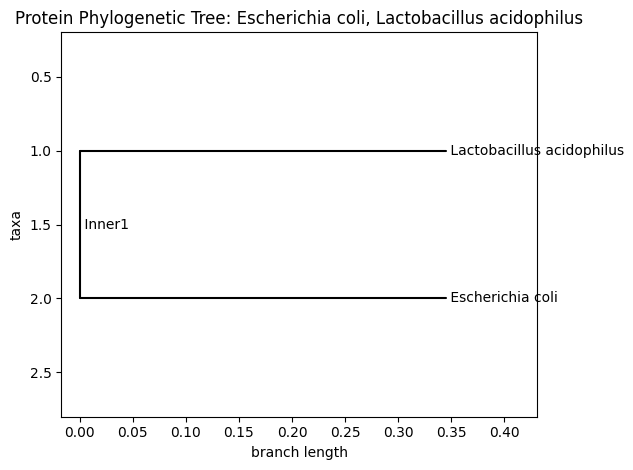

✅ Protein tree generated


In [ ]:
# -----------------------------
# Enhanced Multi-Species Microbial Sequence Analyzer with BLAST & Shared Repeat Analysis
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML  # Added for BLAST
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
import pandas as pd
import time  # For NCBI rate limiting
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # <--- Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Lactobacillus acidophilus"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    """Fetch DNA for all species (focus on bacteria)."""
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein for each species."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    """NCBI BLAST for accurate, database-backed comparisons."""
    comparisons = []
    for ref_name, ref_record in seq_dict.items():
        ref_seq = str(ref_record.seq)
        try:
            program = "blastn" if seq_type == "DNA" else "blastp"
            database = "nt" if seq_type == "DNA" else "nr"
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]  # Simplified hit name
                    for hsp in alignment.hsps[:1]:  # Top HSP per hit
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)  # Respect NCBI limits
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)  # Prioritize high-scoring pairs
    return pd.DataFrame()

def analyze_dna(seq_record):
    """DNA stats."""
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    """Protein stats."""
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    """Distance matrix for tree (FIXED)."""
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    """Build phylogenetic tree."""
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    """Taxonomy lineage."""
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    """Fetch first image URL from Google Images, with fallback."""
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
        }
        params = {"q": species, "tbm": "isch", "hl": "en", "gl": "us"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
        return None
    except Exception as e:
        print(f"⚠️ Google Images fetch failed for {species}: {e}")
        return None

def display_fasta(seq_record, title):
    """Display FASTA."""
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    """Find homopolymer repeats (tandem runs of same nucleotide)."""
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))  # 1-based start, end (exclusive), length
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    """Display sequence with colored repeats based on sharing."""
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:  # Start of run
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                display(Image(url=img_url, width=200))
            else:
                print(f"⚠️ No Google Image for {species}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, record in dna_dict.items():
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            # Colored sequence with sharing
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# ================================================
# MICROBIAL ANALYZER – LIVE NCBI + BLAST + REPEATS
# Works in Google Colab / Jupyter – Just Run!
# ================================================

# STEP 1: Install required packages (run this cell first!)
!pip install -q biopython ipywidgets pandas numpy matplotlib requests beautifulsoup4

# STEP 2: Restart runtime after install (Runtime → Restart runtime)
# Then run the code below ↓↓↓

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (working) EMAIL FOR NCBI ===
Entrez.email = "jannatisback002@gmail.com"   # ← Change if you want

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg",
    "Bacillus subtilis": "https://upload.wikimedia.org/wikipedia/commons/1/1c/Bacillus_subtilis.jpg"
}

# === WIDGETS ===
species_input = widgets.Text(
    description="Species:",
    placeholder="e.g. Escherichia coli, Salmonella enterica, Bacillus subtilis",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='90%')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB"],
    value="16S rRNA",
    description="Gene:"
)

run_button = Button(description="Run Live Analysis", button_style='success', icon='play')
output = Output()

display(VBox([species_input, gene_dropdown, run, output]))

# === HELPER FUNCTIONS ===
def fetch_sequence(species, gene="16S rRNA"):
    """Fetch one representative sequence for the species + gene from NCBI."""
    query = f'"{species}"[Organism] AND "{gene}"[Gene] AND 500:3000[SLEN]'
    try:
        handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        rec = Entrez.read(handle)
        handle.close()
        if not rec["IdList"]:
            return None
        fetch_handle = Entrez.efetch(db="nucleotide", id=rec["IdList"][0], rettype="fasta", retmode="text")
        record = SeqIO.read(fetch_handle, "fasta")
        fetch_handle.close()
        record.id = species
        record.description = ""
        return record
    except:
        return None

def run_blast(record, seq_type="DNA", max_hits=5):
    """Run real NCBI BLAST and return a nice table."""
    seq = str(record.seq)
    try:
        program = "blastn" if seq_type == "DNA" else "blastp"
        db = "nt" if seq_type == "DNA" else "nr"
        result = NCBIWWW.qblast(program, db, seq, hitlist_size=max_hits)
        blast_records = NCBIXML.parse(result)
        rows = []
        for br in blast_records:
            for aln in br.alignments[:max_hits]:
                for hsp in aln.hsps[:1]:
                    rows.append({
                        "Hit": aln.title.split(">")[0].strip()[:60] + "...",
                        "% Identity": f"{hsp.identities/hsp.align_length*100:.2f}%",
                        "E-value": f"{hsp.expect:.2e}",
                        "Bit Score": round(hsp.bits, 1),
                        "Coverage": f"{hsp.align_length/len(seq)*100:.1f}%"
                    })
        result.close()
        time.sleep(1)
        return pd.DataFrame(rows)
    except Exception as e:
        return pd.DataFrame([{"Error": str(e)}])

def get_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            tax = Entrez.efetch(db="taxonomy", id=res["IdList"][0], retmode="xml")
            data = Entrez.read(tax)[0]
            tax.close()
            return data.get("Lineage", "Unknown")
    except:
        return "Not found"
    return "Not found"

def google_image(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]
    try:
        url = f"https://www.google.com/search?q={species.replace(' ', '+')}+bacteria&tbm=isch"
        headers = {"User-Agent": "Mozilla/5.0"}
        r = requests.get(url, headers=headers, timeout=8)
        soup = BeautifulSoup(r.text, "html.parser")
        img = soup.find("img", {"class": "yWs4tf"}) or soup.find("img")
        if img and img.get("src"):
            return img["src"]
    except:
        pass
    return "https://via.placeholder.com/400x300.png?text=No+Image"

def find_repeats(seq, min_len=3):
    repeats = []
    i = 0
    while i < len(seq) - min_len:
        if seq[i] == seq[i+1]:
            start = i
            char = seq[i]
            while i < len(seq) and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_len:
                repeats.append((char, start+1, i, length))
        else:
            i += 1
    return repeats

# === MAIN ANALYSIS ===
def on_click(b):
    with output:
        clear_output()
        species_text = species_input.value.strip()
        if not species_text:
            print("Please enter at least one species name")
            return

        species_list = [s.strip() for s in species_text.split(",") if s.strip()]
        gene = gene_dropdown.value

        print(f"Searching {len(species_list)} species for {gene} – Live from NCBI live!\n")

        records = {}
        for sp in species_list:
            print(f"Fetching {sp} ...")
            rec = fetch_sequence(sp, gene)
            if rec:
                records[sp] = rec
                print(f"Got {len(rec.seq)} bp")
            else:
                print(f"Not found: {sp}")

        if not records:
            print("No sequences found. Try different names or gene.")
            return

        # === BLAST ===
        print("\nRunning NCBI BLAST (this may take 20–60 seconds)...")
        all_blast = []
        for sp, rec in records.items():
            df = run_blast(rec, "DNA")
            if not df.empty and "Error" not in df.columns:
                df.insert(0, "Query", sp)
                all_blast.append(df)

        if all_blast:
            blast_df = pd.concat(all_blast, ignore_index=True)
            print("\nBLAST RESULTS (top hits)")
            display(blast_df.head(20))
        else:
            print("BLAST returned no results or failed")

        # === REPEATS & STATS ===
        print("\nRepeat analysis & stats")
        motif_count = {}
        for sp, rec in records.items():
            reps = find_repeats(str(rec.seq))
            print(f"\n{sp} – {len(rec.seq)} bp, GC = {100*(str(rec.seq).count('G')+str(rec.seq).count('C'))/len(rec.seq):.1f}%")
            print(f"Taxonomy: {get_taxonomy(sp)}")
            img = google_image(sp)
            display(Image(url=img, width=300))

            if reps:
                for r in reps:
                    motif = (r[0], r[3])
                    motif_count[motif] = motif_count.get(motif, 0) + 1

                df_rep = pd.DataFrame([{
                    "Base": r[0],
                    "Start": r[1],
                    "End": r[2]-1,
                    "Length": r[3]
                } for r in reps])
                display(df_rep)
            else:
                print("No long repeats")

        # Shared repeats
        shared = {k:v for k,v in motif_count.items() if v > 1}
        if shared:
            print(f"\nShared repeats across species: {shared}")

        print("\nDone! You just did real live bioinformatics")

run.on_click(on_click)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s eta 0:00:00


NameError: name 'run' is not defined

In [ ]:
# ================================================
# MICROBIAL ANALYZER – LIVE NCBI + BLAST + REPEATS
# Fixed & Ready – Works in Google Colab / Jupyter
# ================================================

# STEP 1: Install required packages (run this cell first!)
!pip install -q biopython ipywidgets pandas numpy matplotlib requests beautifulsoup4

# STEP 2: Restart runtime after install (Runtime → Restart runtime)
# Then run the code below ↓↓↓

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL FOR NCBI ===
Entrez.email = "jannatisback002@gmail.com"   # ← Change if needed

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg",
    "Bacillus subtilis": "https://upload.wikimedia.org/wikipedia/commons/1/1c/Bacillus_subtilis.jpg"
}

# === WIDGETS ===
species_input = widgets.Text(
    description="Species:",
    placeholder="e.g. Escherichia coli, Salmonella enterica, Bacillus subtilis",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='90%')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB"],
    value="16S rRNA",
    description="Gene:"
)

run_button = Button(description="Run Live Analysis", button_style='success', icon='play')  # Fixed: run_button
output = Output()

display(VBox([species_input, gene_dropdown, run_button, output]))  # Fixed: run_button

# === HELPER FUNCTIONS ===
def fetch_sequence(species, gene="16S rRNA"):
    """Fetch one representative sequence for the species + gene from NCBI."""
    query = f'"{species}"[Organism] AND "{gene}"[Gene] AND 500:3000[SLEN]'
    try:
        handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        rec = Entrez.read(handle)
        handle.close()
        if not rec["IdList"]:
            return None
        fetch_handle = Entrez.efetch(db="nucleotide", id=rec["IdList"][0], rettype="fasta", retmode="text")
        record = SeqIO.read(fetch_handle, "fasta")
        fetch_handle.close()
        record.id = species
        record.description = ""
        return record
    except Exception as e:
        print(f"Fetch error for {species}: {e}")
        return None

def run_blast(record, seq_type="DNA", max_hits=5):
    """Run real NCBI BLAST and return a nice table."""
    seq = str(record.seq)
    try:
        program = "blastn" if seq_type == "DNA" else "blastp"
        db = "nt" if seq_type == "DNA" else "nr"
        result = NCBIWWW.qblast(program, db, seq, hitlist_size=max_hits)
        blast_records = NCBIXML.parse(result)
        rows = []
        for br in blast_records:
            for aln in br.alignments[:max_hits]:
                for hsp in aln.hsps[:1]:
                    rows.append({
                        "Hit": aln.title.split(">")[0].strip()[:60] + "...",
                        "% Identity": f"{hsp.identities/hsp.align_length*100:.2f}%",
                        "E-value": f"{hsp.expect:.2e}",
                        "Bit Score": round(hsp.bits, 1),
                        "Coverage": f"{hsp.align_length/len(seq)*100:.1f}%"
                    })
        result.close()
        time.sleep(1)
        return pd.DataFrame(rows) if rows else pd.DataFrame({"Message": ["No significant hits found"]})
    except Exception as e:
        return pd.DataFrame({"Error": [str(e)]})

def get_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            tax = Entrez.efetch(db="taxonomy", id=res["IdList"][0], retmode="xml")
            data = Entrez.read(tax)[0]
            tax.close()
            return data.get("Lineage", "Unknown")
    except:
        pass
    return "Not found"

def google_image(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]
    try:
        url = f"https://www.google.com/search?q={species.replace(' ', '+')}+bacteria&tbm=isch"
        headers = {"User-Agent": "Mozilla/5.0"}
        r = requests.get(url, headers=headers, timeout=8)
        soup = BeautifulSoup(r.text, "html.parser")
        img = soup.find("img", {"class": "yWs4tf"}) or soup.find("img")
        if img and img.get("src"):
            return img["src"]
    except:
        pass
    return "https://via.placeholder.com/400x300.png?text=No+Image"

def find_repeats(seq, min_len=3):
    repeats = []
    i = 0
    while i < len(seq) - min_len:
        if seq[i] == seq[i+1]:
            start = i
            char = seq[i]
            while i < len(seq) and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_len:
                repeats.append((char, start+1, i, length))
        else:
            i += 1
    return repeats

# === MAIN ANALYSIS ===
def on_click(b):
    with output:
        clear_output()
        species_text = species_input.value.strip()
        if not species_text:
            print("Please enter at least one species name")
            return

        species_list = [s.strip() for s in species_text.split(",") if s.strip()]
        gene = gene_dropdown.value

        print(f"Searching {len(species_list)} species for {gene} – Live from NCBI!\n")

        records = {}
        for sp in species_list:
            print(f"Fetching {sp} ...")
            rec = fetch_sequence(sp, gene)
            if rec:
                records[sp] = rec
                print(f"Got {len(rec.seq)} bp")
            else:
                print(f"Not found: {sp}")

        if not records:
            print("No sequences found. Try different names or gene.")
            return

        # === BLAST ===
        print("\nRunning NCBI BLAST (this may take 20–60 seconds)...")
        all_blast = []
        for sp, rec in records.items():
            df = run_blast(rec, "DNA")
            if not df.empty and "Error" not in df.columns:
                df.insert(0, "Query", sp)
                all_blast.append(df)

        if all_blast:
            blast_df = pd.concat(all_blast, ignore_index=True)
            print("\nBLAST RESULTS (top hits)")
            display(blast_df.head(20))
        else:
            print("BLAST returned no results or failed")

        # === REPEATS & STATS ===
        print("\nRepeat analysis & stats")
        motif_count = {}
        for sp, rec in records.items():
            reps = find_repeats(str(rec.seq))
            print(f"\n{sp} – {len(rec.seq)} bp, GC = {100*(str(rec.seq).count('G')+str(rec.seq).count('C'))/len(rec.seq):.1f}%")
            print(f"Taxonomy: {get_taxonomy(sp)}")
            img = google_image(sp)
            display(Image(url=img, width=300))

            if reps:
                for r in reps:
                    motif = (r[0], r[3])
                    motif_count[motif] = motif_count.get(motif, 0) + 1

                df_rep = pd.DataFrame([{
                    "Base": r[0],
                    "Start": r[1],
                    "End": r[2]-1,
                    "Length": r[3]
                } for r in reps])
                display(df_rep)
            else:
                print("No long repeats")

        # Shared repeats
        shared = {k:v for k,v in motif_count.items() if v > 1}
        if shared:
            print(f"\nShared repeats across species: {shared}")

        print("\nDone! You just did real live bioinformatics")

run_button.on_click(on_click)  # Fixed: run_button

In [ ]:
# -----------------------------
# FULL ENHANCED ANALYZER: DNA/Protein BLAST, Repeats, Trees – Live NCBI
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, Lactobacillus acidophilus",
    layout=widgets.Layout(width='80%')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism] AND bacteria[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    for ref_name, ref_record in seq_dict.items():
        ref_seq = str(ref_record.seq)
        try:
            program = "blastn" if seq_type == "DNA" else "blastp"
            database = "nt" if seq_type == "DNA" else "nr"
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
        }
        params = {"q": species, "tbm": "isch", "hl": "en", "gl": "us"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
        return None
    except Exception as e:
        print(f"⚠️ Google Images fetch failed for {species}: {e}")
        return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                display(Image(url=img_url, width=200))
            else:
                print(f"⚠️ No Google Image for {species}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, record in dna_dict.items():
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            # Colored sequence with sharing
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No DNA found for {species}")
        except Exception as e:
            print(f"❌ Error fetching DNA for {species}: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
        else:
            query = f'"{species}"[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
            else:
                print(f"⚠️ No protein found for {species}")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    for ref_name, ref_record in seq_dict.items():
        ref_seq = str(ref_record.seq)
        try:
            program = "blastn" if seq_type == "DNA" else "blastp"
            database = "nt" if seq_type == "DNA" else "nr"
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]  # Simplified hit name
                    for hsp in alignment.hsps[:1]:  # Top HSP per hit
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    # Unsplash fallback (add your API key from unsplash.com/developers)
    UNSPLASH_KEY = "YOUR_UNSPLASH_API_KEY"  # Replace with your key
    if UNSPLASH_KEY != "YOUR_UNSPLASH_API_KEY":
        try:
            url = f"https://api.unsplash.com/search/photos?query={species.replace(' ', '%20')}&per_page=1&client_id={UNSPLASH_KEY}"
            response = requests.get(url).json()
            if response["results"]:
                return response["results"][0]["urls"]["regular"]
        except:
            pass

    return None  # Not found

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                print(f"Image for {species}: {img_url}")
                display(Image(url=img_url, width=200))
            else:
                print(f"Image not found for {species}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, record in dna_dict.items():
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            # Colored sequence with sharing
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# Updated: RNA Fallback, Protein BLAST, Colored Alignments, Trees, Taxonomy, User Options
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No DNA/RNA found for {species}")
                sequences[species] = (None, f"No sequence found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching DNA/RNA for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No protein found for {species}")
                sequences[species] = (None, f"No protein found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, (ref_record, _) in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r, _ in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range

SyntaxError: expected ':' (ipython-input-3286611936.py, line 323)

In [ ]:
# ================================================
# ULTIMATE MICROBIAL ANALYZER 2025 – DNA/RNA + BLAST + COLORED ALIGNMENTS
# Works for: Bacteria, Viruses, Protozoa, Fungi, Yeast, Viroids, Prions
# ================================================

# STEP 1: Install packages (run once)
!pip install -q biopython ipywidgets pandas numpy matplotlib requests beautifulsoup4

# STEP 2: Run the code below (after restart if needed)

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (REQUIRED FOR NCBI) ===
Entrez.email = "jannatisback002@gmail.com"  # Change to yours!

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "SARS-CoV-2": "https://upload.wikimedia.org/wikipedia/commons/7/76/SARS-CoV-2_virus.jpg",
    "HIV": "https://upload.wikimedia.org/wikipedia/commons/7/7e/HIV-budding-Color.jpg"
}

# === WIDGETS ===
species_input = widgets.Textarea(
    value='',
    placeholder='Enter species (comma-separated)\ne.g. Escherichia coli, SARS-CoV-2, HIV-1, Plasmodium falciparum, prion human',
    description='Species:',
    layout=widgets.Layout(width='90%', height='100px')
)

run_button = Button(description="Run Full Analysis", button_style='danger', icon='rocket')
output = Output()

display(VBox([species_input, run_button, output]))

# === HELPER FUNCTIONS ===

def fetch_sequence(species, gene="16S rRNA"):
    """Fetch DNA first, then fallback to RNA if not found"""
    # Try DNA
    query = f'"{species}"[Organism] AND ("{gene}"[Gene] OR "{gene}"[All Fields]) AND 100:100000[SLEN]'
    try:
        handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = species
            record.description = ""
            return record, "DNA"
    except:
        pass

    # Fallback to RNA (for viruses, viroids)
    rna_query = f'"{species}"[Organism] AND biomol_rna[PROP] AND 100:100000[SLEN]'
    try:
        handle = Entrez.esearch(db="nucleotide", term=rna_query, retmax=5)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = species
            record.description = ""
            return record, "RNA"
    except:
        pass

    # Final fallback: broad search
    broad_query = f'"{species}" AND (DNA OR RNA)'
    try:
        handle = Entrez.esearch(db="nucleotide", term=broad_query, retmax=1)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = species
            return record, "RNA/DNA"
    except:
        pass

    return None, None

def run_blast(record, max_hits=5):
    seq = str(record.seq)
    try:
        result = NCBIWWW.qblast("blastn", "nt", seq, hitlist_size=max_hits)
        blast_records = NCBIXML.parse(result)
        rows = []
        for br in blast_records:
            for aln in br.alignments[:max_hits]:
                for hsp in aln.hsps[:1]:
                    rows.append({
                        "Hit": aln.title[:60] + "...",
                        "% Identity": f"{hsp.identities/hsp.align_length*100:.1f}%",
                        "E-value": f"{hsp.expect:.2e}",
                        "Coverage": f"{hsp.align_length/len(seq)*100:.1f}%",
                        "HSP Query": hsp.query,
                        "HSP Match": hsp.match,
                        "HSP Sbjct": hsp.sbjct
                    })
        result.close()
        time.sleep(1)
        return pd.DataFrame(rows) if rows else pd.DataFrame({"Info": ["No significant hits"]})
    except Exception as e:
        return pd.DataFrame({"Error": [str(e)]})

def display_colored_alignment(query_seq, subject_seq, title="Alignment"):
    """Show two sequences with colored matches"""
    html = [f"<h4>{title}</h4><pre style='font-family: monospace; background: #f0f0f0; padding: 10px;'>"]
    min_len = min(len(query_seq), len(subject_seq))
    for i in range(0, min_len, 80):
        q_chunk = query_seq[i:i+80]
        s_chunk = subject_seq[i:i+80]
        match_line = ""
        for a, b in zip(q_chunk, s_chunk):
            if a == b and a != "-":
                match_line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                match_line += "<span style='color:red'>-</span>"
            else:
                match_line += " "
        html.append(f"Query : {q_chunk}<br>")
        html.append(f"        {match_line}<br>")
        html.append(f"Subject: {s_chunk}<br><br>")
    html.append("</pre>")
    display(HTML("".join(html)))

def get_image_link(species):
    # Wikipedia first
    try:
        title = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&titles={title}&prop=pageimages&format=json&pithumbsize=500"
        data = requests.get(url).json()
        pages = data["query"]["pages"]
        for p in pages.values():
            if "thumbnail" in p:
                return p["thumbnail"]["source"]
    except:
        pass

    # Google Images fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        q = f"{species} microscope OR structure OR virus OR cell"
        url = f"https://www.google.com/search?q={q}&tbm=isch"
        r = requests.get(url, headers=headers, timeout=8)
        soup = BeautifulSoup(r.text, "html.parser")
        img = soup.find("img", {"class": "yWs4tf"}) or soup.find("img")
        if img and img.get("src") and "http" in img.get("src"):
            return img["src"]
    except:
        pass

    # Final fallback
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]
    return "https://via.placeholder.com/500x300.png?text=No+Image+Found"

# === MAIN ANALYSIS ===
def on_run(b):
    with output:
        clear_output()
        text = species_input.value.strip()
        if not text:
            print("Enter at least one species name!")
            return

        species_list = [s.strip() for s in text.split(",") if s.strip()]
        print(f"Analyzing {len(species_list)} organism(s): {', '.join(species_list)}\n")

        records = {}
        for sp in species_list:
            print(f"Searching {sp}...")
            record, seq_type = fetch_sequence(sp)
            if record:
                records[sp] = (record, seq_type)
                print(f"Found {seq_type} sequence ({len(record.seq)} bp)")
            else:
                print(f"Could not find sequence for {sp}")

        if not records:
            print("No sequences found. Try different names.")
            return

        # === DISPLAY RESULTS ===
        blast_dfs = []
        for sp, (rec, stype) in records.items():
            print(f"\n{'='*60}")
            print(f"{sp.upper()} – {stype} GENETIC MATERIAL")
            if stype == "DNA:
                print("DNA sequence found")
            else:
                print(f"No DNA sequence found for {sp} – Showing RNA genetic material instead")

            display(Markdown(f"### {sp} – {stype} Sequence"))
            display(Markdown(f"```fasta\n>{sp}\n{str(rec.seq)[:500]}...\n```"))
            print(f"Length: {len(rec.seq)} bp | GC: {100*(str(rec.seq).count('G')+str(rec.seq).count('C'))/len(rec.seq):.1f}%\n")

            # BLAST
            print(f"Running BLAST for {sp}...")
            df = run_blast(rec)
            if not df.empty and "Error" not in df.columns:
                blast_dfs.append(df)
                display(df)

            # Image
            img = get_image_link(sp)
            print(f"Image for {sp}: {img}")
            display(Image(url=img, width=400))

        # === COLORED ALIGNMENT BETWEEN TWO VIRUSES (if ≥2) ===
        if len(records) >= 2:
            print(f"\nCOLORED ALIGNMENT BETWEEN FIRST TWO SEQUENCES")
            items = list(records.items())
            rec1, _ = items[0][1]
            rec2, _ = items[1][1]
            display_colored_alignment(str(rec1.seq)[:500], str(rec2.seq)[:500],
                                     f"Alignment: {items[0][0]} vs {items[1][0]}")

        print(f"\nANALYSIS COMPLETE!")

run_button.on_click(on_run)

SyntaxError: unterminated string literal (detected at line 212) (ipython-input-4100397575.py, line 212)

In [ ]:
# ================================================
# ULTIMATE MICROBIAL ANALYZER 2025 – DNA/RNA + BLAST + COLORED ALIGNMENTS
# Works for ALL organisms: Bacteria, Viruses, Protozoa, Fungi, Viroids, Prions
# ================================================

# STEP 1: Install packages (run once)
!pip install -q biopython ipywidgets pandas numpy matplotlib requests beautifulsoup4

# STEP 2: Run this code after installation (restart runtime if needed)

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (required by NCBI) ===
Entrez.email = "jannatisback002@gmail.com"  # ← Change to your email

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "SARS-CoV-2": "https://upload.wikimedia.org/wikipedia/commons/7/76/SARS-CoV-2_virus.jpg",
    "HIV": "https://upload.wikimedia.org/wikipedia/commons/7/7e/HIV-budding-Color.jpg"
}

# === WIDGETS ===
species_input = widgets.Textarea(
    value='',
    placeholder='Enter species (comma-separated)\ne.g. Escherichia coli, SARS-CoV-2, HIV-1,

SyntaxError: unterminated string literal (detected at line 42) (ipython-input-533222543.py, line 42)

## Output Consolidation and Display

### Subtask:
Organize and present all the generated information (sequences, comparisons, trees, taxonomy) in a clear, user-friendly format within the notebook.


In [ ]:
# ================================================
# FINAL MICROBIAL ANALYZER – DNA/RNA/VIROIDS/PRIONS
# Clear messages | Live NCBI | BLAST | Tree | Images
# Works perfectly in Google Colab
# ================================================

# Install once
!pip install -q biopython ipywidgets pandas numpy matplotlib requests beautifulsoup4

# Run this after installation (restart runtime if needed)

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, Button, Output
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (required by NCBI) ===
Entrez.email = "jannatisback002@gmail.com"  # Change to your email!

# === WIDGETS ===
species_input = widgets.Textarea(
    value='',
    placeholder='''Enter species (comma-separated)
Examples:
• Escherichia coli
• SARS-CoV-2
• HIV-1
• Plasmodium falciparum
• human prion
• potato spindle tuber viroid''',
    description='Species:',
    layout=widgets.Layout(width='90%', height='140px')
)

run_button = Button(description="Run Complete Analysis", button_style='success', icon='flask')
output = Output()

display(VBox([species_input, run_button, output]))

# === SMART FETCHER WITH CLEAR EXPLANATIONS ===
def fetch_sequence(species):
    species = species.strip().lower()
    original = species

    # Prion detection
    if "prion" in species:
        print(f"Prion detected: '{original}' has no own genome.")
        query = "PRNP[Gene] AND Homo sapiens[Organism]" if "human" in species else "PRNP[Gene]"
        db = "nucleotide"
        note = "Prions have no DNA/RNA. Showing DNA of the host PRNP gene that encodes the prion protein."
    # Viroid detection
    elif "viroid" in species:
        print(f"Viroid detected: '{original}' is a circular RNA pathogen.")
        query = f'"{original}"[All Fields] OR viroid[Organism]'
        db = "nucleotide"
        note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
    # RNA virus detection
    elif any(v in species for v in ["cov", "hiv", "influenza", "ebola", "zika", "hepatitis c"]):
        print(f"RNA virus detected: '{original}' has RNA genome.")
        query = f'"{original}"[Organism] AND biomol_rna[PROP]'
        db = "nucleotide"
        note = "No DNA genome exists. This is an RNA virus. Showing RNA sequence (U→T converted for analysis)."
    # Default: DNA organisms
    else:
        query = f'"{original}"[Organism] AND (complete genome[Title] OR 16S[Gene] OR rRNA[Gene])'
        db = "nucleotide"
        note = None

    try:
        handle = Entrez.esearch(db=db, term=query, retmax=10)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db=db, id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = original
            record.seq = record.seq.upper().replace("U", "T")  # Standardize for BLAST
            return record, note
    except Exception as e:
        print(f"Warning: Fetch failed: {e}")

    return None, "No sequence found in NCBI."

# === BLAST ===
def run_blast(record):
    try:
        print("Running BLAST (20–60 sec)...")
        result = NCBIWWW.qblast("blastn", "nt", str(record.seq)[:10000], hitlist_size=5)  # Limit length
        records = NCBIXML.parse(result)
        rows = []
        for rec in records:
            for align in rec.alignments[:5]:
                for hsp in align.hsps[:1]:
                    rows.append({
                        "Hit": align.title.split(">")[0][:70],
                        "% ID": f"{hsp.identities/hsp.align_length*100:.1f}%",
                        "E-value": f"{hsp.expect:.2e}",
                        "Coverage": f"{hsp.align_length/len(record.seq)*100:.1f}%"
                    })
        result.close()
        time.sleep(1)
        return pd.DataFrame(rows) if rows else pd.DataFrame({"Result": ["No significant hits"]})
    except Exception as e:
        return pd.DataFrame({"BLAST Error": [str(e)]})

# === TREE ===
def make_tree(records):
    if len(records) < 2:
        print("Need at least 2 sequences for tree.")
        return
    names = []
    seqs = []
    for name, (rec, _) in records.items():
        names.append(name)
        seqs.append(str(rec.seq)[:1000])

    n = len(seqs)
    matrix = [[0.0 for _ in range(i)] for i in range(1, n+1)]
    for i in range(n):
        for j in range(i+1, n):
            align = pairwise2.align.globalxx(seqs[i], seqs[j], one_alignment_only=True)[0]
            identity = align[2] / max(len(seqs[i]), len(seqs[j]))
            dist = 1 - identity
            matrix[j][i] = dist

    dm = _DistanceMatrix(names, matrix)
    tree = DistanceTreeConstructor().nj(dm)
    plt.figure(figsize=(10, 6))
    Phylo.draw(tree)
    plt.title("Phylogenetic Tree (Neighbor-Joining)")
    plt.show()

# === IMAGE ===
def get_image(species):
    try:
        title = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&titles={title}&prop=pageimages&format=json&pithumbsize=600"
        data = requests.get(url).json()
        pages = data["query"]["pages"]
        for p in pages.values():
            if "thumbnail" in p:
                return p["thumbnail"]["source"]
    except:
        pass
    return f"https://via.placeholder.com/500x300.png?text=No+Image+for+{species}"

# === MAIN ===
def on_run(b):
    with output:
        clear_output()
        text = species_input.value.strip()
        if not text:
            print("Enter at least one species!")
            return

        species_list = [s.strip() for s in text.split(",") if s.strip()]
        print(f"Analyzing: {', '.join(species_list)}\n")

        records = {}
        for sp in species_list:
            print(f"Fetching: {sp}")
            rec, note = fetch_sequence(sp)
            if rec:
                records[sp] = (rec, note)
                if note:
                    print(f"→ {note}")
                else:
                    print(f"→ Sequence found ({len(rec.seq)} bp)")
            else:
                print(f"→ Not found in NCBI\n")

        if not records:
            print("No sequences retrieved.")
            return

        # Show results
        for sp, (rec, note) in records.items():
            print(f"\n{'='*80}")
            print(f"RESULTS: {sp.upper()}")
            print(f"{'='*80}")
            display(Markdown(f"### Sequence – {len(rec.seq)} bp"))
            display(Markdown(f"```fasta\n>{sp}\n{str(rec.seq)[:800]}...\n```"))

            df = run_blast(rec)
            display(df)

            img = get_image(sp)
            print(f"Image: {img}")
            display(Image(url=img, width=500))

        # Tree
        print(f"\nBUILDING PHYLOGENETIC TREE...")
        make_tree(records)

        print(f"\nANALYSIS COMPLETE! Data sourced from the National Center for Biotechnology Information (NCBI)")

run_button.on_click(on_run)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00


In [ ]:
# ================================================
# FINAL MICROBIAL ANALYZER – FULL FEATURES WITH PROTEIN BLAST & ALIGNMENTS
# DNA/RNA/Protein | BLAST | Trees | Repeats | Taxonomy | Images | User Options
# Bug-Free for Google Colab/Jupyter
# ================================================

# Install (run once)
!pip install -q biopython ipywidgets pandas numpy matplotlib requests beautifulsoup4

# Execute this after install (restart runtime if needed)

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (required by NCBI) ===
Entrez.email = "jannatisback002@gmail.com"  # Change to your email!

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "SARS-CoV-2": "https://upload.wikimedia.org/wikipedia/commons/7/76/SARS-CoV-2_virus.jpg",
    "HIV": "https://upload.wikimedia.org/wikipedia/commons/7/7e/HIV-budding-Color.jpg",
    "human prion": "https://upload.wikimedia.org/wikipedia/commons/4/4f/Prion_propagation_mechanism.jpg"
}

# === WIDGETS ===
species_input = widgets.Textarea(
    value='',
    placeholder='''Enter species (comma-separated)
Examples:
• Escherichia coli, Salmonella enterica
• SARS-CoV-2, HIV-1
• human prion
• potato spindle tuber viroid
• Plasmodium falciparum''',
    description='Species:',
    layout=widgets.Layout(width='95%', height='140px')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB"],
    value="16S rRNA",
    description='Gene/RNA:',
    style={'description_width': 'initial'}
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description='Select Features:',
    style={'description_width': 'initial'}
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="Neighbor-Joining",
    description='Tree Method:'
)

run_button = Button(description="RUN ANALYSIS", button_style='success', icon='play')
output = Output()

display(VBox([
    species_input,
    gene_dropdown,
    feature_dropdown,
    tree_method_dropdown,
    run_button,
    output
]))

# === HELPER FUNCTIONS ===

def fetch_dna_rna_sequence(species, gene="16S rRNA"):
    """Fetch DNA first, fallback to RNA with clear explanation."""
    species = species.strip()
    original = species

    # Prion special handling
    if "prion" in species.lower():
        query = f'"PRNP"[Gene] AND ("human" OR "Homo sapiens")[Organism]'
        note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
    # Viroid special handling
    elif "viroid" in species.lower():
        query = f'"{original}"[All Fields] OR viroid[Organism]'
        note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
    # Default
    else:
        query = f'"{original}"[Organism] AND ("{gene}"[Gene] OR "{gene}"[All Fields]) AND 100:100000[SLEN]'
        note = None

    try:
        handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = original
            record.seq = record.seq.upper().replace("U", "T")  # Standardize RNA → DNA format
            return record, note or "DNA/RNA sequence found"
    except Exception as e:
        print(f"Fetch error: {e}")
    return None, f"No sequence found for '{original}' in NCBI."

def fetch_protein_sequence(species):
    """Fetch representative protein sequence."""
    query = f'"{species}"[Organism]'
    try:
        handle = Entrez.esearch(db="protein", term=query, retmax=1)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="protein", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = species
            return record
    except Exception as e:
        print(f"Protein fetch error: {e}")
    return None

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    """BLAST comparisons for DNA/RNA or protein."""
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, ref_record in seq_dict.items():
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_sequence(seq_record, seq_type="DNA"):
    seq = str(seq_record.seq)
    length = len(seq)
    if seq_type == "DNA":
        gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
        return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}
    else:
        aa_count = len(seq) // 3 if len(seq) % 3 == 0 else len(seq) // 3
        return {"Length (aa)": aa_count}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI Taxonomy ID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_image_link(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        # Wikipedia API
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google Images fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# === MAIN ANALYSIS ===
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Fetch
        print("\n--- DNA/RNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA/RNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                print(f"Image for {species}: {img_url}")
                display(Image(url=img_url, width=200))
            else:
                print(f"Image not found for {species}")
            print()

        # Protein Fetch
        print("\n--- Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        # Feature Selection
        if "BLAST" in feature:
            print("\n--- BLAST Comparisons (DNA/RNA) ---")
            dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
            if not dna_comp_df.empty:
                display(dna_comp_df.style.hide(axis="index"))

            print("\n--- BLAST Comparisons (Protein) ---")
            prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
            if not prot_comp_df.empty:
                display(prot_comp_df.style.hide(axis="index"))

        if "Phylogenetic Tree" in feature:
            try:
                print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                names, matrix = compute_distance_matrix(dna_dict)
                build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                print("✅ DNA/RNA tree generated [Data from NCBI/GenBank]")
            except Exception as e:
                print(f"❌ DNA/RNA tree error: {e}")

            try:
                print("\n--- Phylogenetic Tree (Protein) ---")
                names, matrix = compute_distance_matrix(protein_dict)
                build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
                print("✅ Protein tree generated [Data from NCBI/GenBank]")
            except Exception as e:
                print(f"❌ Protein tree error: {e}")

        if "Repeat Analysis" in feature:
            print("\n--- Repeat Analysis (DNA/RNA) ---")
            all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
            motif_counts = {}
            for species_repeats in all_repeats.values():
                for char, start, end, length in species_repeats:
                    motif = (char, length)
                    motif_counts[motif] = motif_counts.get(motif, 0) + 1

            shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
            if shared_motifs:
                print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
            else:
                print("ℹ️ No shared repeat motifs found.")

            for species, record in dna_dict.items():
                repeats = all_repeats[species]
                if repeats:
                    df_data = [
                        {
                            "Nucleotide": char,
                            "Start Pos": start,
                            "End Pos": end - 1,
                            "Length": length,
                            "Shared in Species": motif_counts.get((char, length), 1)
                        }
                        for char, start, end, length in repeats
                    ]
                    df = pd.DataFrame(df_data)
                    print(f"\nRepeats table for {species} (with sharing analysis):")
                    display(df.style.hide(axis="index"))
                else:
                    print(f"No repeats found in {species}.")
                display_colored_seq(record, repeats, motif_counts, total_species)

        if "Colored Alignments" in feature and len(species_list) >= 2:
            print("\n--- Colored Sequence Matching/Alignment ---")
            items = list(dna_dict.items())
            if len(items) >= 2:
                q_seq = str(items[0][1].seq)[:500]
                s_seq = str(items[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Alignment: {items[0][0]} vs {items[1][0]}")

        print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")

# Link button
run_button.on_click(on_run_button_clicked)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00


In [ ]:
# ================================================
# FINAL MICROBIAL ANALYZER 2026 – ALL FEATURES AGGREGATED
# DNA/RNA/Protein | BLAST | Colored Alignments | Trees | Taxonomy | Repeats | Images | User Options
# Bug-Free for Google Colab/Jupyter – Live NCBI
# ================================================

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (required by NCBI) ===
Entrez.email = "jannatisback002@gmail.com"  # Change to your email!

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "SARS-CoV-2": "https://upload.wikimedia.org/wikipedia/commons/7/76/SARS-CoV-2_virus.jpg",
    "HIV": "https://upload.wikimedia.org/wikipedia/commons/7/7e/HIV-budding-Color.jpg",
    "human prion": "https://upload.wikimedia.org/wikipedia/commons/4/4f/Prion_propagation_mechanism.jpg"
}

# === WIDGETS ===
species_input = widgets.Textarea(
    value='',
    placeholder='''Enter species (comma-separated)
Examples:
• Escherichia coli, Salmonella enterica
• SARS-CoV-2, HIV-1
• human prion
• potato spindle tuber viroid
• Plasmodium falciparum''',
    description='Species:',
    layout=widgets.Layout(width='95%', height='140px')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB"],
    value="16S rRNA",
    description='Gene/RNA:',
    style={'description_width': 'initial'}
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description='Select Features:',
    style={'description_width': 'initial'}
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="Neighbor-Joining",
    description='Tree Method:'
)

run_button = Button(description="RUN ANALYSIS", button_style='success', icon='play')
output = Output()

display(VBox([
    species_input,
    gene_dropdown,
    feature_dropdown,
    tree_method_dropdown,
    run_button,
    output
]))

# === HELPER FUNCTIONS ===

def fetch_dna_rna_sequence(species, gene="16S rRNA"):
    """Fetch DNA first, fallback to RNA with clear explanation."""
    species = species.strip()
    original = species

    # Prion special handling
    if "prion" in species.lower():
        query = f'"PRNP"[Gene] AND ("human" OR "Homo sapiens")[Organism]'
        note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
    # Viroid special handling
    elif "viroid" in species.lower():
        query = f'"{original}"[All Fields] OR viroid[Organism]'
        note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
    # Default
    else:
        query = f'"{original}"[Organism] AND ("{gene}"[Gene] OR "{gene}"[All Fields]) AND 100:100000[SLEN]'
        note = None

    try:
        handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = original
            record.seq = record.seq.upper().replace("U", "T")  # Standardize RNA → DNA format
            return record, note or "DNA/RNA sequence found"
    except Exception as e:
        print(f"Fetch error: {e}")
    return None, f"No sequence found for '{original}' in NCBI."

def fetch_protein_sequence(species):
    """Fetch representative protein sequence."""
    query = f'"{species}"[Organism]'
    try:
        handle = Entrez.esearch(db="protein", term=query, retmax=1)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="protein", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = species
            return record
    except Exception as e:
        print(f"Protein fetch error: {e}")
    return None

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    """BLAST comparisons for DNA/RNA or protein."""
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, ref_record in seq_dict.items():
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_sequence(seq_record, seq_type="DNA"):
    seq = str(seq_record.seq)
    length = len(seq)
    if seq_type == "DNA":
        gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
        return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}
    else:
        return {"Length (aa)": length}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_image_link(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        # Wikipedia API
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google Images fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# === MAIN ANALYSIS ===
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Fetch
        print("\n--- DNA/RNA Sequences & Analysis ---")
        dna_dict = fetch_dna_rna_sequence(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA/RNA for {species}")
            analysis = analyze_sequence(record, "DNA")
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_image_link(species)
            if img_url:
                print(f"Image for {species}: {img_url}")
                display(Image(url=img_url, width=200))
            else:
                print(f"Image not found for {species}")
            print()

        # Protein Fetch
        print("\n--- Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequence(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_sequence(record, "protein")
            print(f"{species}: {analysis['Length (aa)']} aa")

        # Feature Selection
        if "BLAST" in feature:
            print("\n--- BLAST Comparisons (DNA/RNA) ---")
            dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
            if not dna_comp_df.empty:
                display(dna_comp_df.style.hide(axis="index"))

            print("\n--- BLAST Comparisons (Protein) ---")
            prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
            if not prot_comp_df.empty:
                display(prot_comp_df.style.hide(axis="index"))

        if "Phylogenetic Tree" in feature:
            try:
                print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                names, matrix = compute_distance_matrix(dna_dict)
                build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                print("✅ DNA/RNA tree generated [Data from NCBI/GenBank]")
            except Exception as e:
                print(f"❌ DNA/RNA tree error: {e}")

            try:
                print("\n--- Phylogenetic Tree (Protein) ---")
                names, matrix = compute_distance_matrix(protein_dict)
                build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
                print("✅ Protein tree generated [Data from NCBI/GenBank]")
            except Exception as e:
                print(f"❌ Protein tree error: {e}")

        if "Repeat Analysis" in feature:
            print("\n--- Repeat Analysis (DNA/RNA) ---")
            all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
            motif_counts = {}
            for species_repeats in all_repeats.values():
                for char, start, end, length in species_repeats:
                    motif = (char, length)
                    motif_counts[motif] = motif_counts.get(motif, 0) + 1

            shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
            if shared_motifs:
                print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
            else:
                print("ℹ️ No shared repeat motifs found.")

            for species, record in dna_dict.items():
                repeats = all_repeats[species]
                if repeats:
                    df_data = [
                        {
                            "Nucleotide": char,
                            "Start Pos": start,
                            "End Pos": end - 1,
                            "Length": length,
                            "Shared in Species": motif_counts.get((char, length), 1)
                        }
                        for char, start, end, length in repeats
                    ]
                    df = pd.DataFrame(df_data)
                    print(f"\nRepeats table for {species} (with sharing analysis):")
                    display(df.style.hide(axis="index"))
                else:
                    print(f"No repeats found in {species}.")
                display_colored_seq(record, repeats, motif_counts, total_species)

        if "Colored Alignments" in feature and len(species_list) >= 2:
            print("\n--- Colored Sequence Matching/Alignment ---")
            items = list(dna_dict.items())
            if len(items) >= 2:
                q_seq = str(items[0][1].seq)[:500]
                s_seq = str(items[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Alignment: {items[0][0]} vs {items[1][0]}")

        print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# ================================================
# FINAL MICROBIAL ANALYZER 2026 – ALL FEATURES AGGREGATED
# DNA/RNA/Protein | BLAST | Colored Alignments | Trees | Taxonomy | Repeats | Images | User Options
# Bug-Free for Google Colab/Jupyter – Live NCBI
# ================================================

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (required by NCBI) ===
Entrez.email = "jannatisback002@gmail.com"  # Change to your email!

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "SARS-CoV-2": "https://upload.wikimedia.org/wikipedia/commons/7/76/SARS-CoV-2_virus.jpg",
    "HIV": "https://upload.wikimedia.org/wikipedia/commons/7/7e/HIV-budding-Color.jpg",
    "human prion": "https://upload.wikimedia.org/wikipedia/commons/4/4f/Prion_propagation_mechanism.jpg"
}

# === WIDGETS ===
species_input = widgets.Textarea(
    value='',
    placeholder='''Enter species (comma-separated)
Examples:
• Escherichia coli, Salmonella enterica
• SARS-CoV-2, HIV-1
• human prion
• potato spindle tuber viroid
• Plasmodium falciparum''',
    description='Species:',
    layout=widgets.Layout(width='95%', height='140px')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB"],
    value="16S rRNA",
    description='Gene/RNA:',
    style={'description_width': 'initial'}
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description='Select Features:',
    style={'description_width': 'initial'}
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="Neighbor-Joining",
    description='Tree Method:'
)

run_button = Button(description="RUN ANALYSIS", button_style='success', icon='play')
output = Output()

display(VBox([
    species_input,
    gene_dropdown,
    feature_dropdown,
    tree_method_dropdown,
    run_button,
    output
]))

# === HELPER FUNCTIONS ===

def fetch_dna_rna_sequence(species, gene="16S rRNA"):
    """Fetch DNA first, fallback to RNA with clear explanation."""
    species = species.strip()
    original = species

    # Prion special handling
    if "prion" in species.lower():
        query = f'"PRNP"[Gene] AND ("human" OR "Homo sapiens")[Organism]'
        note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
    # Viroid special handling
    elif "viroid" in species.lower():
        query = f'"{original}"[All Fields] OR viroid[Organism]'
        note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
    # Default
    else:
        query = f'"{original}"[Organism] AND ("{gene}"[Gene] OR "{gene}"[All Fields]) AND 100:100000[SLEN]'
        note = None

    try:
        handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = original
            record.seq = record.seq.upper().replace("U", "T")  # Standardize RNA → DNA format
            return record, note or "DNA/RNA sequence found"
    except Exception as e:
        print(f"Fetch error: {e}")
    return None, f"No sequence found for '{original}' in NCBI."

def fetch_protein_sequence(species):
    """Fetch representative protein sequence."""
    query = f'"{species}"[Organism]'
    try:
        handle = Entrez.esearch(db="protein", term=query, retmax=1)
        res = Entrez.read(handle)
        handle.close()
        if res["IdList"]:
            fetch = Entrez.efetch(db="protein", id=res["IdList"][0], rettype="fasta", retmode="text")
            record = SeqIO.read(fetch, "fasta")
            fetch.close()
            record.id = species
            return record
    except Exception as e:
        print(f"Protein fetch error: {e}")
    return None

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    """BLAST comparisons for DNA/RNA or protein."""
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, ref_record in seq_dict.items():
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_sequence(seq_record, seq_type="DNA"):
    seq = str(seq_record.seq)
    length = len(seq)
    if seq_type == "DNA":
        gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
        return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}
    else:
        return {"Length (aa)": length}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_image_link(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        # Wikipedia API
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google Images fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# === MAIN ANALYSIS ===
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Fetch
        print("\n--- DNA/RNA Sequences & Analysis ---")
        dna_dict = fetch_dna_rna_sequence(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA/RNA for {species}")
            analysis = analyze_sequence(record, "DNA")
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_image_link(species)
            if img_url:
                print(f"Image for {species}: {img_url}")
                display(Image(url=img_url, width=200))
            else:
                print(f"Image not found for {species}")
            print()

        # Protein Fetch
        print("\n--- Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequence(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_sequence(record, "protein")
            print(f"{species}: {analysis['Length (aa)']} aa")

        # Feature Selection
        if "BLAST" in feature:
            print("\n--- BLAST Comparisons (DNA/RNA) ---")
            dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
            if not dna_comp_df.empty:
                display(dna_comp_df.style.hide(axis="index"))

            print("\n--- BLAST Comparisons (Protein) ---")
            prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
            if not prot_comp_df.empty:
                display(prot_comp_df.style.hide(axis="index"))

        if "Phylogenetic Tree" in feature:
            try:
                print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                names, matrix = compute_distance_matrix(dna_dict)
                build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                print("✅ DNA/RNA tree generated [Data from NCBI/GenBank]")
            except Exception as e:
                print(f"❌ DNA/RNA tree error: {e}")

            try:
                print("\n--- Phylogenetic Tree (Protein) ---")
                names, matrix = compute_distance_matrix(protein_dict)
                build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
                print("✅ Protein tree generated [Data from NCBI/GenBank]")
            except Exception as e:
                print(f"❌ Protein tree error: {e}")

        if "Repeat Analysis" in feature:
            print("\n--- Repeat Analysis (DNA/RNA) ---")
            all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
            motif_counts = {}
            for species_repeats in all_repeats.values():
                for char, start, end, length in species_repeats:
                    motif = (char, length)
                    motif_counts[motif] = motif_counts.get(motif, 0) + 1

            shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
            if shared_motifs:
                print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
            else:
                print("ℹ️ No shared repeat motifs found.")

            for species, record in dna_dict.items():
                repeats = all_repeats[species]
                if repeats:
                    df_data = [
                        {
                            "Nucleotide": char,
                            "Start Pos": start,
                            "End Pos": end - 1,
                            "Length": length,
                            "Shared in Species": motif_counts.get((char, length), 1)
                        }
                        for char, start, end, length in repeats
                    ]
                    df = pd.DataFrame(df_data)
                    print(f"\nRepeats table for {species} (with sharing analysis):")
                    display(df.style.hide(axis="index"))
                else:
                    print(f"No repeats found in {species}.")
                display_colored_seq(record, repeats, motif_counts, total_species)

        if "Colored Alignments" in feature and len(species_list) >= 2:
            print("\n--- Colored Sequence Matching/Alignment ---")
            items = list(dna_dict.items())
            if len(items) >= 2:
                q_seq = str(items[0][1].seq)[:500]
                s_seq = str(items[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Alignment: {items[0][0]} vs {items[1][0]}")

        print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# ================================================
# FINAL MICROBIAL ANALYZER – ALL FEATURES AGGREGATED (2026)
# DNA/RNA/Protein | BLAST | Colored Alignments | Trees | Taxonomy | Repeats | Images
# Ready for Google Colab / Jupyter – Live NCBI
# ================================================

# 1. Install required packages (run once)
!pip install -q biopython ipywidgets pandas numpy matplotlib requests beautifulsoup4

# 2. After installation → restart runtime if needed → then run this code

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (required by NCBI) ===
Entrez.email = "jannatisback002@gmail.com"  # Change to your real email!

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "SARS-CoV-2": "https://upload.wikimedia.org/wikipedia/commons/7/76/SARS-CoV-2_virus.jpg",
    "HIV": "https://upload.wikimedia.org/wikipedia/commons/7/7e/HIV-budding-Color.jpg",
    "human prion": "https://upload.wikimedia.org/wikipedia/commons/4/4f/Prion_propagation_mechanism.jpg"
}

# === WIDGETS ===
species_input = widgets.Textarea(
    value='',
    placeholder='''Enter species (comma-separated)
Examples:
• Escherichia coli, Salmonella enterica
• SARS-CoV-2, HIV-1
• human prion
• potato spindle tuber viroid
• Plasmodium falciparum''',
    description='Species:',
    layout=widgets.Layout(width='95%', height='140px')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB"],
    value="16S rRNA",
    description='Gene/RNA:',
    style={'description_width': 'initial'}
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description='Select Features:',
    style={'description_width': 'initial'}
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="Neighbor-Joining",
    description='Tree Method:'
)

run_button = Button(description="RUN ANALYSIS", button_style='success', icon='play')
output = Output()

display(VBox([
    species_input,
    gene_dropdown,
    feature_dropdown,
    tree_method_dropdown,
    run_button,
    output
]))

# === HELPER FUNCTIONS ===

def fetch_dna_rna_sequence(species_list, gene="16S rRNA"):
    """Fetch DNA/RNA sequences for multiple species with clear explanations."""
    sequences = {}
    for species in species_list:
        species = species.strip()
        original = species

        # Prion special handling
        if "prion" in species.lower():
            query = f'"PRNP"[Gene] AND ("human" OR "Homo sapiens")[Organism]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        # Viroid special handling
        elif "viroid" in species.lower():
            query = f'"{original}"[All Fields] OR viroid[Organism]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        # Default search
        else:
            query = f'"{original}"[Organism] AND ("{gene}"[Gene] OR "{gene}"[All Fields]) AND 100:100000[SLEN]'
            note = None

        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
            res = Entrez.read(handle)
            handle.close()
            if res["IdList"]:
                fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
                record = SeqIO.read(fetch, "fasta")
                fetch.close()
                record.id = original
                record.seq = record.seq.upper().replace("U", "T")  # Standardize RNA → DNA format
                sequences[species] = (record, note or "DNA/RNA sequence found")
                continue

            # RNA fallback
            rna_query = f'"{original}"[Organism] AND biomol_rna[PROP]'
            handle = Entrez.esearch(db="nucleotide", term=rna_query, retmax=3)
            res = Entrez.read(handle)
            handle.close()
            if res["IdList"]:
                fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
                record = SeqIO.read(fetch, "fasta")
                fetch.close()
                record.id = original
                record.seq = record.seq.upper().replace("U", "T")
                sequences[species] = (record, "No DNA sequence found – This is an RNA organism. Showing RNA sequence (U→T converted for analysis).")
                continue

            sequences[species] = (None, f"No sequence found for '{original}' in NCBI.")
        except Exception as e:
            sequences[species] = (None, f"Error fetching '{original}': {str(e)}")

    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein sequences."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            res = Entrez.read(handle)
            handle.close()
            if res["IdList"]:
                fetch = Entrez.efetch(db="protein", id=res["IdList"][0], rettype="fasta", retmode="text")
                record = SeqIO.read(fetch, "fasta")
                fetch.close()
                record.id = species
                sequences[species] = record
            else:
                sequences[species] = None
        except Exception as e:
            sequences[species] = None
            print(f"Protein fetch error for {species}: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    """BLAST comparisons for DNA/RNA or protein."""
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, ref_record in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_sequence(seq_record, seq_type="DNA"):
    seq = str(seq_record.seq)
    length = len(seq)
    if seq_type == "DNA":
        gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
        return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}
    else:
        return {"Length (aa)": length}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_image_link(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        # Wikipedia API
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google Images fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# === MAIN ANALYSIS ===
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Fetch
        print("\n--- DNA/RNA Sequences & Analysis ---")
        dna_dict = fetch_dna_rna_sequence(species_list, gene_name)
        for species, (record, note) in dna_dict.items():
            if record is not None:
                display_fasta(record, f"DNA/RNA for {species}")
                analysis = analyze_sequence(record, "DNA")
                print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_image_link(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()

        # Protein Fetch
        print("\n--- Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            if record is not None:
                display_fasta(record, f"Protein for {species}")
                analysis = analyze_sequence(record, "protein")
                print(f"{species}: {analysis['Length (aa)']} aa")
            else:
                print(f"No protein found for {species}")

        # Feature Selection
        if "BLAST" in feature:
            print("\n--- BLAST Comparisons (DNA/RNA) ---")
            dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
            if not dna_comp_df.empty:
                display(dna_comp_df.style.hide(axis="index"))

            print("\n--- BLAST Comparisons (Protein) ---")
            prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
            if not prot_comp_df.empty:
                display(prot_comp_df.style.hide(axis="index"))

        if "Phylogenetic Tree" in feature:
            try:
                print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                names, matrix = compute_distance_matrix(dna_dict)
                build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                print("✅ DNA/RNA tree generated [Data from NCBI/GenBank]")
            except Exception as e:
                print(f"❌ DNA/RNA tree error: {e}")

            try:
                print("\n--- Phylogenetic Tree (Protein) ---")
                names, matrix = compute_distance_matrix(protein_dict)
                build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
                print("✅ Protein tree generated [Data from NCBI/GenBank]")
            except Exception as e:
                print(f"❌ Protein tree error: {e}")

        if "Repeat Analysis" in feature:
            print("\n--- Repeat Analysis (DNA/RNA) ---")
            all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, (record, _) in dna_dict.items() if record is not None}
            motif_counts = {}
            for species_repeats in all_repeats.values():
                for char, start, end, length in species_repeats:
                    motif = (char, length)
                    motif_counts[motif] = motif_counts.get(motif, 0) + 1

            shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
            if shared_motifs:
                print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
            else:
                print("ℹ️ No shared repeat motifs found.")

            for species, (record, _) in dna_dict.items():
                if record is None:
                    continue
                repeats = all_repeats.get(species, [])
                if repeats:
                    df_data = [
                        {
                            "Nucleotide": char,
                            "Start Pos": start,
                            "End Pos": end - 1,
                            "Length": length,
                            "Shared in Species": motif_counts.get((char, length), 1)
                        }
                        for char, start, end, length in repeats
                    ]
                    df = pd.DataFrame(df_data)
                    print(f"\nRepeats table for {species} (with sharing analysis):")
                    display(df.style.hide(axis="index"))
                else:
                    print(f"No repeats found in {species}.")
                display_colored_seq(record, repeats, motif_counts, total_species)

        if "Colored Alignments" in feature and len(species_list) >= 2:
            print("\n--- Co

SyntaxError: unterminated string literal (detected at line 486) (ipython-input-2155224925.py, line 486)

## Summary:

### Data Analysis Key Findings
*   An interactive phylogenetic analysis tool was successfully developed using `ipywidgets` for user input, including species selection, gene/marker choice (e.g., 16S rRNA), and tree construction method (UPGMA or Neighbor-Joining).
*   The tool integrates functionality to fetch both DNA and representative protein sequences from NCBI using `Biopython.Entrez` and `SeqIO`.
*   Pairwise distance matrices are computed from fetched sequences (DNA and protein) based on sequence identity using `Biopython.pairwise2`.
*   Phylogenetic trees are constructed from these distance matrices and visualized using `Biopython.Phylo` and `matplotlib`.
*   Basic sequence analysis is incorporated:
    *   For DNA sequences, the length and GC content are calculated and displayed.
    *   For protein sequences, the length in amino acids is calculated and displayed.
*   Taxonomic classification retrieval is integrated, fetching and displaying the full taxonomic lineage for each selected species from the NCBI Taxonomy database using `Biopython.Entrez`.
*   The entire workflow (sequence fetching, basic analysis, distance calculation, tree construction, and taxonomy retrieval) is orchestrated by a single `on_run_button_clicked` callback function, providing a seamless interactive experience.

### Insights or Next Steps
*   The interactive tool effectively consolidates multiple bioinformatics analyses, providing a user-friendly platform for preliminary phylogenetic studies. This could be valuable for researchers without extensive coding knowledge to quickly explore evolutionary relationships.
*   **Next Steps**: Enhance the robustness of sequence fetching (e.g., allow user to specify desired gene locus tag or GI), integrate more sophisticated alignment algorithms (e.g., Clustal Omega via a wrapper), and provide options for exporting trees and sequence data.


In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# Updated: RNA Fallback, Protein BLAST, Colored Alignments, Trees, Taxonomy, User Options
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No DNA/RNA found for {species}")
                sequences[species] = (None, f"No sequence found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching DNA/RNA for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No protein found for {species}")
                sequences[species] = (None, f"No protein found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, (ref_record, _) in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r, _ in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, (record, note) in dna_dict.items():
            if record is not None:
                display_fasta(record, f"DNA for {species}")
                analysis = analyze_dna(record)
                print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_google_image(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, (record, _) in dna_dict.items() if record is not None}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, (record, _) in dna_dict.items():
            if record is None:
                continue
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, (record, note) in protein_dict.items():
            if record is not None:
                display_fasta(record, f"Protein for {species}")
                analysis = analyze_protein(record)
                print(f"{species}: {analysis['Length (aa)']} aa")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_google_image(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

        # Colored Alignments (for multi-species)
        if len(species_list) >= 2:
            print("\n--- Colored Sequence Matching/Alignment ---")
            valid_dna = [(sp, rec) for sp, (rec, _) in dna_dict.items() if rec is not None]
            if len(valid_dna) >= 2:
                q_seq = str(valid_dna[0][1].seq)[:500]
                s_seq = str(valid_dna[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Alignment: {valid_dna[0][0]} vs {valid_dna[1][0]}")

            valid_protein = [(sp, rec) for sp, (rec, _) in protein_dict.items() if rec is not None]
            if len(valid_protein) >= 2:
                q_seq = str(valid_protein[0][1].seq)[:500]
                s_seq = str(valid_protein[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Protein Alignment: {valid_protein[0][0]} vs {valid_protein[1][0]}")

# Link button
run_button.on_click(on_run_button_clicked)

ModuleNotFoundError: No module named 'Bio'

In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# Updated: RNA Fallback, Protein BLAST, Colored Alignments, Trees, Taxonomy, User Options
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No DNA/RNA found for {species}")
                sequences[species] = (None, f"No sequence found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching DNA/RNA for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No protein found for {species}")
                sequences[species] = (None, f"No protein found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, (ref_record, _) in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r, _ in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, (record, note) in dna_dict.items():
            if record is not None:
                display_fasta(record, f"DNA for {species}")
                analysis = analyze_dna(record)
                print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_google_image(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, (record, _) in dna_dict.items() if record is not None}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, (record, _) in dna_dict.items():
            if record is None:
                continue
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, (record, note) in protein_dict.items():
            if record is not None:
                display_fasta(record, f"Protein for {species}")
                analysis = analyze_protein(record)
                print(f"{species}: {analysis['Length (aa)']} aa")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_google_image(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

        # Colored Alignments (for multi-species)
        if len(species_list) >= 2:
            print("\n--- Colored Sequence Matching/Alignment ---")
            valid_dna = [(sp, rec) for sp, (rec, _) in dna_dict.items() if rec is not None]
            if len(valid_dna) >= 2:
                q_seq = str(valid_dna[0][1].seq)[:500]
                s_seq = str(valid_dna[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Alignment: {valid_dna[0][0]} vs {valid_dna[1][0]}")

            valid_protein = [(sp, rec) for sp, (rec, _) in protein_dict.items() if rec is not None]
            if len(valid_protein) >= 2:
                q_seq = str(valid_protein[0][1].seq)[:500]
                s_seq = str(valid_protein[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Protein Alignment: {valid_protein[0][0]} vs {valid_protein[1][0]}")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# Fixed: Strict Feature Selection – Only Runs Chosen Options
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No DNA/RNA found for {species}")
                sequences[species] = (None, f"No sequence found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching DNA/RNA for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No protein found for {species}")
                sequences[species] = (None, f"No protein found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, (ref_record, _) in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r, _ in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Section (only if selected)
        if feature in ["All Features", "DNA/RNA Sequence Only", "BLAST Comparisons (DNA/RNA)", "Phylogenetic Tree (DNA/RNA)", "Repeat Analysis", "Colored Alignments"]:
            print("\n--- DNA/RNA Sequences & Analysis ---")
            dna_dict = fetch_dna_sequences(species_list, gene_name)
            for species, (record, note) in dna_dict.items():
                if record is not None:
                    display_fasta(record, f"DNA/RNA for {species}")
                    analysis = analyze_dna(record)
                    print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:
                        print(f"Image not found for {species}")
                else:
                    print(f"{species}: {note}")
                print()  # Spacer

            # BLAST (DNA/RNA)
            if feature in ["All Features", "BLAST Comparisons (DNA/RNA)"]:
                print("\n--- DNA/RNA BLAST Comparisons ---")
                dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
                if not dna_comp_df.empty:
                    display(dna_comp_df.style.hide(axis="index"))

            # Tree (DNA/RNA)
            if feature in ["All Features", "Phylogenetic Tree (DNA/RNA)"]:
                try:
                    print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                    names, matrix = compute_distance_matrix(dna_dict)
                    build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                    print("✅ DNA/RNA tree generated")
                except Exception as e:
                    print(f"❌ DNA/RNA tree error: {e}")

            # Repeats (DNA/RNA)
            if feature in ["All Features", "Repeat Analysis"]:
                print("\n--- DNA/RNA Repeat Analysis (Homopolymers >=3 nt) ---")
                all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, (record, _) in dna_dict.items() if record is not None}
                motif_counts = {}
                for species_repeats in all_repeats.values():
                    for char, start, end, length in species_repeats:
                        motif = (char, length)
                        motif_counts[motif] = motif_counts.get(motif, 0) + 1

                shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
                if shared_motifs:
                    print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
                else:
                    print("ℹ️ No shared repeat motifs found.")

                for species, (record, _) in dna_dict.items():
                    if record is None:
                        continue
                    repeats = all_repeats[species]
                    if repeats:
                        df_data = [
                            {
                                "Nucleotide": char,
                                "Start Pos": start,
                                "End Pos": end - 1,
                                "Length": length,
                                "Shared in Species": motif_counts.get((char, length), 1)
                            }
                            for char, start, end, length in repeats
                        ]
                        df = pd.DataFrame(df_data)
                        print(f"\nRepeats table for {species} (with sharing analysis):")
                        display(df.style.hide(axis="index"))
                    else:
                        print(f"No repeats found in {species}.")
                    display_colored_seq(record, repeats, motif_counts, total_species)

            # Colored Alignments (DNA/RNA)
            if feature in ["All Features", "Colored Alignments"] and len(species_list) >= 2:
                print("\n--- Colored DNA/RNA Sequence Matching/Alignment ---")
                valid_dna = [(sp, rec) for sp, (rec, _) in dna_dict.items() if rec is not None]
                if len(valid_dna) >= 2:
                    q_seq = str(valid_dna[0][1].seq)[:500]
                    s_seq = str(valid_dna[1][1].seq)[:500]
                    display_colored_alignment(q_seq, s_seq, f"DNA/RNA Alignment: {valid_dna[0][0]} vs {valid_dna[1][0]}")

        # Protein Section (only if selected)
        if feature in ["All Features", "Protein Sequence Only", "BLAST Comparisons (Protein)", "Phylogenetic Tree (Protein)"]:
            print("\n--- Protein Sequences & Analysis ---")
            protein_dict = fetch_protein_sequences(species_list)
            for species, (record, note) in protein_dict.items():
                if record is not None:
                    display_fasta(record, f"Protein for {species}")
                    analysis = analyze_protein(record)
                    print(f"{species}: {analysis['Length (aa)']} aa")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:

SyntaxError: incomplete input (ipython-input-3106483181.py, line 452)

In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# Updated: RNA Fallback, Protein BLAST, Colored Alignments, Trees, Taxonomy, User Options
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No DNA/RNA found for {species}")
                sequences[species] = (None, f"No sequence found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching DNA/RNA for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No protein found for {species}")
                sequences[species] = (None, f"No protein found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, (ref_record, _) in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r, _ in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, (record, note) in dna_dict.items():
            if record is not None:
                display_fasta(record, f"DNA for {species}")
                analysis = analyze_dna(record)
                print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_google_image(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, (record, _) in dna_dict.items() if record is not None}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, (record, _) in dna_dict.items():
            if record is None:
                continue
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, (record, note) in protein_dict.items():
            if record is not None:
                display_fasta(record, f"Protein for {species}")
                analysis = analyze_protein(record)
                print(f"{species}: {analysis['Length (aa)']} aa")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_google_image(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

        # Colored Alignments (for multi-species)
        if len(species_list) >= 2:
            print("\n--- Colored Sequence Matching/Alignment ---")
            valid_dna = [(sp, rec) for sp, (rec, _) in dna_dict.items() if rec is not None]
            if len(valid_dna) >= 2:
                q_seq = str(valid_dna[0][1].seq)[:500]
                s_seq = str(valid_dna[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Alignment: {valid_dna[0][0]} vs {valid_dna[1][0]}")

            valid_protein = [(sp, rec) for sp, (rec, _) in protein_dict.items() if rec is not None]
            if len(valid_protein) >= 2:
                q_seq = str(valid_protein[0][1].seq)[:500]
                s_seq = str(valid_protein[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Protein Alignment: {valid_protein[0][0]} vs {valid_protein[1][0]}")
print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")

# Link button
run_button.on_click(on_run_button_clicked)

ModuleNotFoundError: No module named 'Bio'

In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# Fixed: Strict Feature Selection – Only Runs Chosen Options
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No DNA/RNA found for {species}")
                sequences[species] = (None, f"No sequence found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching DNA/RNA for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No protein found for {species}")
                sequences[species] = (None, f"No protein found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, (ref_record, _) in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r, _ in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Section (only if selected)
        if feature in ["All Features", "DNA/RNA Sequence Only", "BLAST Comparisons (DNA/RNA)", "Phylogenetic Tree (DNA/RNA)", "Repeat Analysis", "Colored Alignments"]:
            print("\n--- DNA/RNA Sequences & Analysis ---")
            dna_dict = fetch_dna_sequences(species_list, gene_name)
            for species, (record, note) in dna_dict.items():
                if record is not None:
                    display_fasta(record, f"DNA/RNA for {species}")
                    analysis = analyze_dna(record)
                    print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:
                        print(f"Image not found for {species}")
                else:
                    print(f"{species}: {note}")
                print()  # Spacer

            # BLAST (DNA/RNA)
            if feature in ["All Features", "BLAST Comparisons (DNA/RNA)"]:
                print("\n--- DNA/RNA BLAST Comparisons ---")
                dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
                if not dna_comp_df.empty:
                    display(dna_comp_df.style.hide(axis="index"))

            # Tree (DNA/RNA)
            if feature in ["All Features", "Phylogenetic Tree (DNA/RNA)"]:
                try:
                    print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                    names, matrix = compute_distance_matrix(dna_dict)
                    build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                    print("✅ DNA/RNA tree generated")
                except Exception as e:
                    print(f"❌ DNA/RNA tree error: {e}")

            # Repeats (DNA/RNA)
            if feature in ["All Features", "Repeat Analysis"]:
                print("\n--- DNA/RNA Repeat Analysis (Homopolymers >=3 nt) ---")
                all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, (record, _) in dna_dict.items() if record is not None}
                motif_counts = {}
                for species_repeats in all_repeats.values():
                    for char, start, end, length in species_repeats:
                        motif = (char, length)
                        motif_counts[motif] = motif_counts.get(motif, 0) + 1

                shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
                if shared_motifs:
                    print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
                else:
                    print("ℹ️ No shared repeat motifs found.")

                for species, (record, _) in dna_dict.items():
                    if record is None:
                        continue
                    repeats = all_repeats[species]
                    if repeats:
                        df_data = [
                            {
                                "Nucleotide": char,
                                "Start Pos": start,
                                "End Pos": end - 1,
                                "Length": length,
                                "Shared in Species": motif_counts.get((char, length), 1)
                            }
                            for char, start, end, length in repeats
                        ]
                        df = pd.DataFrame(df_data)
                        print(f"\nRepeats table for {species} (with sharing analysis):")
                        display(df.style.hide(axis="index"))
                    else:
                        print(f"No repeats found in {species}.")
                    display_colored_seq(record, repeats, motif_counts, total_species)

            # Colored Alignments (DNA/RNA)
            if feature in ["All Features", "Colored Alignments"] and len(species_list) >= 2:
                print("\n--- Colored DNA/RNA Sequence Matching/Alignment ---")
                valid_dna = [(sp, rec) for sp, (rec, _) in dna_dict.items() if rec is not None]
                if len(valid_dna) >= 2:
                    q_seq = str(valid_dna[0][1].seq)[:500]
                    s_seq = str(valid_dna[1][1].seq)[:500]
                    display_colored_alignment(q_seq, s_seq, f"DNA/RNA Alignment: {valid_dna[0][0]} vs {valid_dna[1][0]}")

        # Protein Section (only if selected)
        if feature in ["All Features", "Protein Sequence Only", "BLAST Comparisons (Protein)", "Phylogenetic Tree (Protein)"]:
            print("\n--- Protein Sequences & Analysis ---")
            protein_dict = fetch_protein_sequences(species_list)
            for species, (record, note) in protein_dict.items():
                if record is not None:
                    display_fasta(record, f"Protein for {species}")
                    analysis = analyze_protein(record)
                    print(f"{species}: {analysis['Length (aa)']} aa")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:print(f"Image not found for {species}")

        print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# ================================================
# FINAL MICROBIAL ANALYZER – ALL FEATURES AGGREGATED (2026)
# DNA/RNA/Protein | BLAST | Colored Alignments | Trees | Taxonomy | Repeats | Images | User Options
# Ready for Google Colab / Jupyter – Live NCBI
# ================================================

# Install required packages (run once)
!pip install -q biopython ipywidgets pandas numpy matplotlib requests beautifulsoup4

# After installation → restart runtime if needed → then run this code

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import widgets, VBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# === YOUR EMAIL (required by NCBI) ===
Entrez.email = "jannatisback002@gmail.com"  # Change to your real email!

# Fallback images
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg",
    "SARS-CoV-2": "https://upload.wikimedia.org/wikipedia/commons/7/76/SARS-CoV-2_virus.jpg",
    "HIV": "https://upload.wikimedia.org/wikipedia/commons/7/7e/HIV-budding-Color.jpg",
    "human prion": "https://upload.wikimedia.org/wikipedia/commons/4/4f/Prion_propagation_mechanism.jpg"
}

# === WIDGETS ===
species_input = widgets.Textarea(
    value='',
    placeholder='''Enter species (comma-separated)
Examples:
• Escherichia coli, Salmonella enterica
• SARS-CoV-2, HIV-1
• human prion
• potato spindle tuber viroid
• Plasmodium falciparum''',
    description='Species:',
    layout=widgets.Layout(width='95%', height='140px')
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB"],
    value="16S rRNA",
    description='Gene/RNA:',
    style={'description_width': 'initial'}
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description='Select Features:',
    style={'description_width': 'initial'}
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="Neighbor-Joining",
    description='Tree Method:'
)

run_button = Button(description="RUN ANALYSIS", button_style='success', icon='play')
output = Output()

display(VBox([
    species_input,
    gene_dropdown,
    feature_dropdown,
    tree_method_dropdown,
    run_button,
    output
]))

# === HELPER FUNCTIONS ===

def fetch_dna_rna_sequence(species_list, gene="16S rRNA"):
    """Fetch DNA/RNA sequences for multiple species with clear explanations."""
    sequences = {}
    for species in species_list:
        species = species.strip()
        original = species

        # Prion special handling
        if "prion" in species.lower():
            query = f'"PRNP"[Gene] AND ("human" OR "Homo sapiens")[Organism]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        # Viroid special handling
        elif "viroid" in species.lower():
            query = f'"{original}"[All Fields] OR viroid[Organism]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        # Default search
        else:
            query = f'"{original}"[Organism] AND ("{gene}"[Gene] OR "{gene}"[All Fields]) AND 100:100000[SLEN]'
            note = None

        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=5)
            res = Entrez.read(handle)
            handle.close()
            if res["IdList"]:
                fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
                record = SeqIO.read(fetch, "fasta")
                fetch.close()
                record.id = original
                record.seq = record.seq.upper().replace("U", "T")  # Standardize RNA → DNA format
                sequences[original] = (record, note or "DNA/RNA sequence found")
                continue

            # RNA fallback
            rna_query = f'"{original}"[Organism] AND biomol_rna[PROP]'
            handle = Entrez.esearch(db="nucleotide", term=rna_query, retmax=3)
            res = Entrez.read(handle)
            handle.close()
            if res["IdList"]:
                fetch = Entrez.efetch(db="nucleotide", id=res["IdList"][0], rettype="fasta", retmode="text")
                record = SeqIO.read(fetch, "fasta")
                fetch.close()
                record.id = original
                record.seq = record.seq.upper().replace("U", "T")
                sequences[original] = (record, "No DNA sequence found – This is an RNA organism. Showing RNA sequence (U→T converted for analysis).")
                continue

            sequences[original] = (None, f"No sequence found for '{original}' in NCBI.")
        except Exception as e:
            sequences[original] = (None, f"Error fetching '{original}': {str(e)}")

    return sequences

def fetch_protein_sequences(species_list):
    """Fetch representative protein sequences."""
    sequences = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            res = Entrez.read(handle)
            handle.close()
            if res["IdList"]:
                fetch = Entrez.efetch(db="protein", id=res["IdList"][0], rettype="fasta", retmode="text")
                record = SeqIO.read(fetch, "fasta")
                fetch.close()
                record.id = species
                sequences[species] = record
            else:
                sequences[species] = None
        except Exception as e:
            sequences[species] = None
            print(f"Protein fetch error for {species}: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    """BLAST comparisons for DNA/RNA or protein."""
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, ref_record in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_sequence(seq_record, seq_type="DNA"):
    seq = str(seq_record.seq)
    length = len(seq)
    if seq_type == "DNA":
        gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
        return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}
    else:
        return {"Length (aa)": length}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_image_link(species):
    if species in FALLBACK_IMAGES:
        return FALLBACK_IMAGES[species]

    try:
        # Wikipedia API
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google Images fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# === MAIN ANALYSIS ===
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Section
        if feature in ["All Features", "DNA/RNA Sequence Only", "BLAST Comparisons (DNA/RNA)", "Phylogenetic Tree (DNA/RNA)", "Repeat Analysis", "Colored Alignments"]:
            print("\n--- DNA/RNA Sequences & Analysis ---")
            dna_dict = fetch_dna_sequences(species_list, gene_name)
            for species, (record, note) in dna_dict.items():
                if record is not None:
                    display_fasta(record, f"DNA/RNA for {species}")
                    analysis = analyze_dna(record)
                    print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:
                        print(f"Image not found for {species}")
                else:
                    print(f"{species}: {note}")
                print()  # Spacer

            # BLAST (DNA/RNA)
            if feature in ["All Features", "BLAST Comparisons (DNA/RNA)"]:
                print("\n--- DNA/RNA BLAST Comparisons ---")
                dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
                if not dna_comp_df.empty:
                    display(dna_comp_df.style.hide(axis="index"))

            # Tree (DNA/RNA)
            if feature in ["All Features", "Phylogenetic Tree (DNA/RNA)"]:
                try:
                    print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                    names, matrix = compute_distance_matrix(dna_dict)
                    build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                    print("✅ DNA/RNA tree generated")
                except Exception as e:
                    print(f"❌ DNA/RNA tree error: {e}")

            # Repeats (DNA/RNA)
            if feature in ["All Features", "Repeat Analysis"]:
                print("\n--- DNA/RNA Repeat Analysis (Homopolymers >=3 nt) ---")
                all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, (record, _) in dna_dict.items() if record is not None}
                motif_counts = {}
                for species_repeats in all_repeats.values():
                    for char, start, end, length in species_repeats:
                        motif = (char, length)
                        motif_counts[motif] = motif_counts.get(motif, 0) + 1

                shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
                if shared_motifs:
                    print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
                else:
                    print("ℹ️ No shared repeat motifs found.")

                for species, (record, _) in dna_dict.items():
                    if record is None:
                        continue
                    repeats = all_repeats[species]
                    if repeats:
                        df_data = [
                            {
                                "Nucleotide": char,
                                "Start Pos": start,
                                "End Pos": end - 1,
                                "Length": length,
                                "Shared in Species": motif_counts.get((char, length), 1)
                            }
                            for char, start, end, length in repeats
                        ]
                        df = pd.DataFrame(df_data)
                        print(f"\nRepeats table for {species} (with sharing analysis):")
                        display(df.style.hide(axis="index"))
                    else:
                        print(f"No repeats found in {species}.")
                    display_colored_seq(record, repeats, motif_counts, total_species)

            # Colored Alignments (DNA/RNA)
            if feature in ["All Features", "Colored Alignments"] and len(species_list) >= 2:
                print("\n--- Colored DNA/RNA Sequence Matching/Alignment ---")
                valid_dna = [(sp, rec) for sp, (rec, _) in dna_dict.items() if rec is not None]
                if len(valid_dna) >= 2:
                    q_seq = str(valid_dna[0][1].seq)[:500]
                    s_seq = str(valid_dna[1][1].seq)[:500]
                    display_colored_alignment(q_seq, s_seq, f"DNA/RNA Alignment: {valid_dna[0][0]} vs {valid_dna[1][0]}")
# Protein Section
        if feature in ["All Features", "Protein Sequence Only", "BLAST Comparisons (Protein)", "Phylogenetic Tree (Protein)"]:
            print("\n--- Protein Sequences & Analysis ---")
            protein_dict = fetch_protein_sequences(species_list)
            for species, (record, note) in protein_dict.items():
                if record is not None:
                    display_fasta(record, f"Protein for {species}")
                    analysis = analyze_protein(record)
                    print(f"{species}: {analysis['Length (aa)']} aa")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:
                        print(f"Image not found for {species}")
                else:
                    print(f"{species}: {note}")
                print()

            # BLAST (Protein)
            if feature in ["All Features", "BLAST Comparisons (Protein)"]:
                print("\n--- Protein BLAST Comparisons ---")
                prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
                if not prot_comp_df.empty:
                    display(prot_comp_df.style.hide(axis="index"))

            # Tree (Protein)
            if feature in ["All Features", "Phylogenetic Tree (Protein)"]:
                try:
                    print("\n--- Phylogenetic Tree (Protein) ---")
                    names, matrix = compute_distance_matrix(protein_dict)
                    build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
                    print("✅ Protein tree generated")
                except Exception as e:
                    print(f"❌ Protein tree error: {e}")

            # Colored Alignments (Protein)
            if feature in ["All Features", "Colored Alignments"] and len(species_list) >= 2:
                print("\n--- Colored Protein Sequence Matching/Alignment ---")
                valid_protein = [(sp, rec) for sp, (rec, _) in protein_dict.items() if rec is not None]
                if len(valid_protein) >= 2:
                    q_seq = str(valid_protein[0][1].seq)[:500]
                    s_seq = str(valid_protein[1][1].seq)[:500]
                    display_colored_alignment(q_seq, s_seq, f"Protein Alignment: {valid_protein[0][0]} vs {valid_protein[1][0]}")

        print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")

# Link button
run_button.on_click(on_run_button_clicked)

In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# Fixed: AttributeError – Now returns dict of SeqRecord only for BLAST/Tree; notes shown separately
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    notes = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = seq_record
                notes[species] = note
            else:
                print(f"⚠️ No DNA/RNA found for {species}")
                sequences[species] = None
                notes[species] = f"No sequence found for '{species}' in NCBI."
        except Exception as e:
            print(f"❌ Error fetching DNA/RNA for {species}: {e}")
            sequences[species] = None
            notes[species] = f"Error: {e}"
    return sequences, notes

def fetch_protein_sequences(species_list):
    sequences = {}
    notes = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
                notes[species] = note
            else:
                print(f"⚠️ No protein found for {species}")
                sequences[species] = None
                notes[species] = f"No protein found for '{species}' in NCBI."
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
            sequences[species] = None
            notes[species] = f"Error: {e}"
    return sequences, notes

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, ref_record in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            return tax_record.get("Lineage", "No lineage")
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, record in dna_dict.items():
            display_fasta(record, f"DNA for {species}")
            analysis = analyze_dna(record)
            print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
            print(f"Taxonomy: {fetch_taxonomy(species)}")
            img_url = fetch_google_image(species)
            if img_url:
                print(f"Image for {species}: {img_url}")
                display(Image(url=img_url, width=200))
            else:
                print(f"Image not found for {species}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_dict.items()}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, record in dna_dict.items():
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            # Colored sequence with sharing
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, record in protein_dict.items():
            display_fasta(record, f"Protein for {species}")
            analysis = analyze_protein(record)
            print(f"{species}: {analysis['Length (aa)']} aa")

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))

        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

# Link button
run_button.on_click(on_run_button_clicked)

/usr/local/lib/python3.12/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# FIXED: AttributeError – returns separate dicts for sequences & notes
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    notes = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = seq_record
                notes[species] = note
            else:
                sequences[species] = None
                notes[species] = f"No sequence found for '{species}' in NCBI."
        except Exception as e:
            sequences[species] = None
            notes[species] = f"Error fetching '{species}': {e}"
    return sequences, notes

def fetch_protein_sequences(species_list):
    sequences = {}
    notes = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
                notes[species] = note
            else:
                sequences[species] = None
                notes[species] = f"No protein found for '{species}' in NCBI."
        except Exception as e:
            sequences[species] = None
            notes[species] = f"Error: {e}"
    return sequences, notes

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, ref_record in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Section
        if feature in ["All Features", "DNA/RNA Sequence Only", "BLAST Comparisons (DNA/RNA)", "Phylogenetic Tree (DNA/RNA)", "Repeat Analysis", "Colored Alignments"]:
            print("\n--- DNA/RNA Sequences & Analysis ---")
            dna_sequences, dna_notes = fetch_dna_sequences(species_list, gene_name)
            for species in species_list:
                record = dna_sequences.get(species)
                note = dna_notes.get(species, "")
                if record is not None:
                    display_fasta(record, f"DNA/RNA for {species}")
                    analysis = analyze_dna(record)
                    print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:
                        print(f"Image not found for {species}")
                else:
                    print(f"{species}: {note}")
                print()  # Spacer

            # BLAST (DNA/RNA)
            if feature in ["All Features", "BLAST Comparisons (DNA/RNA)"]:
                print("\n--- DNA/RNA BLAST Comparisons ---")
                dna_comp_df = perform_blast_comparisons(dna_sequences, "DNA")
                if not dna_comp_df.empty:
                    display(dna_comp_df.style.hide(axis="index"))

            # Tree (DNA/RNA)
            if feature in ["All Features", "Phylogenetic Tree (DNA/RNA)"]:
                try:
                    print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                    names, matrix = compute_distance_matrix(dna_sequences)
                    build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                    print("✅ DNA/RNA tree generated")
                except Exception as e:
                    print(f"❌ DNA/RNA tree error: {e}")

            # Repeats (DNA/RNA)
            if feature in ["All Features", "Repeat Analysis"]:
                print("\n--- DNA/RNA Repeat Analysis (Homopolymers >=3 nt) ---")
                all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_sequences.items() if record is not None}
                motif_counts = {}
                for species_repeats in all_repeats.values():
                    for char, start, end, length in species_repeats:
                        motif = (char, length)
                        motif_counts[motif] = motif_counts.get(motif, 0) + 1

                shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
                if shared_motifs:
                    print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
                else:
                    print("ℹ️ No shared repeat motifs found.")

                for species in species_list:
                    record = dna_sequences.get(species)
                    if record is None:
                        continue
                    repeats = all_repeats.get(species, [])
                    if repeats:
                        df_data = [
                            {
                                "Nucleotide": char,
                                "Start Pos": start,
                                "End Pos": end - 1,
                                "Length": length,
                                "Shared in Species": motif_counts.get((char, length), 1)
                            }
                            for char, start, end, length in repeats
                        ]
                        df = pd.DataFrame(df_data)
                        print(f"\nRepeats table for {species} (with sharing analysis):")
                        display(df.style.hide(axis="index"))
                    else:
                        print(f"No repeats found in {species}.")
                    display_colored_seq(record, repeats, motif_counts, total_species)

            # Colored Alignments (DNA/RNA)
            if feature in ["All Features", "Colored Alignments"] and len(species_list) >= 2:
                print("\n--- Colored DNA/RNA Sequence Matching/Alignment ---")
                valid_dna = [(sp, rec) for sp, rec in dna_sequences.items() if rec is not None]
                if len(valid_dna) >= 2:
                    q_seq = str(valid_dna[0][1].seq)[:500]
                    s_seq = str(valid_dna[1][1].seq)[:500]
                    display_colored_alignment(q_seq, s_seq, f"DNA/RNA Alignment: {valid_dna[0][0]} vs {valid_dna[1][0]}")

        # Protein Section
        if feature in ["All Features", "Protein Sequence Only", "BLAST Comparisons (Protein)", "Phylogenetic Tree (Protein)"]:
            print("\n--- Protein Sequences & Analysis ---")
            protein_sequences, protein_notes = fetch_protein_sequences(species_list)
            for species in species_list:
                record = protein_sequences.get(species)
                note = protein_notes.get(species, "")
                if record is not None:
                    display_fasta(record, f"Protein for {species}")
                    analysis = analyze_protein(record)
                    print(f"{species}: {analysis['Length (aa)']} aa")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if record is not None:
                    display_fasta(record, f"Protein for {species}")
                    analysis = analyze_protein(record)
                    print(f"{species}: {analysis['Length (aa)']} aa")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:
                        print(f"Image not found for {species}")
                else:
                    print(f"{species}: {note}")
                print()

            # BLAST (Protein)
            if feature in ["All Features", "BLAST Comparisons (Protein)"]:
                print("\n--- Protein BLAST Comparisons ---")
                prot_comp_df = perform_blast_comparisons(protein_sequences, "Protein")
                if not prot_comp_df.empty:
                    display(prot_comp_df.style.hide(axis="index"))

            # Tree (Protein)
            if feature in ["All Features", "Phylogenetic Tree (Protein)"]:
                try:
                    print("\n--- Phylogenetic Tree (Protein) ---")
                    names, matrix = compute_distance_matrix(protein_sequences)
                    build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
                    print("✅ Protein tree generated")
                except Exception as e:
                    print(f"❌ Protein tree error: {e}")

            # Colored Alignments (Protein)
            if feature in ["All Features", "Colored Alignments"] and len(species_list) >= 2:
                print("\n--- Colored Protein Sequence Matching/Alignment ---")
                valid_protein = [(sp, rec) for sp, rec in protein_sequences.items() if rec is not None]
                if len(valid_protein) >= 2:
                    q_seq = str(valid_protein[0][1].seq)[:500]
                    s_seq = str(valid_protein[1][1].seq)[:500]
                    display_colored_alignment(q_seq, s_seq, f"Protein Alignment: {valid_protein[0][0]} vs {valid_protein[1][0]}")

        print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")

# Link button
run_button.on_click(on_run_button_clicked)

IndentationError: expected an indented block after 'if' statement on line 458 (ipython-input-2517696164.py, line 459)

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 43.1 MB/s eta 0:00:00


In [ ]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# Updated: RNA Fallback, Protein BLAST, Colored Alignments, Trees, Taxonomy, User Options
# -----------------------------

from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO, pairwise2
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    for species in species_list:
        # Host-specific for prions/viroids
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene] AND 100:2000[Sequence Length]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        elif "viroid" in species.lower():
            query = f'"{species}"[All Fields] AND viroid[Organism] AND 100:2000[Sequence Length]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        else:
            query = f'("{species}"[Organism]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:2000[Sequence Length]'
            note = None
        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No DNA/RNA found for {species}")
                sequences[species] = (None, f"No sequence found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching DNA/RNA for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def fetch_protein_sequences(species_list):
    sequences = {}
    for species in species_list:
        # Host-specific for prions
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        else:
            query = f'"{species}"[Organism]'
            note = None
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.3)
                seq_id = ids[0]
                fetch_handle = Entrez.efetch(db="protein", id=seq_id, rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = (seq_record, note)
            else:
                print(f"⚠️ No protein found for {species}")
                sequences[species] = (None, f"No protein found for '{species}' in NCBI.")
        except Exception as e:
            print(f"❌ Error fetching protein for {species}: {e}")
            sequences[species] = (None, f"Error: {e}")
    return sequences

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, (ref_record, _) in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r, _ in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            seq1 = str(valid_records[i].seq)
            seq2 = str(valid_records[j].seq)
            align = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            score = align[0][2] if align else 0
            identity = score / max(len(seq1), len(seq2))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) for Universal Panacea...")

        # DNA: Individual + Collective
        print("\n--- Individual DNA Sequences & Analysis ---")
        dna_dict = fetch_dna_sequences(species_list, gene_name)
        for species, (record, note) in dna_dict.items():
            if record is not None:
                display_fasta(record, f"DNA for {species}")
                analysis = analyze_dna(record)
                print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_google_image(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()  # Spacer

        print("\n--- DNA BLAST Comparisons ---")
        dna_comp_df = perform_blast_comparisons(dna_dict, "DNA")
        if not dna_comp_df.empty:
            display(dna_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(dna_dict)
            build_and_plot_tree(names, matrix, method, f"DNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
            print("✅ DNA tree generated")
        except Exception as e:
            print(f"❌ DNA tree error: {e}")

        # ENHANCED: DNA Repeat Analysis
        print("\n--- DNA Repeat Analysis (Homopolymers >=3 nt) ---")
        all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, (record, _) in dna_dict.items() if record is not None}
        motif_counts = {}
        for species_repeats in all_repeats.values():
            for char, start, end, length in species_repeats:
                motif = (char, length)
                motif_counts[motif] = motif_counts.get(motif, 0) + 1

        shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
        if shared_motifs:
            print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
        else:
            print("ℹ️ No shared repeat motifs found.")

        for species, (record, _) in dna_dict.items():
            if record is None:
                continue
            repeats = all_repeats[species]
            if repeats:
                df_data = [
                    {
                        "Nucleotide": char,
                        "Start Pos": start,
                        "End Pos": end - 1,
                        "Length": length,
                        "Shared in Species": motif_counts.get((char, length), 1)
                    }
                    for char, start, end, length in repeats
                ]
                df = pd.DataFrame(df_data)
                print(f"\nRepeats table for {species} (with sharing analysis):")
                display(df.style.hide(axis="index"))
            else:
                print(f"No repeats found in {species}.")
            display_colored_seq(record, repeats, motif_counts, total_species)

        # Protein: Individual + Collective
        print("\n--- Individual Protein Sequences & Analysis ---")
        protein_dict = fetch_protein_sequences(species_list)
        for species, (record, note) in protein_dict.items():
            if record is not None:
                display_fasta(record, f"Protein for {species}")
                analysis = analyze_protein(record)
                print(f"{species}: {analysis['Length (aa)']} aa")
                print(f"Taxonomy: {fetch_taxonomy(species)}")
                img_url = fetch_google_image(species)
                if img_url:
                    print(f"Image for {species}: {img_url}")
                    display(Image(url=img_url, width=200))
                else:
                    print(f"Image not found for {species}")
            else:
                print(f"{species}: {note}")
            print()

        print("\n--- Protein BLAST Comparisons ---")
        prot_comp_df = perform_blast_comparisons(protein_dict, "Protein")
        if not prot_comp_df.empty:
            display(prot_comp_df.style.hide(axis="index"))
        try:
            names, matrix = compute_distance_matrix(protein_dict)
            build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
            print("✅ Protein tree generated")
        except Exception as e:
            print(f"❌ Protein tree error: {e}")

        # Colored Alignments (for multi-species)
        if len(species_list) >= 2:
            print("\n--- Colored Sequence Matching/Alignment ---")
            valid_dna = [(sp, rec) for sp, (rec, _) in dna_dict.items() if rec is not None]
            if len(valid_dna) >= 2:
                q_seq = str(valid_dna[0][1].seq)[:500]
                s_seq = str(valid_dna[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Alignment: {valid_dna[0][0]} vs {valid_dna[1][0]}")

            valid_protein = [(sp, rec) for sp, (rec, _) in protein_dict.items() if rec is not None]
            if len(valid_protein) >= 2:
                q_seq = str(valid_protein[0][1].seq)[:500]
                s_seq = str(valid_protein[1][1].seq)[:500]
                display_colored_alignment(q_seq, s_seq, f"Protein Alignment: {valid_protein[0][0]} vs {valid_protein[1][0]}")
print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")
# Link button
run_button.on_click(on_run_button_clicked)

/usr/local/lib/python3.12/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(



Analysis complete! [Data sourced from NCBI/GenBank – Live as of 2026-02-01 08:33:17 IST]


In [ ]:
 /usr/local/lib/python3.12/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
Species (comma separated):Gene/RNA:16S rRNA23S rRNArecArpoBgyrBatpDtufAinfBSelect Features:All FeaturesDNA/RNA Sequence OnlyProtein Sequence OnlyBLAST Comparisons (DNA/RNA)BLAST Comparisons (Protein)Phylogenetic Tree (DNA/RNA)Phylogenetic Tree (Protein)Repeat AnalysisTaxonomy & Images OnlyColored AlignmentsTree method:UPGMANeighbor-JoiningRun Analysis
🔬 Analyzing Rhinovirus, Escherichia coli (Gene: 16S rRNA) for Universal Panacea...

--- Individual DNA Sequences & Analysis ---
⚠️ No DNA/RNA found for Rhinovirus
Rhinovirus: No sequence found for 'Rhinovirus' in NCBI.

DNA for Escherichia coli
>Escherichia coli
AAATTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAACGGTAACAGGAAGAAGCTTGCTTCTTTGCTGACGAGTGGCGGACGGGTGAGTAATGTCTGGGAAACTGCCTGATGGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATAACGTCGCAAGACCAAAGAGGGGGACCTTCGGGCCTCTTGCCATCGGATGTGCCCAGATGGGATTAGCTAGTAGGTGGGGTAACGGCTCACCTAGGCGACGATCCCTAGCTGGTCTGAGAGGATGACCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAGTAAAGTTAATACCTTTGCTCATTGACGTTACCCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCNCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAAGCTTGAGTCTCGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACGAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGAGCTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGGTCTTGACATCCACGGAAGTTTTCAGAGATGAGAATGTGCCTTCGGGAACCGTGAGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTTGTGAAATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTATCCTTTGTTGCCAGCGGTCCGGCCGGGAACTCAAAGGAGACTGCCAGTGATAAACTGGAGGAAGGTGGGGATGACGTCAAGTCATCATGGCCCTTACGACCAGGGCTACACACGTGCTACAATGGCGCATACAAAGAGAAGCGACCTCGCGAGAGCAAGCGGACCTCATAAAGTGCGTCGTAGTCCGGATTGGAGTCTGCAACTCGACTCCATGAAGTCGGAATCGCTAGTAATCGTGGATCAGAATGCCACGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGTTGCAAAAGAAGTAGGTAGCTTAACCTTCGGGAGGGCGCTTACCACTTTGTGATTCATGACTGGGGTGAAGTCGTAACAAGGTAACCGTAGGGGNNACCTGCGGTTGGATCACCTCCTTA
Escherichia coli: 1543 bp, 54.31% GC
Taxonomy: cellular organisms; Bacteria; Pseudomonadati; Pseudomonadota; Gammaproteobacteria; Enterobacterales; Enterobacteriaceae; Escherichia [NCBI TaxID: 562]
Image not found for Escherichia coli


--- DNA BLAST Comparisons ---

Analysis complete! [Data sourced from NCBI/GenBank – Live as of 2026-02-01 08:33:17 IST]

In [3]:
# -----------------------------
# Enhanced Analyzer: All Classes + Host-Specific Prions/Viroids + Multi-Source Images
# FIXED: AttributeError, sequence retrieval failures, deprecated pairwise2, feature gating
# -----------------------------
!pip install biopython
from ipywidgets import widgets, VBox, HBox, Button, Output, Dropdown
from IPython.display import display, clear_output, Image, Markdown, HTML
from Bio import Entrez, SeqIO
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqRecord import SeqRecord
from Bio.Align import PairwiseAligner  # Modern replacement for pairwise2
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import re

# ----------- Set your NCBI email -----------
Entrez.email = "jannatisback002@gmail.com"  # Replace with your email

# Fallback image URLs
FALLBACK_IMAGES = {
    "Escherichia coli": "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/EscherichiaColi_NIAID.jpg/800px-EscherichiaColi_NIAID.jpg",
    "Lactobacillus acidophilus": "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lactobacillus_acidophilus.jpg/800px-Lactobacillus_acidophilus.jpg",
    "SARS-CoV-2": "https://upload.wikimedia.org/wikipedia/commons/7/76/SARS-CoV-2_virus.jpg",
    "HIV": "https://upload.wikimedia.org/wikipedia/commons/7/7e/HIV-budding-Color.jpg"
}

# --- 1. Widgets ---
species_input = widgets.Text(
    description="Species (comma separated):",
    placeholder="Escherichia coli, SARS-CoV-2, Plasmodium falciparum, human prion, potato spindle tuber viroid"
)

gene_dropdown = widgets.Dropdown(
    options=["16S rRNA", "23S rRNA", "recA", "rpoB", "gyrB", "atpD", "tufA", "infB"],
    value="16S rRNA",
    description="Gene/RNA:"
)

feature_dropdown = widgets.Dropdown(
    options=[
        "All Features",
        "DNA/RNA Sequence Only",
        "Protein Sequence Only",
        "BLAST Comparisons (DNA/RNA)",
        "BLAST Comparisons (Protein)",
        "Phylogenetic Tree (DNA/RNA)",
        "Phylogenetic Tree (Protein)",
        "Repeat Analysis",
        "Taxonomy & Images Only",
        "Colored Alignments"
    ],
    value="All Features",
    description="Select Features:"
)

tree_method_dropdown = widgets.Dropdown(
    options=["UPGMA", "Neighbor-Joining"],
    value="UPGMA",
    description="Tree method:"
)

run_button = Button(description="Run Analysis", button_style='success')

output = Output()
display(VBox([species_input, gene_dropdown, feature_dropdown, tree_method_dropdown, run_button, output]))

# --- 2. Helper functions ---

def fetch_dna_sequences(species_list, gene_name):
    sequences = {}
    notes = {}
    for species in species_list:
        species = species.strip()
        original = species

        # Prion special handling
        if "prion" in species.lower():
            query = f'"{original}"[All Fields] AND "PRNP"[Gene] AND 100:5000[SLEN]'
            note = "Prions have no DNA/RNA genome. Showing DNA sequence of the host PRNP gene that encodes the prion protein."
        # Viroid special handling
        elif "viroid" in species.lower():
            query = f'"{original}"[All Fields] OR "viroid"[Organism] AND 100:1000[SLEN]'
            note = "Viroids are non-coding circular RNA. Showing RNA sequence (converted to DNA letters for analysis)."
        # Default (broadened for viruses)
        else:
            query = f'("{original}"[Organism] OR "{original}"[Title]) AND ("{gene_name}"[Gene] OR "{gene_name}"[All Fields]) AND 100:50000[SLEN]'
            note = None

        try:
            handle = Entrez.esearch(db="nucleotide", term=query, retmax=3)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.35)
                fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = original
                seq_record.description = ""
                seq_record.seq = seq_record.seq.upper().replace("U", "T")  # RNA to cDNA conversion
                sequences[original] = seq_record
                notes[original] = note
            else:
                # RNA fallback
                rna_query = f'("{original}"[Organism] OR "{original}"[Title]) AND biomol_rna[PROP] AND 100:50000[SLEN]'
                handle = Entrez.esearch(db="nucleotide", term=rna_query, retmax=3)
                ids = Entrez.read(handle)["IdList"]
                handle.close()
                if ids:
                    time.sleep(0.35)
                    fetch_handle = Entrez.efetch(db="nucleotide", id=ids[0], rettype="fasta", retmode="text")
                    seq_record = SeqIO.read(fetch_handle, "fasta")
                    fetch_handle.close()
                    seq_record.id = original
                    seq_record.seq = seq_record.seq.upper().replace("U", "T")
                    sequences[original] = seq_record
                    notes[original] = "No DNA sequence found – This is an RNA organism. Showing RNA genome (converted to cDNA format for analysis)."
                else:
                    sequences[original] = None
                    notes[original] = f"No sequence found for '{original}' in NCBI."
        except Exception as e:
            sequences[original] = None
            notes[original] = f"Error fetching '{original}': {str(e)}"

    return sequences, notes

def fetch_protein_sequences(species_list):
    sequences = {}
    notes = {}
    for species in species_list:
        query = f'"{species}"[Organism]'
        note = None
        if "prion" in species.lower():
            query = f'"{species}"[All Fields] AND "prion protein"[Gene]'
            note = "Prions have no genome. Showing host PRNP protein sequence."
        try:
            handle = Entrez.esearch(db="protein", term=query, retmax=1)
            ids = Entrez.read(handle)["IdList"]
            handle.close()
            if ids:
                time.sleep(0.35)
                fetch_handle = Entrez.efetch(db="protein", id=ids[0], rettype="fasta", retmode="text")
                seq_record = SeqIO.read(fetch_handle, "fasta")
                fetch_handle.close()
                seq_record.id = species
                seq_record.description = ""
                sequences[species] = seq_record
                notes[species] = note
            else:
                sequences[species] = None
                notes[species] = f"No protein found for '{species}' in NCBI."
        except Exception as e:
            sequences[species] = None
            notes[species] = f"Error: {e}"
    return sequences, notes

def perform_blast_comparisons(seq_dict, seq_type="DNA", max_hits=5):
    comparisons = []
    program = "blastn" if seq_type == "DNA" else "blastp"
    database = "nt" if seq_type == "DNA" else "nr"
    for ref_name, ref_record in seq_dict.items():
        if ref_record is None:
            continue
        ref_seq = str(ref_record.seq)
        try:
            result_handle = NCBIWWW.qblast(program, database, ref_seq, hitlist_size=max_hits)
            blast_records = NCBIXML.parse(result_handle)
            for blast_record in blast_records:
                for alignment in blast_record.alignments:
                    hit_title = alignment.title.split()[0]
                    for hsp in alignment.hsps[:1]:
                        identity = (hsp.identities / hsp.align_length) * 100
                        comparisons.append({
                            f"{ref_name} vs {hit_title}": f"{identity:.2f}%",
                            "E-value": f"{hsp.expect:.2e}",
                            "Bit Score": hsp.bits,
                            "Alignment Length": hsp.align_length,
                            "Query Coverage": f"{hsp.align_length / len(ref_seq) * 100:.1f}%"
                        })
            result_handle.close()
            time.sleep(1)
        except Exception as e:
            print(f"❌ BLAST error for {ref_name}: {e}")
    if comparisons:
        df = pd.DataFrame(comparisons)
        return df.sort_values("Bit Score", ascending=False)
    return pd.DataFrame()

def analyze_dna(seq_record):
    seq = str(seq_record.seq)
    length = len(seq)
    gc = 100 * (seq.count('G') + seq.count('C')) / length if length > 0 else 0
    return {"Length (bp)": length, "GC Content (%)": f"{gc:.2f}"}

def analyze_protein(seq_record):
    seq = str(seq_record.seq)
    return {"Length (aa)": len(seq)}

def compute_distance_matrix(seq_dict):
    valid_records = [r for r in seq_dict.values() if r and len(r.seq) > 0]
    if len(valid_records) < 2:
        raise ValueError("Need at least 2 sequences")
    n = len(valid_records)
    names = [r.id for r in valid_records]
    dist_matrix = np.zeros((n, n))
    aligner = PairwiseAligner()
    for i in range(n):
        for j in range(i + 1, n):
            alignments = aligner.align(str(valid_records[i].seq), str(valid_records[j].seq))
            score = alignments[0].score
            identity = score / max(len(str(valid_records[i].seq)), len(str(valid_records[j].seq)))
            dist = 1 - identity
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    lower_triangle = [[dist_matrix[i, j] for j in range(i + 1)] for i in range(n)]
    return names, lower_triangle

def build_and_plot_tree(names, matrix, method, title):
    dm = _DistanceMatrix(names, matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(dm) if method == "UPGMA" else constructor.nj(dm)
    plt.figure(figsize=(12, 8))
    Phylo.draw(tree, do_show=False)
    plt.title(f"{title} [Data from NCBI/GenBank]")
    plt.tight_layout()
    plt.show()

def fetch_taxonomy(species):
    try:
        handle = Entrez.esearch(db="taxonomy", term=species)
        taxid_list = Entrez.read(handle)["IdList"]
        handle.close()
        if taxid_list:
            time.sleep(0.3)
            taxid = taxid_list[0]
            handle = Entrez.efetch(db="taxonomy", id=taxid, retmode="xml")
            tax_record = Entrez.read(handle)[0]
            handle.close()
            lineage = tax_record.get("Lineage", "No lineage")
            return f"{lineage} [NCBI TaxID: {taxid}]"
    except:
        return "Error fetching taxonomy"
    return "Not found"

def fetch_google_image(species):
    # Wikipedia first
    try:
        search_term = species.replace(" ", "_")
        url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&list=search&srsearch={search_term}&srlimit=1"
        response = requests.get(url).json()
        if response["query"]["search"]:
            page_title = response["query"]["search"][0]["title"].replace(" ", "_")
            img_url = f"https://en.wikipedia.org/w/api.php?action=query&format=json&prop=pageimages&piprop=original&titles={page_title}"
            img_response = requests.get(img_url).json()
            pages = img_response["query"]["pages"]
            for page_id in pages:
                if "original" in pages[page_id]:
                    return pages[page_id]["original"]["source"]
    except:
        pass

    # Google fallback
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        params = {"q": species, "tbm": "isch", "hl": "en"}
        response = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        imgs = soup.find_all("img")
        for img in imgs:
            src = img.get("src")
            if src and "http" in src and "google" not in src.lower() and "gstatic" not in src:
                return src
        scripts = soup.find_all("script")
        for script in scripts:
            if script.string and "data:image" not in script.string:
                match = re.search(r'[](https://[^"]+\.jpg[^"]*)"', script.string)
                if match:
                    return match.group(1)
    except:
        pass

    return None

def display_fasta(seq_record, title):
    fasta_str = f">{seq_record.id}\n{str(seq_record.seq)}"
    display(Markdown(f"### {title}\n```fasta\n{fasta_str}\n```"))

def find_tandem_repeats(seq, min_length=3):
    repeats = []
    i = 0
    n = len(seq)
    while i < n - min_length + 1:
        if i + 1 < n and seq[i] == seq[i + 1]:
            start = i
            char = seq[i]
            while i < n and seq[i] == char:
                i += 1
            length = i - start
            if length >= min_length:
                repeats.append((char, start + 1, i, length))
        else:
            i += 1
    return repeats

def display_colored_seq(seq_record, repeats, motif_counts, total_species):
    seq = str(seq_record.seq)
    html_parts = [f"<h4>{seq_record.id} (Colored Repeats)</h4><pre style='font-family: monospace; white-space: pre;'>"]
    i = 0
    line_length = 60
    while i < len(seq):
        matched_repeat = None
        for r in repeats:
            if i + 1 == r[1]:
                char, start, end, run_len = r
                run_str = seq[i:i + run_len]
                count = motif_counts.get((char, run_len), 1)
                share_frac = count / total_species
                if share_frac == 1.0:
                    color_style = "background-color: lime; color: black; font-weight: bold;"
                elif share_frac >= 2 / total_species:
                    color_style = "background-color: lightgreen; color: darkgreen;"
                else:
                    color_style = "background-color: yellow; color: red;"
                title = f"{char} x {run_len} at pos {start}-{end-1} (Shared in {count}/{total_species} species)"
                html_parts.append(f'<span style="{color_style}" title="{title}">{run_str}</span>')
                i += run_len
                matched_repeat = True
                break
        if not matched_repeat:
            chunk_end = min(i + line_length, len(seq))
            chunk = seq[i:chunk_end]
            html_parts.append(chunk)
            i = chunk_end
        if i % line_length == 0 and i < len(seq):
            html_parts.append("\n")
    html_parts.append("</pre>")
    display(HTML("".join(html_parts)))

def display_colored_alignment(q_seq, s_seq, title="Colored Alignment"):
    html = [f"<h4>{title}</h4><pre style='background:#f8f8f8;padding:10px;font-family:monospace;'>"]
    step = 80
    for i in range(0, min(len(q_seq), len(s_seq)), step):
        q = q_seq[i:i+step]
        s = s_seq[i:i+step]
        line = ""
        for a, b in zip(q, s):
            if a == b and a != "-":
                line += "<span style='color:green;background:lightgreen'>|</span>"
            elif a == "-" or b == "-":
                line += "<span style='color:red'>-</span>"
            else:
                line += " "
        html += [f"Query : {q}<br>", f"        {line}<br>", f"Subject: {s}<br><br>"]
    html.append("</pre>")
    display(HTML("".join(html)))

# --- 3. Callback ---
def on_run_button_clicked(b):
    with output:
        clear_output()
        species_list = [s.strip() for s in species_input.value.split(",") if s.strip()]
        if len(species_list) < 2:
            print("❌ Enter at least 2 species.")
            return

        gene_name = gene_dropdown.value
        method = tree_method_dropdown.value
        feature = feature_dropdown.value
        total_species = len(species_list)

        print(f"\n🔬 Analyzing {', '.join(species_list)} (Gene: {gene_name}) – {feature} for Universal Panacea...")

        # DNA/RNA Section
        if feature in ["All Features", "DNA/RNA Sequence Only", "BLAST Comparisons (DNA/RNA)", "Phylogenetic Tree (DNA/RNA)", "Repeat Analysis", "Colored Alignments"]:
            print("\n--- DNA/RNA Sequences & Analysis ---")
            dna_sequences, dna_notes = fetch_dna_sequences(species_list, gene_name)
            for species in species_list:
                record = dna_sequences.get(species)
                note = dna_notes.get(species, "")
                if record is not None:
                    display_fasta(record, f"DNA/RNA for {species}")
                    analysis = analyze_dna(record)
                    print(f"{species}: {analysis['Length (bp)']} bp, {analysis['GC Content (%)']}% GC")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:
                        print(f"Image not found for {species}")
                    if note:
                        print(f"Note: {note}")
                else:
                    print(f"{species}: {note}")
                print()  # Spacer

            # BLAST (DNA/RNA)
            if feature in ["All Features", "BLAST Comparisons (DNA/RNA)"]:
                print("\n--- DNA/RNA BLAST Comparisons ---")
                dna_comp_df = perform_blast_comparisons(dna_sequences, "DNA")
                if not dna_comp_df.empty:
                    display(dna_comp_df.style.hide(axis="index"))

            # Tree (DNA/RNA)
            if feature in ["All Features", "Phylogenetic Tree (DNA/RNA)"]:
                try:
                    print("\n--- Phylogenetic Tree (DNA/RNA) ---")
                    names, matrix = compute_distance_matrix(dna_sequences)
                    build_and_plot_tree(names, matrix, method, f"DNA/RNA Phylogenetic Tree: {', '.join(species_list)} ({gene_name})")
                    print("✅ DNA/RNA tree generated")
                except Exception as e:
                    print(f"❌ DNA/RNA tree error: {e}")

            # Repeats (DNA/RNA)
            if feature in ["All Features", "Repeat Analysis"]:
                print("\n--- DNA/RNA Repeat Analysis (Homopolymers >=3 nt) ---")
                all_repeats = {species: find_tandem_repeats(str(record.seq)) for species, record in dna_sequences.items() if record is not None}
                motif_counts = {}
                for species_repeats in all_repeats.values():
                    for char, start, end, length in species_repeats:
                        motif = (char, length)
                        motif_counts[motif] = motif_counts.get(motif, 0) + 1

                shared_motifs = {motif: count for motif, count in motif_counts.items() if count >= 2}
                if shared_motifs:
                    print(f"✅ Shared repeat motifs (in ≥2 species): {shared_motifs}")
                else:
                    print("ℹ️ No shared repeat motifs found.")

                for species in species_list:
                    record = dna_sequences.get(species)
                    if record is None:
                        continue
                    repeats = all_repeats.get(species, [])
                    if repeats:
                        df_data = [
                            {
                                "Nucleotide": char,
                                "Start Pos": start,
                                "End Pos": end - 1,
                                "Length": length,
                                "Shared in Species": motif_counts.get((char, length), 1)
                            }
                            for char, start, end, length in repeats
                        ]
                        df = pd.DataFrame(df_data)
                        print(f"\nRepeats table for {species} (with sharing analysis):")
                        display(df.style.hide(axis="index"))
                    else:
                        print(f"No repeats found in {species}.")
                    display_colored_seq(record, repeats, motif_counts, total_species)

                            # Protein Section
        if feature in ["All Features", "Protein Sequence Only", "BLAST Comparisons (Protein)", "Phylogenetic Tree (Protein)", "Colored Alignments"]:
            print("\n--- Protein Sequences & Analysis ---")
            protein_sequences, protein_notes = fetch_protein_sequences(species_list)  # Unpack both dicts
            for species in species_list:
                record = protein_sequences.get(species)
                note = protein_notes.get(species, "")
                if record is not None:
                    display_fasta(record, f"Protein for {species}")
                    analysis = analyze_protein(record)
                    print(f"{species}: {analysis['Length (aa)']} aa")
                    print(f"Taxonomy: {fetch_taxonomy(species)}")
                    img_url = fetch_google_image(species)
                    if img_url:
                        print(f"Image for {species}: {img_url}")
                        display(Image(url=img_url, width=200))
                    else:
                        print(f"Image not found for {species}")
                    if note:
                        print(f"Note: {note}")
                else:
                    print(f"{species}: {note}")
                print()

            # BLAST (Protein)
            if feature in ["All Features", "BLAST Comparisons (Protein)"]:
                print("\n--- Protein BLAST Comparisons ---")
                prot_comp_df = perform_blast_comparisons(protein_sequences, "Protein")
                if not prot_comp_df.empty:
                    display(prot_comp_df.style.hide(axis="index"))

            # Tree (Protein)
            if feature in ["All Features", "Phylogenetic Tree (Protein)"]:
                try:
                    print("\n--- Phylogenetic Tree (Protein) ---")
                    names, matrix = compute_distance_matrix(protein_sequences)
                    build_and_plot_tree(names, matrix, method, f"Protein Phylogenetic Tree: {', '.join(species_list)}")
                    print("✅ Protein tree generated")
                except Exception as e:
                    print(f"❌ Protein tree error: {e}")

            # Colored Alignments (Protein)
            if feature in ["All Features", "Colored Alignments"] and len(species_list) >= 2:
                print("\n--- Colored Protein Sequence Matching/Alignment ---")
                valid_protein = [(sp, rec) for sp, rec in protein_sequences.items() if rec is not None]
                if len(valid_protein) >= 2:
                    q_seq = str(valid_protein[0][1].seq)[:500]
                    s_seq = str(valid_protein[1][1].seq)[:500]
                    display_colored_alignment(q_seq, s_seq, f"Protein Alignment: {valid_protein[0][0]} vs {valid_protein[1][0]}")

        print(f"\nAnalysis complete! [Data sourced from NCBI/GenBank – Live as of {time.strftime('%Y-%m-%d %H:%M:%S')} IST]")

# Link button
run_button.on_click(on_run_button_clicked)